# **Analysis of Steam Game Records: Popularity, Reputation and Trends**

Team B01:
```
Bei Su
Chenhui Shen
Lifu Li
Wenxin Liang
Zehui Wang
```


### **Report Summary**

This report provides an exploratory analysis of Steam games popularity using data from the Steamspy platform. It begins with a detailed overview of the data cleaning and merging process for three primary datasets: steamspy_data_2024, steamspy_data_2019, and steam_reviewer_rating.

We then utilized SQL to explore the dataset and define a "popularity" index for Steam games, based on key metrics such as number of owners, total reviews, concurrent users (CCU), and playtime, to assess each game's popularity level. This is followed by an in-depth analysis of the correlation between popularity and other features, including developers, publishers, genres, pricing, DLC quantity, and reviewer score. The analysis focuses on comparing similarities and differences between industry benchmarks and the performance of the top 1% most popular games.

Additionally, we compare data from 2019 and 2024 to evaluate the overall progress of the gaming industry. The report concludes with a summary of findings, challenges encountered, recommendations for future research, and references.

**Key findings include**:

- **Popularity Definition:** We use metrics like owners, reviewers, CCU, and playtime to measure game's popularity. "Popular games" are defined as the top 1%, in line with industry norms.

- **Genres of Games:** Only 17 of 28 genres are in the top 1% of popular games, showing limited appeal for genres like Education. Action, Adventure, Indie, Free to Play, and RPG dominant the industry.

- **Price:** Free games attract players but high-priced games yield better engagement. Games priced above $75 are absent from the popular list, indicating pricing as a barrier.

- **DLC (Downloadable Content) Quantity:** Moderate DLC quantity (5–35) drives higher popularity. Small DLCs are favored for enhancing without overwhelming, while very large DLCs face diminishing returns.

- **Reputation of Games:** High-reputation games have strong engagement, though not always leading to high playtime. Medium-reputation games favor solo play, while low-reputation games perform well in multiplayer appeal.

- **Stakeholders:** Only 1.2% of developers and 1.1% of publishers are responsible for top games, emphasizing the competitiveness. Companies with a "small but refined" strategy like Amazon Games succeed, while others struggle to maintain quality across many releases.

- **Emerging Trends (2019 vs. 2024):** The player base grew from 3.63 billion to 5.23 billion, with increased engagement driven by lower prices and better satisfaction. Positive reviews grew significantly, reflecting higher player satisfaction.


**Suggestions**:

To drive future growth, developers should focus on high-potential genres like Action, Adventure, and RPG, which show strong appeal and engagement potential. A "quality over quantity" strategy, as demonstrated by top developers like Valve, can lead to long-term success. Leveraging Free-to-Play models or offering free trials can help build an initial player base, which can then be monetized through DLCs or in-game purchases. A well-timed, moderate DLC strategy also helps maintain player interest without overwhelming them. Improving multiplayer experiences in community-driven games can boost satisfaction, making these titles more competitive. Consistent quality across all releases is key to sustaining relevance in the highly competitive gaming market.

---

## **Project Overview**





### **Project Introduction**
The gaming industry has experienced remarkable growth in recent years, with platforms like Steam leading the way by offering a diverse array of games for a wide range of audiences. Launched by Valve Corporation, Steam is a prominent digital distribution platform that features a vast library of titles, multiplayer gaming, cloud saving, and a vibrant community for gamers. As the market continues to expand, understanding the factors that drive a game's popularity is becoming increasingly important for developers, marketers, and players alike.

Leveraging data analytics, our project aims to define a "popularity" index for Steam games, based on key metrics such as number of owners, total reviews, concurrent users (CCU), and playtime. By analyzing data from 43,341 games, we will identify the common characteristics of high-popularity games and uncover how factors like genres, price ranges, DLC quantity and games reputation influence player engagement and reviews. Additionally, we will compare game data of 2019 and 2024 to discover differences and patterns. Based on these insights, we will provide actionable recommendations to help developers and publishers boost their games' popularity.


### **Motivation**
Motivated by the rapid growth of the global gaming industry, which was valued at over $200 billion in 2024, our project aims to uncover the key factors behind game success. As platforms like Steam continue to shape the gaming market, understanding what drives popularity, such as genre, pricing strategies, discount impacts, and user engagement metrics, has become essential for developers, publishers, and investors looking to optimize their strategies. The increasing prominence of Steam, with its vast user base and digital storefront, underscores the importance of gaining insights into the behaviors and preferences that contribute to a game's success.

### **Data Source**
The dataset was collected from the Steam Official Store API and the Steam Spy platform (https://steamspy.com/).

Steam Spy is a service that provides Steam statistics based on a Web API offered by Valve and the innovative concept by Kyle Orland from Ars Technica. It automatically collects data from Steam user profiles, analyzes it, and presents the information in a simple yet visually appealing format.

Steam Spy is designed to assist indie developers, journalists, students, and anyone interested in PC gaming and its current trends.

**Basic information**

*   There are 97,410 rows with 29 columns in  steamspy_data_2024.csv dataset
*   and 63,543 rows with 11 columns in steam_reviewer_rating.csv dataset
*   and 29,244 rows with 20 columns in steamspy_data_2019.csv dataset



**ERD**

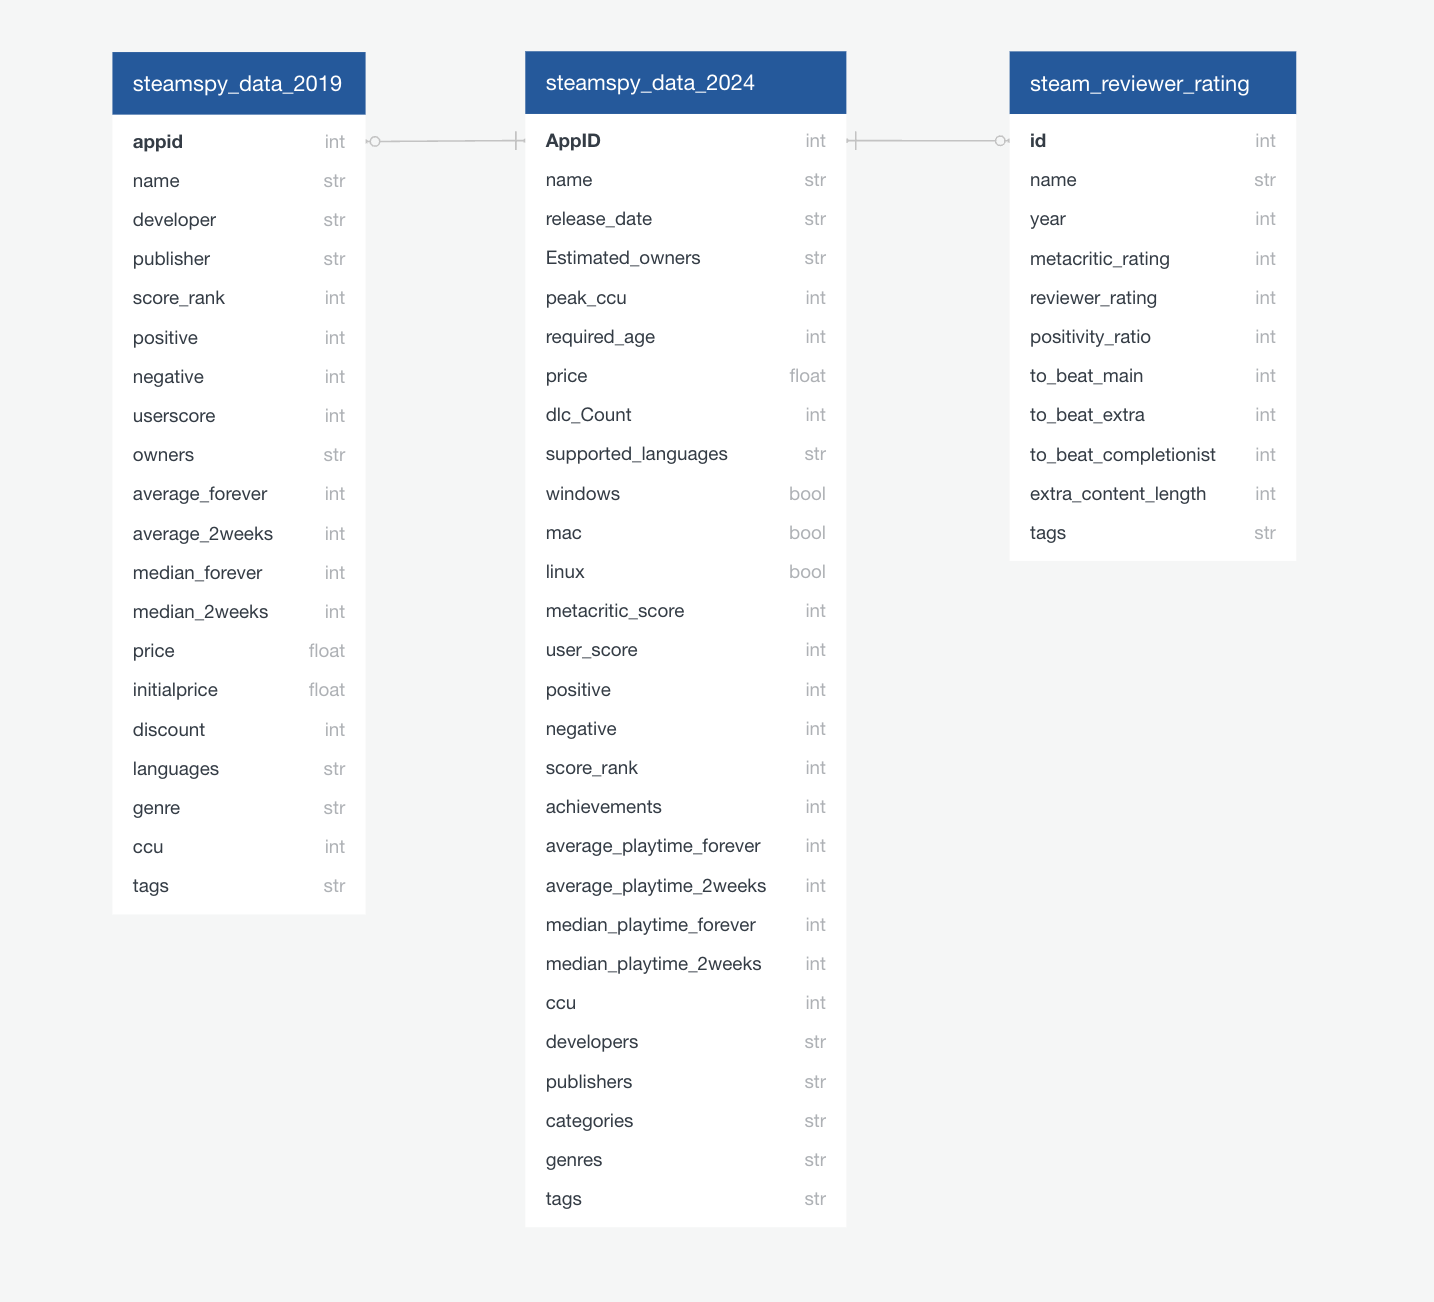

The ERD shows the three tables in our dataset.

The steamspy_data_2019 and steamspy_data_2024 tables serve as the main sources of information about games from different time periods, including metrics like sales estimates, player engagement, and game attributes. We use appid, APPID, and id to merge these tables as they present the same game ID on Steam platform.

Each game in steamspy_data_2019 and steamspy_data_2024 has a developer attribute. This attribute helps in understanding which games are created by the same developer. As a single developer can create multiple games over time, there is a 1 to M (one-to-many) relationship between developers and games in both the steamspy_data_2019 and steamspy_data_2024 tables.

Each game is available on specific platforms like Windows, macOS, or Linux. The columns windows, mac, and linux in steamspy_data_2024 provide information on which platform a game is hosted. A platform can host many games, so this forms a 1 to M relationship between the platforms and the games available on them.

The steam_reviewer_rating table includes additional information about game reviews, such as metacritic_rating and reviewer_rating. We use the id column in steam_reviewer_rating to join with appid in steamspy_data_2019 or AppID in steamspy_data_2024. Each game in the steamspy tables can have a corresponding set of reviews in steam_reviewer_rating, making this a 1 to 1 relationship between the tables.

In both the steamspy_data_2019 and steamspy_data_2024 tables, each game also has a publisher attribute, which denotes which entity has released the game. A publisher can release many games, establishing a 1 to M relationship between publishers and games.

**Column Descriptions**

The steamspy_data_2024.csv dataset contains the following columns:

| Columns    | Description |
| ----------- | ----------- |
|AppID| Game ID on steam platform|
|name|Game name as appears on Steam platform|
|release_date|Game release date (string)|
|Estimated owners| Estimated owners (string, e.g.: "0 - 20000")|
|peak_ccu| Number of concurrent users, yesterday (int)|
|required_age| Age required to play, 0 if it is for all audiences (int)|
|price| Price in USD, 0.0 if its free (float)|
|dlc Count| Number of DLCs, 0 if you have none (int)|
|supported_languages| Comma-separated enumeration of supporting languages|
|windows| Does it support Windows? (bool)|
|mac| Does it support mac? (bool)|
|linux| Does it support linux? (bool)|
|metacritic_score| Metacritic score, 0 if it has none (int)|   
|user_score| User score, 0 if it has none (int)|  
|positive| Positive votes (int)|
|negative| Negative votes (int)|
|score_rank| Score rank of the game based on user reviews (string)|
|achievements| Number of in-games achievements, if any|
|average_playtime_forever| Average playtime since March 2009. In minutes|
|average_playtime_2weeks| Average playtime in the last two weeks. In minutes|
|median_playtime_forever| Median playtime since March 2009. In minutes|
|median_playtime_2weeks| Median playtime in the last two weeks. In minutes|
|ccu| Peak CCU yesterday|
|developers| Name (or names) of developer(s). Semicolon delimited if multiple|       
|publishers| Name (or names) of publisher(s). Semicolon delimited if multiple|
|categories| Semicolon delimited list of game categories, e.g. single-player;multi-player|
|genres| Semicolon delimited list of game genres, e.g. action;adventure|           
|tags| Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure|

The steam_reviewer_rating.csv dataset contains the following columns:

| Columns    | Description |
| ----------- | ----------- |
|id| Game ID on steam platform|
|name|Game name as appears on Steam platform|
|year| The year when the game was released|       
|metacritic_rating| Metacritic rating (the larger the better)|
|reviewer_rating| Game rating given by users on the 0-10 scale (the larger the better)|
|positivity_ratio| Number of positive reviews divided by the number of negative reviews|
|to_beat_main| Time required to beat the main plot of the game|
|to_beat_extra| Time required to beat the main and optional objectives of the game|           
|to_beat_completionist| Time required to complete every single objective of the game including gathering all collectibles|
|extra_content_length| The difference between completionist time and extra time
|tags| User tags (features) of the game separated by vertical line|

The steamspy_data_2019.csv dataset contains the following columns:

| Columns    | Description |
| ----------- | ----------- |
|appid| Game ID on steam platform|
|name|Game name as appears on Steam platform|
|developers| Name (or names) of developer(s). Semicolon delimited if multiple|       
|publishers| Name (or names) of publisher(s). Semicolon delimited if multiple|
|platforms| Semicolon delimited list of supported platforms. At most includes: windows;mac;linux|
|score_rank| Ranking of the game based on user score|
|genre| Semicolon delimited list of game genres, e.g. action;adventure|           
|tags| Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure|
|positive| Number of positive ratings, from SteamSpy|
|negative| Number of negative ratings, from SteamSpy|
|userscore| Not a clear column with most of its values as 0|
|average_forever| Average playtime since March 2009. In minutes|
|average_2weeks| Average playtime in the last two weeks. In minutes|
|median_forever| Median playtime since March 2009. In minutes|
|median_2weeks| Median playtime in the last two weeks. In minutes|
|ccu| Peak CCU yesterday|
|owners| Owners of this application on Steam as a range|
|price| Current US price in cents|
|initialprice| Original US price in cents|
|discount| Current discount in percents|
|languages| List of supported languages|

## **Data Cleaning**

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)

**Import the three datasets**

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT *
FROM `ba775-team-b01.steam_analysis.steam_reviewer_rating`
ORDER BY id
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

id                   name  year  metacritic_rating  reviewer_rating  \
0  10         Counter-Strike  2000                 88                9   
1  20  Team Fortress Classic  1999               <NA>                8   

   positivity_ratio  to_beat_main  to_beat_extra  to_beat_completionist  \
0         39.205442          8.15            NaN                   8.39   
1          6.485219         19.36           20.5                    NaN   

   extra_content_length                                               tags  
0                  0.24  First-Person|Nostalgia|Multiplayer|Strategy|Ac...  
1                -19.36  Horror|Fast-Paced|First-Person|Hero Shooter|St...

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT *
FROM `ba775-team-b01.steam_analysis.steamspy_data_2019`
ORDER BY appid
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

appid            name developer publisher  score_rank  positive  negative  \
0  None            None      None      None        <NA>      <NA>      <NA>   
1    10  Counter-Strike     Valve     Valve        <NA>    124534      3339   

   userscore                    owners  average_forever  average_2weeks  \
0       <NA>                      None             <NA>            <NA>   
1          0  10,000,000 .. 20,000,000            17612             709   

   median_forever  median_2weeks  price  initialprice  discount  \
0            <NA>           <NA>   <NA>          <NA>      <NA>   
1             317             26    999           999         0   

                                           languages   genre    ccu  \
0                                               None    None   <NA>   
1  English, French, German, Italian, Spanish - Sp...  Action  14923   

                                                tags  
0                                               None  
1  {'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT *
FROM `ba775-team-b01.steam_analysis.steamspy_data_2024`
ORDER BY AppID
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

AppID                   Name Release date     Estimated owners  Peak CCU  \
0     10         Counter-Strike  Nov 1, 2000  10000000 - 20000000     13230   
1     20  Team Fortress Classic  Apr 1, 1999   5000000 - 10000000       110   

   Required age  Price  DLC count  Discount  \
0             0   9.99          0         0   
1             0   4.99          0         0   

                                 Supported languages  Windows   Mac  Linux  \
0  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
1  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   

   Metacritic score  User score  Positive  Negative  Score rank  Achievements  \
0                88           0    198387      5135         NaN             0   
1                 0           0      5677       923         NaN             0   

   Recommendations  Average playtime forever  Average playtime two weeks  \
0           122770                     10524                        1733   
1             4722                       143                           0   

   Median playtime forever  Median playtime two weeks Developers Publishers  \
0                      228                        733      Valve      Valve   
1                       23                          0      Valve      Valve   

                                          Categories  Genres  
0  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action  
1  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action

**Data Merge & Cleaning for Master_sheet_1: “steamspy_2024" Joining "reviewer_rating"**

In [ ]:
%%bigquery --project=ba775-team-b01
# First of all, joining both table but drop the duplicated AppID column
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings` AS
SELECT * EXCEPT(AppID)
FROM
  (
  SELECT id, metacritic_rating, reviewer_rating
  FROM `ba775-team-b01.steam_analysis.steam_reviewer_rating`
  ) AS r
INNER JOIN `ba775-team-b01.steam_analysis.steamspy_data_2024` AS s
ON r.id = s.AppID;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT *
FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
ORDER BY id
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

id  metacritic_rating  reviewer_rating                   Name Release date  \
0  10                 88                9         Counter-Strike  Nov 1, 2000   
1  20               <NA>                8  Team Fortress Classic  Apr 1, 1999   

      Estimated owners  Peak CCU  Required age  Price  DLC count  Discount  \
0  10000000 - 20000000     13230             0   9.99          0         0   
1   5000000 - 10000000       110             0   4.99          0         0   

                                 Supported languages  Windows   Mac  Linux  \
0  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
1  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   

   Metacritic score  User score  Positive  Negative  Score rank  Achievements  \
0                88           0    198387      5135         NaN             0   
1                 0           0      5677       923         NaN             0   

   Recommendations  Average playtime forever  Average playtime two weeks  \
0           122770                     10524                        1733   
1             4722                       143                           0   

   Median playtime forever  Median playtime two weeks Developers Publishers  \
0                      228                        733      Valve      Valve   
1                       23                          0      Valve      Valve   

                                          Categories  Genres  
0  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action  
1  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action

In [ ]:
%%bigquery --project=ba775-team-b01
# Checking the missing value for each column
DECLARE query STRING;
SET query = (
    SELECT STRING_AGG(
        FORMAT("SUM(CASE WHEN `%s` IS NULL THEN 1 ELSE 0 END) AS %s_missing", column_name, REPLACE(column_name, ' ', '_')),
        ', '
    )
    FROM `ba775-team-b01.steam_analysis.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name = 'steamspy_2024_join_ratings'
);

SET query = FORMAT("""
    SELECT %s
    FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
""", query);

SELECT query;

EXECUTE IMMEDIATE query;

Query is running:   0%|          |

Downloading:   0%|          |

id_missing  metacritic_rating_missing  reviewer_rating_missing  \
0           0                      59203                    18820   

   Name_missing  Release_date_missing  Estimated_owners_missing  \
0             0                     0                         0   

   Peak_CCU_missing  Required_age_missing  Price_missing  DLC_count_missing  \
0                 0                     0              0                  0   

   Discount_missing  Supported_languages_missing  Windows_missing  \
0                 0                            0                0   

   Mac_missing  Linux_missing  Metacritic_score_missing  User_score_missing  \
0            0              0                         0                   0   

   Positive_missing  Negative_missing  Score_rank_missing  \
0                 0                 0               63047   

   Achievements_missing  Recommendations_missing  \
0                     0                        0   

   Average_playtime_forever_missing  Average_playtime_two_weeks_missing  \
0                                 0                                   0   

   Median_playtime_forever_missing  Median_playtime_two_weeks_missing  \
0                                0                                  0   

   Developers_missing  Publishers_missing  Categories_missing  Genres_missing  
0                 116                 365                 911              81

In [ ]:
%%bigquery --project=ba775-team-b01
# Drop the two useless columns which have too many missing values
ALTER TABLE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
DROP COLUMN metacritic_rating;

ALTER TABLE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
DROP COLUMN `Score rank`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Then drop the rows with missing values, as they make up only a small percentage of the dataset
DELETE FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
WHERE
  reviewer_rating IS NULL OR
  Developers IS NULL OR
  Publishers IS NULL OR
  Categories IS NULL OR
  Genres IS NULL;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

However, our data cleaning is not yet complete. To be thorough, let's check key columns that should not contain zero values.

In [ ]:
%%bigquery --project=ba775-team-b01
# First, the "reviewer_rating" column should not contain any zero values, and it has passed our inspection
SELECT id, Name, reviewer_rating
FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
WHERE reviewer_rating = 0;

Query is running:   0%|          |

Downloading: |          |

Empty DataFrame
Columns: [id, Name, reviewer_rating]
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Next, as a rating from a tech media, the "Metacritic score" column should not contain any zero values either
SELECT id, Name, `Metacritic score`
FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
WHERE `Metacritic score` = 0;

Query is running:   0%|          |

Downloading:   0%|          |

id                                     Name  Metacritic score
0      2305110                          Photon Engineer                 0
1      1412960      Metroplex Zero: Sci-Fi Card Battler                 0
2      2308360                                 Sun Down                 0
3      1907690                             DungeonSlime                 0
4      2061020                                     筒楼异事                 0
...        ...                                      ...               ...
39612   373770                                    LiEat                 0
39613   901735                The Stronghold Collection                 0
39614   511470                         Glass Masquerade                 0
39615   222940  THE KING OF FIGHTERS XIII STEAM EDITION                 0
39616  1677740                             Stumble Guys                 0

[39617 rows x 3 columns]

In [ ]:
%%bigquery --project=ba775-team-b01
# But this column contains too many zero values, making it useless now and so we have to drop this column
ALTER TABLE  `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
DROP COLUMN `Metacritic score`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Same logic for the "User score" column
SELECT id, Name, `User score`
FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
WHERE  `User score` = 0;

Query is running:   0%|          |

Downloading:   0%|          |

id                                       Name  User score
0      2305110                            Photon Engineer           0
1      1412960        Metroplex Zero: Sci-Fi Card Battler           0
2      2308360                                   Sun Down           0
3      1907690                               DungeonSlime           0
4      2061020                                       筒楼异事           0
...        ...                                        ...         ...
43297  1253920                             Rogue Legacy 2           0
43298    12210  Grand Theft Auto IV: The Complete Edition           0
43299  1677740                               Stumble Guys           0
43300   588650                                 Dead Cells           0
43301     8930                Sid Meier's Civilization® V           0

[43302 rows x 3 columns]

In [ ]:
%%bigquery --project=ba775-team-b01
# We have to drop this column as it doesn't contain enough information
ALTER TABLE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
DROP COLUMN `User score`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Then let's check the columns related to "playtime"
SELECT id, Name, `Release date`, `Estimated owners`, `Average playtime forever`, `Median playtime forever`
FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
WHERE  `Average playtime forever` = 0 OR  `Median playtime forever` = 0
ORDER BY `Estimated owners` DESC, `Release date` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

id                                               Name  \
0      1121910  I Love You, Colonel Sanders! A Finger Lickin’ ...   
1      1758910                                      Time Commando   
2      1022450                                      War Selection   
3      1024890                                      Sector's Edge   
4      1266680                         Strobophagia | Rave Horror   
...        ...                                                ...   
29237  2305110                                    Photon Engineer   
29238  2321450                                          QR Escape   
29239  2290710                                   King of the Road   
29240  2355410                                       Little Monki   
29241  2288300                                     Dare To Spread   

       Release date  Estimated owners  Average playtime forever  \
0      Sep 24, 2019  500000 - 1000000                         0   
1       Oct 9, 2021  500000 - 1000000                         0   
2       Oct 8, 2019  500000 - 1000000                         0   
3      Oct 30, 2020  500000 - 1000000                         0   
4      Oct 28, 2020  500000 - 1000000                         0   
...             ...               ...                       ...   
29237  Apr 10, 2023             0 - 0                         0   
29238  Apr 10, 2023             0 - 0                         0   
29239  Apr 10, 2023             0 - 0                         0   
29240   Apr 1, 2023             0 - 0                         0   
29241   Apr 1, 2023             0 - 0                         0   

       Median playtime forever  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
29237                        0  
29238                        0  
29239                        0  
29240                        0  
29241                        0  

[29242 rows x 6 columns]

Surprisingly, we noticed that a significant number of games on the Steam platform have recorded playtimes of zero. After conducting research to assess if this is reasonable, we identified several possible explanations:

*   **Game unplayed or briefly tested**: Some users acquire games during promotions but don't actually play them, while others may launch the game briefly to test it or exit before starting, resulting in a playtime of zero.
*   **Small user base**: For newly released or less popular games, a small player base means that if most users only download without playing, the average playtime may display as zero.
*   **Data source limitations**: According to SteamSpy, which prioritizes popular games for updates, data for less popular games is updated less frequently or may eventually stop being updated.

To verify this situation, we can cross-check the estimated owner counts to see if the zero-playtime games are primarily associated with a small player base.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH zero_playtime AS (
  SELECT id, `Estimated owners`, `Average playtime forever`, `Median playtime forever`
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
  WHERE  `Average playtime forever` = 0 AND  `Median playtime forever` = 0
  )

SELECT `Estimated owners`, COUNT(DISTINCT id) AS numbers
FROM zero_playtime
GROUP BY `Estimated owners`
ORDER BY numbers DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Estimated owners  numbers
0          0 - 20000    23670
1      20000 - 50000     3384
2     50000 - 100000     1048
3              0 - 0      550
4    100000 - 200000      397
5    200000 - 500000      144
6   500000 - 1000000       34
7  1000000 - 2000000       11
8  2000000 - 5000000        4

As expected, most of these zero-playtime games belong to a small group of owners, which aligns with the explanations above. Therefore, we decided to proceed and retain these records as they are.

In [ ]:
%%bigquery --project=ba775-team-b01
# Lastly, let's ensure that all these columns have the correct data types
SELECT column_name, data_type
FROM `ba775-team-b01.steam_analysis.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'steamspy_2024_join_ratings';

Query is running:   0%|          |

Downloading:   0%|          |

column_name data_type
0                           id     INT64
1              reviewer_rating     INT64
2                         Name    STRING
3                 Release date    STRING
4             Estimated owners    STRING
5                     Peak CCU     INT64
6                 Required age     INT64
7                        Price   FLOAT64
8                    DLC count     INT64
9                     Discount     INT64
10         Supported languages    STRING
11                     Windows      BOOL
12                         Mac      BOOL
13                       Linux      BOOL
14                    Positive     INT64
15                    Negative     INT64
16                Achievements     INT64
17             Recommendations     INT64
18    Average playtime forever     INT64
19  Average playtime two weeks     INT64
20     Median playtime forever     INT64
21   Median playtime two weeks     INT64
22                  Developers    STRING
23                  Publishers    STRING
24                  Categories    STRING
25                      Genres    STRING

There are two data type issues. First, the "Estimated owners" field is currently a STRING, but converting it to an INTEGER would be more practical. Second, the "Release date" is also a STRING, which we can convert to a datetime format. Additionally, some column names do not follow standard naming conventions, so we'll address all these issues at once.

In [ ]:
%%bigquery --project=ba775-team-b01
# Add 'Average_owners' Column to represent the approximate number of owners for each game
ALTER TABLE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
ADD COLUMN Average_owners FLOAT64;

UPDATE `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`
SET Average_owners =
(
  CAST(SPLIT(`Estimated owners`, ' - ')[OFFSET(0)] AS FLOAT64) +
  CAST(SPLIT(`Estimated owners`, ' - ')[OFFSET(1)] AS FLOAT64)
) / 2
WHERE `Estimated owners` IS NOT NULL;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# The "Release date" column has an incorrect data type, and some column names don't follow the standard.
# Let's correct these and create the final master sheet.
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.master_sheet_1` AS
SELECT
    id AS ID,
    Name,
    COALESCE(
        SAFE.PARSE_DATE('%b %d, %Y', `Release date`),
        SAFE.PARSE_DATE('%Y-%m-%d', `Release date`),
        SAFE.PARSE_DATE('%b %Y', `Release date`)
    ) AS Release_date,
    reviewer_rating AS Reviewer_rating,
    Average_owners,
    `Peak CCU` AS Peak_CCU,
    `Required age` AS Required_age,
    Price,
    Discount,
    `DLC count` AS DLC_count,
    `Supported languages` AS Languages,
    Windows,
    Mac,
    Linux,
    Positive AS Positive_reviews,
    Negative AS Negative_reviews,
    Achievements,
    Recommendations,
    `Average playtime forever` AS Average_playtime_forever,
    `Average playtime two weeks` AS Average_playtime_latest,
    `Median playtime forever` AS Median_playtime_forever,
    `Median playtime two weeks` AS Median_playtime_latest,
    Developers,
    Publishers,
    Categories,
    Genres
FROM
    `ba775-team-b01.steam_analysis.steamspy_2024_join_ratings`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

Finally, our master sheet is ready for further analysis!

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT *
FROM `ba775-team-b01.steam_analysis.master_sheet_1`
ORDER BY ID
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

ID                       Name Release_date  Reviewer_rating  \
0  10             Counter-Strike   2000-11-01                9   
1  20      Team Fortress Classic   1999-04-01                8   
2  30              Day of Defeat   2003-05-01                8   
3  40         Deathmatch Classic   2001-06-01                8   
4  50  Half-Life: Opposing Force   1999-11-01                9   

   Average_owners  Peak_CCU  Required_age  Price  Discount  DLC_count  \
0      15000000.0     13230             0   9.99         0          0   
1       7500000.0       110             0   4.99         0          0   
2       7500000.0       106             0   4.99         0          0   
3       7500000.0         2             0   4.99         0          0   
4       7500000.0       120             0   4.99         0          0   

                                           Languages  Windows   Mac  Linux  \
0  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
1  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
2  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
3  ['English', 'French', 'German', 'Italian', 'Sp...     True  True   True   
4          ['English', 'French', 'German', 'Korean']     True  True   True   

   Positive_reviews  Negative_reviews  Achievements  Recommendations  \
0            198387              5135             0           122770   
1              5677               923             0             4722   
2              5179               566             0             3246   
3              1929               428             0             1570   
4             14333               718             0            12374   

   Average_playtime_forever  Average_playtime_latest  Median_playtime_forever  \
0                     10524                     1733                      228   
1                       143                        0                       23   
2                      1397                        0                       27   
3                       945                        0                       10   
4                       214                        0                       66   

   Median_playtime_latest        Developers Publishers  \
0                     733             Valve      Valve   
1                       0             Valve      Valve   
2                       0             Valve      Valve   
3                       0             Valve      Valve   
4                       0  Gearbox Software      Valve   

                                          Categories  Genres  
0  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action  
1  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action  
2              Multi-player,Valve Anti-Cheat enabled  Action  
3  Multi-player,PvP,Online PvP,Shared/Split Scree...  Action  
4  Single-player,Multi-player,Valve Anti-Cheat en...  Action

**Data Merge & Cleaning for Master_sheet_2: “steamspy_2024" VS "steamspy_2019"**

In addition to the master_sheet_1 we created and cleaned above, we found another dataset containing SteamSpy data from 2019. We thought it would be interesting to compare these two datasets to explore possible changes over the five years, so we decided to merge another sheet specifically for this comparison.

Before merging, however, we'll first transform the owner scale in the 2019 sheet into an estimated number, just as we did for the 2024 sheet, to keep the data consistent.

In [ ]:
%%bigquery --project=ba775-team-b01
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.steamspy_2019_copy` AS
SELECT * FROM `ba775-team-b01.steam_analysis.steamspy_data_2019`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
ALTER TABLE `ba775-team-b01.steam_analysis.steamspy_2019_copy`
ADD COLUMN Average_owners FLOAT64;

UPDATE `ba775-team-b01.steam_analysis.steamspy_2019_copy`
SET Average_owners = (
  CAST(REPLACE(SPLIT(owners, ' .. ')[OFFSET(0)], ',', '') AS FLOAT64) +
  CAST(REPLACE(SPLIT(owners, ' .. ')[OFFSET(1)], ',', '') AS FLOAT64)
) / 2
WHERE owners IS NOT NULL;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Merge the "steamspy_2024" sheet and "steamspy_2019" sheet
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS
SELECT
    n.ID,
    n.Name,
    n.Release_date,
    n.Developers,
    n.Publishers,
    n.Reviewer_rating,
    n.Average_owners AS `2024_owners`,
    o.Average_owners AS `2019_owners`,
    n.Peak_CCU AS `ccu_2024`,
    o.ccu AS `ccu_2019`,
    n.Price AS `2024_price`,
    (o.price/100) AS `2019_price`,   # Prices in the 2019 sheet are in cents, converted to dollars to match the 2024 sheet.
    n.Positive_reviews AS `Positive_reviews_2024`,
    n.Negative_reviews AS `Negative_reviews_2024`,
    (n.Positive_reviews + n.Negative_reviews) AS `Total_reviews_2024`,
    o.positive AS `Positive_reviews_2019`,
    o.negative AS `Negative_reviews_2019`,
    (o.positive + o.negative) AS `Total_reviews_2019`,
    n.Average_playtime_forever AS `Average_playtime_forever_2024`,
    o.average_forever AS `Average_playtime_forever_2019`,
    n.Median_playtime_forever AS `Median_playtime_forever_2024`,
    o.median_forever AS `Median_playtime_forever_2019`
FROM
    `ba775-team-b01.steam_analysis.master_sheet_1` AS n
INNER JOIN
    `ba775-team-b01.steam_analysis.steamspy_2019_copy` AS o
ON
    CAST(n.ID AS STRING) = o.appid;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Check the selected columns to find missing values, fortunately, none were found.
SELECT
   SUM(IF(ID IS NULL, 1, 0)) AS id_null,
   SUM(IF(Name IS NULL, 1, 0)) AS name_null,
   SUM(IF(Release_date IS NULL, 1, 0)) AS release_date_null,
   SUM(IF(Developers IS NULL, 1, 0)) AS developers_null,
   SUM(IF(Publishers IS NULL, 1, 0)) AS publishers_null,
   SUM(IF(Reviewer_rating IS NULL, 1, 0)) AS reviewer_rating_null,
   SUM(IF(`2024_owners` IS NULL, 1, 0)) AS `2024_owners_null`,
   SUM(IF(`2019_owners` IS NULL, 1, 0)) AS `2019_owners_null`,
   SUM(IF(`ccu_2024` IS NULL, 1, 0)) AS `ccu_2024_null`,
   SUM(IF(`ccu_2019` IS NULL, 1, 0)) AS `ccu_2019_null`,
   SUM(IF(`2024_price` IS NULL, 1, 0)) AS price_null,
   SUM(IF(`2019_price` IS NULL, 1, 0)) AS new_discount_null,
   SUM(IF(`Positive_reviews_2024` IS NULL, 1, 0)) AS `Positive_reviews_2024_null`,
   SUM(IF(`Negative_reviews_2024` IS NULL, 1, 0)) AS `Negative_reviews_2024_null`,
   SUM(IF(`Total_reviews_2024` IS NULL, 1, 0)) AS `Total_reviews_2024_null`,
   SUM(IF(`Positive_reviews_2019` IS NULL, 1, 0)) AS `Positive_reviews_2019_null`,
   SUM(IF(`Negative_reviews_2019` IS NULL, 1, 0)) AS `Negative_reviews_2019_null`,
   SUM(IF(`Total_reviews_2019` IS NULL, 1, 0)) AS `Total_reviews_2019_null`,
   SUM(IF(`Average_playtime_forever_2024` IS NULL, 1, 0)) AS `Average_playtime_forever_2024_null`,
   SUM(IF(`Average_playtime_forever_2019` IS NULL, 1, 0)) AS `Average_playtime_forever_2019_null`,
   SUM(IF(`Median_playtime_forever_2024` IS NULL, 1, 0)) AS `Median_playtime_forever_2024_null`,
   SUM(IF(`Median_playtime_forever_2019` IS NULL, 1, 0)) AS `Median_playtime_forever_2019_null`
FROM
   `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`;

Query is running:   0%|          |

Downloading:   0%|          |

id_null  name_null  release_date_null  developers_null  publishers_null  \
0        0          0                  0                0                0   

   reviewer_rating_null  2024_owners_null  2019_owners_null  ccu_2024_null  \
0                     0                 0                 0              0   

   ccu_2019_null  price_null  new_discount_null  Positive_reviews_2024_null  \
0              0           0                  0                           0   

   Negative_reviews_2024_null  Total_reviews_2024_null  \
0                           0                        0   

   Positive_reviews_2019_null  Negative_reviews_2019_null  \
0                           0                           0   

   Total_reviews_2019_null  Average_playtime_forever_2024_null  \
0                        0                                   0   

   Average_playtime_forever_2019_null  Median_playtime_forever_2024_null  \
0                                   0                                  0   

   Median_playtime_forever_2019_null  
0                                  0

In [ ]:
%%bigquery --project=ba775-team-b01
# Also double check that all columns have the correct data types
SELECT column_name, data_type
FROM `ba775-team-b01.steam_analysis.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'steamspy_2024_VS_2019';

Query is running:   0%|          |

Downloading:   0%|          |

column_name data_type
0                              ID     INT64
1                            Name    STRING
2                    Release_date      DATE
3                      Developers    STRING
4                      Publishers    STRING
5                 Reviewer_rating     INT64
6                     2024_owners   FLOAT64
7                     2019_owners   FLOAT64
8                        ccu_2024     INT64
9                        ccu_2019     INT64
10                     2024_price   FLOAT64
11                     2019_price   FLOAT64
12          Positive_reviews_2024     INT64
13          Negative_reviews_2024     INT64
14             Total_reviews_2024     INT64
15          Positive_reviews_2019     INT64
16          Negative_reviews_2019     INT64
17             Total_reviews_2019     INT64
18  Average_playtime_forever_2024     INT64
19  Average_playtime_forever_2019     INT64
20   Median_playtime_forever_2024     INT64
21   Median_playtime_forever_2019     INT64

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT * FROM ba775-team-b01.steam_analysis.steamspy_2024_VS_2019
ORDER BY ID;

Query is running:   0%|          |

Downloading:   0%|          |

ID                        Name Release_date  \
0           10              Counter-Strike   2000-11-01   
1           20       Team Fortress Classic   1999-04-01   
2           30               Day of Defeat   2003-05-01   
3           40          Deathmatch Classic   2001-06-01   
4           50   Half-Life: Opposing Force   1999-11-01   
...        ...                         ...          ...   
22248  1065160                   Deatherem   2019-04-23   
22249  1065230             Room of Pandora   2019-04-24   
22250  1065570                   Cyber Gun   2019-04-23   
22251  1066700  New Yankee 7: Deer Hunters   2019-04-17   
22252  1069460                   Rune Lord   2019-04-24   

                  Developers             Publishers  Reviewer_rating  \
0                      Valve                  Valve                9   
1                      Valve                  Valve                8   
2                      Valve                  Valve                8   
3                      Valve                  Valve                8   
4           Gearbox Software                  Valve                9   
...                      ...                    ...              ...   
22248                  Anima           Team Syukino                4   
22249  SHEN JIAWEI,ZHANG FAN  SHEN JIAWEI,ZHANG FAN                5   
22250         Semyon Maximov       BekkerDev Studio                5   
22251     Yustas Game Studio   Alawar Entertainment                7   
22252       Adept Studios GD   Alawar Entertainment                6   

       2024_owners  2019_owners  ccu_2024  ccu_2019  2024_price  2019_price  \
0       15000000.0   15000000.0     13230     14923        9.99        9.99   
1        7500000.0    7500000.0       110        87        4.99        4.99   
2        7500000.0    7500000.0       106       130        4.99        4.99   
3        7500000.0    7500000.0         2         4        4.99        4.99   
4        7500000.0    7500000.0       120        71        4.99        4.99   
...            ...          ...       ...       ...         ...         ...   
22248      10000.0      10000.0         0         0        0.00        2.69   
22249      10000.0      10000.0         0         0        0.99        2.54   
22250      10000.0      10000.0         0         1        9.99        1.19   
22251      10000.0      10000.0         0         1        6.99        6.99   
22252      10000.0      10000.0         0         4        6.99        5.59   

       Positive_reviews_2024  Negative_reviews_2024  Total_reviews_2024  \
0                     198387                   5135              203522   
1                       5677                    923                6600   
2                       5179                    566                5745   
3                       1929                    428                2357   
4                      14333                    718               15051   
...                      ...                    ...                 ...   
22248                      3                     11                  14   
22249                     31                     14                  45   
22250                     49                     20                  69   
22251                      6                      1                   7   
22252                     20                      4                  24   

       Positive_reviews_2019  Negative_reviews_2019  Total_reviews_2019  \
0                     124534                   3339              127873   
1                       3318                    633                3951   
2                       3416                    398                3814   
3                       1273                    267                1540   
4                       5250                    288                5538   
...                      ...                    ...                 ...   
22248                      2                      2            

Finally, the second master sheet is also ready for exploration!

## **Exploratory Data Analysis**

### **Part 1. Popularity of Game**

**Q1: How should we define the popularity of Steam games?**

This is a crucial and foundational question in our analysis. To explore the potential factors influencing Steam game popularity, the key prerequisite is establishing a clear standard for classifying games as 'popular' or 'unpopular'. First, let's take a look at the columns available in our database.

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT column_name, data_type
FROM `ba775-team-b01.steam_analysis.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'master_sheet_1';

Query is running:   0%|          |

Downloading:   0%|          |

column_name data_type
0                         ID     INT64
1                       Name    STRING
2               Release_date      DATE
3            Reviewer_rating     INT64
4             Average_owners   FLOAT64
5                   Peak_CCU     INT64
6               Required_age     INT64
7                      Price   FLOAT64
8                   Discount     INT64
9                  DLC_count     INT64
10                 Languages    STRING
11                   Windows      BOOL
12                       Mac      BOOL
13                     Linux      BOOL
14          Positive_reviews     INT64
15          Negative_reviews     INT64
16              Achievements     INT64
17           Recommendations     INT64
18  Average_playtime_forever     INT64
19   Average_playtime_latest     INT64
20   Median_playtime_forever     INT64
21    Median_playtime_latest     INT64
22                Developers    STRING
23                Publishers    STRING
24                Categories    STRING
25                    Genres    STRING

We conducted external research to understand how the industry and academia define game "popularity". While no single universal criterion exists, several key metrics are widely recognized as indicators of a game's popularity:

- **Number of Owners**: Studies, including those in *Computers in Human Behavior*, show a strong correlation between a game's installs or active users and its popularity. Market research firms like *Statista* also highlight user base size as a key measure of market share and influence.  
- **Number of Reviewers**: Research in the *Journal of Interactive Marketing* emphasizes that the volume and content of reviews significantly influence purchasing decisions. More reviews reflect higher social visibility and boost a game's perceived popularity.  
- **Concurrent Users (CCU)**: CCU is a direct measure of player engagement, especially for multiplayer and live-service games. *Entertainment Computing* identifies it as a critical indicator of a game's lifecycle health and instant community activity.  
- **Playtime Metrics**: Longer playtime signals higher player immersion and loyalty. While average playtime reflects overall engagement, median playtime accounts for typical player behavior by minimizing the impact of outliers.  


Using these insights, we defined a "popularity" index that ranks games across these metrics and applies the following weightings: **Owners (40%)**, **Total Reviewers (25%)**, **CCU (25%)**, **Average Playtime (5%)**, and **Median Playtime (5%)**.  

This weighting scheme prioritizes core drivers of popularity:  
- **Owners (40%)**: Captures market reach and user adoption, making it the most critical factor.  
- **Total Reviewers (25%)**: Reflects social attention and player engagement, crucial for public perception.  
- **Concurrent Users (25%)**: Represents real-time activity and community interaction, key for multiplayer and live-service games.  
- **Playtime Metrics (10% combined)**: Measures player retention and loyalty, balancing immersion and typical behavior.  

This approach offers a balanced, data-driven framework for evaluating overall game popularity. With this foundation, we can proceed to calculate the index and assign it to each game in the dataset.

In [ ]:
%%bigquery --project=ba775-team-b01
# Firstly, create a new sheet with a "Total_reviews" column to track each game's total number of reviews
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.master_sheet_popular` AS
SELECT * FROM `ba775-team-b01.steam_analysis.master_sheet_1`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
ALTER TABLE `ba775-team-b01.steam_analysis.master_sheet_popular`
ADD COLUMN Total_reviews INT64;

UPDATE `ba775-team-b01.steam_analysis.master_sheet_popular`
SET Total_reviews = ( Positive_reviews +	Negative_reviews )
WHERE Positive_reviews IS NOT NULL AND Negative_reviews IS NOT NULL;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Next, let's examine the range of these key metrics to establish their standardized ranking later
SELECT
(MAX(Average_owners) - MIN(Average_owners)) AS Owners_range,
MIN(Average_owners) AS Owners_min,
(MAX(Total_reviews) - MIN(Total_reviews)) AS Total_reviews,
MIN(Total_reviews) AS Total_reviews_min,
(MAX(Peak_CCU) - MIN(Peak_CCU)) AS Peak_CCU_range,
MIN(Peak_CCU) AS Peak_CCU_min,
(MAX(Average_playtime_forever) - MIN(Average_playtime_forever)) AS Average_playtime_range,
MIN(Average_playtime_forever) AS Average_playtime_min,
(MAX(Median_playtime_forever) - MIN(Median_playtime_forever)) AS Median_playtime_range,
MIN(Median_playtime_forever) AS Median_playtime_min
FROM ba775-team-b01.steam_analysis.master_sheet_popular;

Query is running:   0%|          |

Downloading:   0%|          |

Owners_range  Owners_min  Total_reviews  Total_reviews_min  Peak_CCU_range  \
0   150000000.0         0.0        6531097                  0          872138   

   Peak_CCU_min  Average_playtime_range  Average_playtime_min  \
0             0                   90351                     0   

   Median_playtime_range  Median_playtime_min  
0                 136629                    0

In [ ]:
%%bigquery --project=ba775-team-b01
# To simplify the following code, we save the results in a temporary sheet
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.range_calculations` AS
SELECT
    (MAX(Average_owners) - MIN(Average_owners)) AS Owners_range,
    MIN(Average_owners) AS Owners_min,
    (MAX(Total_reviews) - MIN(Total_reviews)) AS Total_reviews_range,
    MIN(Total_reviews) AS Total_reviews_min,
    (MAX(Peak_CCU) - MIN(Peak_CCU)) AS Peak_CCU_range,
    MIN(Peak_CCU) AS Peak_CCU_min,
    (MAX(Average_playtime_forever) - MIN(Average_playtime_forever)) AS Average_playtime_range,
    MIN(Average_playtime_forever) AS Average_playtime_min,
    (MAX(Median_playtime_forever) - MIN(Median_playtime_forever)) AS Median_playtime_range,
    MIN(Median_playtime_forever) AS Median_playtime_min
FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Now let's add the "popular" column
ALTER TABLE `ba775-team-b01.steam_analysis.master_sheet_popular`
ADD COLUMN Popularity FLOAT64;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# And calculate the index for each game
UPDATE `ba775-team-b01.steam_analysis.master_sheet_popular` AS m
SET m.Popularity =
(
    0.40 * (m.Average_owners - r.Owners_min) / r.Owners_range +
    0.25 * (m.Total_reviews - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (m.Peak_CCU - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (m.Average_playtime_forever - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (m.Median_playtime_forever - r.Median_playtime_min) / r.Median_playtime_range
) * 100
FROM `ba775-team-b01.steam_analysis.range_calculations` AS r
WHERE m.ID IS NOT NULL;

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Now we have a well-defined ranking of popularity of our games
SELECT ID, Name, Release_date, Popularity, RANK() OVER (ORDER BY Popularity DESC) AS Popularity_Rank,
       Average_owners, Total_reviews, Peak_CCU, Average_playtime_forever, Median_playtime_forever
FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
ORDER BY Popularity DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

ID                              Name Release_date  Popularity  \
0       730  Counter-Strike: Global Offensive   2012-08-21   70.574557   
1       570                            Dota 2   2013-07-09   64.910003   
2    578080               PUBG: BATTLEGROUNDS   2017-12-21   37.219643   
3    990080                   Hogwarts Legacy   2023-02-10   27.190883   
4       440                   Team Fortress 2   2007-10-10   27.019526   
5   1063730                         New World   2021-09-28   21.878703   
6    271590                Grand Theft Auto V   2015-04-13   20.494101   
7   1599340                          Lost Ark   2022-02-11   18.434264   
8   1172470                     Apex Legends™   2020-11-04   18.303690   
9    252490                              Rust   2018-02-08   16.227244   
10   359550   Tom Clancy's Rainbow Six® Siege   2015-12-01   15.511751   
11   105600                          Terraria   2011-05-16   14.668979   
12     4000                       Garry's Mod   2006-11-29   14.317202   
13   431960                  Wallpaper Engine   2018-11-01   14.049842   
14  1085660                         Destiny 2   2019-10-01   13.786869   
15   230410                          Warframe   2013-03-25   13.482988   
16   218620                          PAYDAY 2   2013-08-13   13.242372   
17   304930                          Unturned   2017-07-07   13.200327   
18      550                     Left 4 Dead 2   2009-11-16   13.179906   
19  1245620                        ELDEN RING   2022-02-24   13.080718   

    Popularity_Rank  Average_owners  Total_reviews  Peak_CCU  \
0                 1      75000000.0        6531097    825215   
1                 2     150000000.0        1777590    558759   
2                 3      75000000.0        2050633    275374   
3                 4       7500000.0          35521    872138   
4                 5      75000000.0         880376    107702   
5                 6      75000000.0         228814     16688   
6                 7      35000000.0        1381351    170527   
7                 8      35000000.0         168374    287501   
8                 9      35000000.0         482132    235067   
9                10      35000000.0         811910     96112   
10               11      35000000.0        1067902     42263   
11               12      35000000.0         986027     39165   
12               13      35000000.0         851330     37574   
13               14      35000000.0         533257     85643   
14               15      35000000.0         480115     72573   
15               16      35000000.0         490965     60270   
16               17      35000000.0         583400     45663   
17               18      35000000.0         484705     54184   
18               19      35000000.0         635661     44449   
19               20      35000000.0         512050     46431   

    Average_playtime_forever  Median_playtime_forever  
0                      30484                     6357  
1                      37162                      880  
2                      21963                     7134  
3                        661                      501  
4                       9916                      370  
5                       7432                     3093  
6                      13650                     6274  
7                       3335                      836  
8                       6388                      904  
9                      16623                     3035  
10                     13837                     3100  
11                      6729                     1810  
12                     10891                     1239  
13                      3460                      788  
14                      9390                      431  
15                      9533                      413  
16                      6177                      686  
17                      8059                      340  
18                      2166                 

With our "popularity" index established, we still need to define a range for "popular games". Based on research into quantile-based segmentation, such as *the National Science Board'*s method for identifying top-performing publications by citation count, the top 1% of items is often used to represent high impact. Similarly, databases like *Web of Science* rank the top 1% of publications by discipline, considering variations in citation practices. Inspired by these approaches, we've decided to designate games in the top 1% of our popularity index as "popular games".

In [ ]:
%%bigquery --project=ba775-team-b01
# Create another table to include only the TOP 1% Popular Games
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.top_popular_games` AS
SELECT *
FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
WHERE Popularity > (SELECT PERCENTILE_CONT(Popularity, 0.99) OVER() AS popularity_99th_percentile
                    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
                    LIMIT 1);

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
# Let's have a look
SELECT *
FROM `ba775-team-b01.steam_analysis.top_popular_games`
ORDER BY Popularity DESC;

Query is running:   0%|          |

Downloading:   0%|          |

ID                              Name Release_date  Reviewer_rating  \
0       730  Counter-Strike: Global Offensive   2012-08-21                8   
1       570                            Dota 2   2013-07-09                8   
2    578080               PUBG: BATTLEGROUNDS   2017-12-21                5   
3    990080                   Hogwarts Legacy   2023-02-10                8   
4       440                   Team Fortress 2   2007-10-10                8   
..      ...                               ...          ...              ...   
429  611500                   Quake Champions   2017-08-22                6   
430  207140                      SpeedRunners   2016-04-19                8   
431  310560                        DiRT Rally   2015-12-07                8   
432  289890                 7,62 High Calibre   2014-04-30                6   
433  202970       Call of Duty®: Black Ops II   2012-11-12                8   

     Average_owners  Peak_CCU  Required_age  Price  Discount  DLC_count  \
0        75000000.0    825215             0   0.00         0          1   
1       150000000.0    558759             0   0.00         0          2   
2        75000000.0    275374             0   0.00         0          0   
3         7500000.0    872138             0  59.99         0          1   
4        75000000.0    107702             0   0.00         0          1   
..              ...       ...           ...    ...       ...        ...   
429       3500000.0       611            17   0.00         0          0   
430       3500000.0       253             0  14.99         0          3   
431       3500000.0       249             0   4.49         0          0   
432         75000.0         6             0   4.99         0          0   
433       3500000.0       406            17  59.99         0         36   

                                             Languages  Windows    Mac  Linux  \
0    ['Czech', 'Danish', 'Dutch', 'English', 'Finni...     True   True   True   
1    ['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...     True   True   True   
2    ['English', 'Korean', 'Simplified Chinese', 'F...     True  False  False   
3    ['English', 'French', 'Italian', 'German', 'Sp...     True  False  False   
4    ['English', 'Danish', 'Dutch', 'Finnish', 'Fre...     True   True   True   
..                                                 ...      ...    ...    ...   
429  ['English', 'French', 'Italian', 'German', 'Sp...     True  False  False   
430  ['English', 'French', 'Italian', 'German', 'Sp...     True   True   True   
431  ['English', 'French', 'Italian', 'German', 'Sp...     True   True   True   
432         ['English', 'Russian', 'German', 'French']     True  False  False   
433  ['English', 'French', 'German', 'Italian', 'Sp...     True  False  False   

     Positive_reviews  Negative_reviews  Achievements  Recommendations  \
0             5764420            766677           167          3441592   
1             1477153            300437             0            14300   
2             1154655            895978            37          1616422   
3               33521              2000            45            55658   
4              823693             56683           520            14410   
..                ...               ...           ...              ...   
429             24692              9362            52             6146   
430             31106              2031            29            20237   
431             33235              4652           170            20153   
432               305                93             0              284   
433             33332              5486            35            14029   

     Average_playtime_forever  Average_playtime_latest  \
0                       30484                      777   
1                       37162                     1647   
2                       21963                      790   
3                         661                      661   
4      

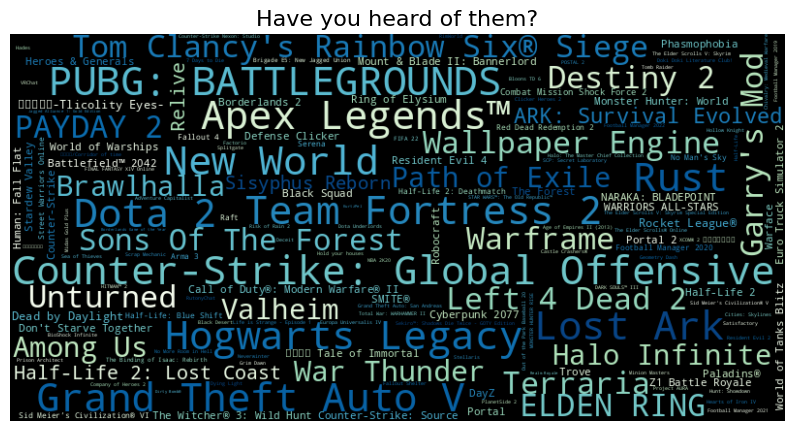

In [ ]:
client = bigquery.Client(project="ba775-team-b01")
query = """SELECT Name FROM `ba775-team-b01.steam_analysis.top_popular_games` ORDER BY Popularity DESC;"""
df = client.query(query).to_dataframe()
word_frequencies = {str(row['Name']): 1000 - idx*2.5 for idx, row in df.iterrows()}
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=200,
                      colormap="GnBu").generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Have you heard of them?", fontsize=16)
plt.show()

Then, we can continue exploring how other variables might potentially influence a game's popularity.

### **Part 2. Genres of Game**

Does the genre of games have an impact on its potential popularity? Let's have a look.

**Q2. What is the most popular genre of games?**

In [ ]:
%%bigquery --project=ba775-team-b01
# Firstly, let's find out all the game genres in the industry, ranking by overall popularity
WITH SplitGenres AS (
    SELECT
        TRIM(genre) AS Single_Genre,
        Popularity
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Genres, ',')) AS genre)

SELECT
    Single_Genre,
    SUM(Popularity) AS Total_Popularity,
    COUNT(*) AS Number_of_Games,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER () * 100, 1) AS Games_Percentage
FROM SplitGenres
GROUP BY Single_Genre
ORDER BY Total_Popularity DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Single_Genre  Total_Popularity  Number_of_Games  Games_Percentage
0                  Action       1879.044393            18411              14.7
1                   Indie       1292.685355            31275              25.0
2               Adventure       1171.473769            17723              14.2
3                     RPG        816.103854             8164               6.5
4            Free to Play        710.831527             3219               2.6
5                Strategy        677.730964             8909               7.1
6              Simulation        657.764002             9380               7.5
7                  Casual        513.352272            16422              13.1
8   Massively Multiplayer        357.724058             1309               1.0
9            Early Access        229.366988             4833               3.9
10                 Sports        142.345750             2124               1.7
11                 Racing         88.048055             1697               1.4
12              Utilities         32.712470              196               0.2
13  Design & Illustration         24.845014              114               0.1
14   Animation & Modeling         23.411370              102               0.1
15          Photo Editing         15.525283               24               0.0
16                Violent          6.700762              374               0.3
17         Web Publishing          5.843254               33               0.0
18       Video Production          5.472000               49               0.0
19                   Gore          4.148079              230               0.2
20              Education          3.029436               66               0.1
21      Software Training          3.025582               45               0.0
22       Game Development          2.376170               47               0.0
23       Audio Production          1.874318               48               0.0
24                 Nudity          1.517802               99               0.1
25         Sexual Content          1.026936               80               0.1
26                  Movie          0.216396                1               0.0
27             Accounting          0.059961                5               0.0

In [ ]:
%%bigquery --project=ba775-team-b01
# Will the genre's ranking change among Top 1% popular games?
WITH SplitGenres AS (
    SELECT
        TRIM(genre) AS Single_Genre,
        Popularity
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Genres, ',')) AS genre)

SELECT
    Single_Genre,
    SUM(Popularity) AS Total_Popularity,
    COUNT(*) AS Number_of_Games,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER () * 100, 1) AS Games_Percentage
FROM SplitGenres
GROUP BY Single_Genre
ORDER BY Total_Popularity DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Single_Genre  Total_Popularity  Number_of_Games  Games_Percentage
0                  Action       1090.310395              278              24.2
1               Adventure        556.348041              150              13.0
2            Free to Play        496.726118               85               7.4
3                   Indie        408.691238              134              11.6
4                     RPG        393.245419              107               9.3
5              Simulation        284.179182              104               9.0
6                Strategy        259.817469               91               7.9
7   Massively Multiplayer        250.989666               60               5.2
8                  Casual        157.754315               59               5.1
9            Early Access         93.384643               29               2.5
10                 Sports         72.491704               32               2.8
11                 Racing         23.135027               11               1.0
12              Utilities         20.335032                4               0.3
13  Design & Illustration         18.344270                3               0.3
14   Animation & Modeling         16.905112                2               0.2
15          Photo Editing         14.049842                1               0.1
16       Video Production          2.855271                1               0.1

Comparing both tables, we can draw the following insights:  

1. **Not Every Genre Can Achieve Popularity:**  
   While there are 28 genres across all games on the Steam platform, only 17 are represented among the top 1% of popular games. This suggests that some genres, such as Education, Nudity and Accounting, are relatively niche, have a smaller market share, and face limited potential for mass appeal.  

2. **Overall Genre Popularity Rankings Are Stable:**  
   The top five genres, **Action, Adventure, Indie, Free to Play, and RPG**, maintain consistent top positions across both datasets, with Action consistently ranking first. This indicates that these genres are universally well-received and hold a strong foothold in the gaming market.  

3. **Higher Potential Genres for Popularity:**  
   Certain genres, like **Action** and **RPG**, occupy a larger share among the top 1% of popular games compared to their representation in the overall dataset. For instance, Action games grow from 14.7% to 24.2%, and RPGs increase from 6.5% to 9.3%. This highlights these genres as having a higher likelihood of achieving popularity.  

4. **Genres with Higher Competition:**  
   **Indie games** account for 25% of all games on Steam but represent only 11.6% of the top 1% of popular games. This suggests that while Indie games are abundant, their acceptance among players is more challenging, likely due to varying quality or limited broad appeal compared to other leading genres.  

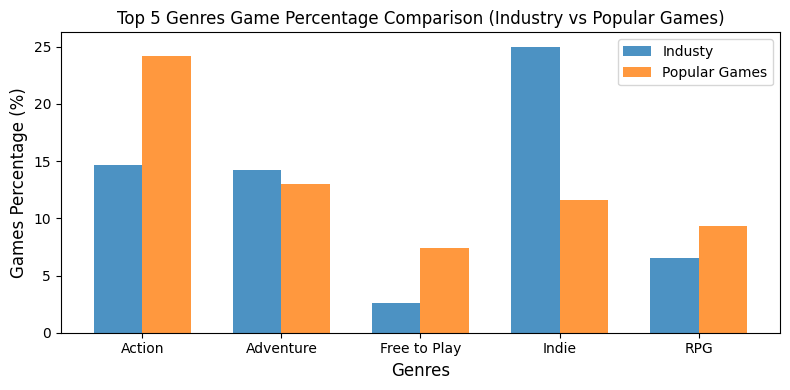

In [ ]:
# Visualize the TOP 5 Genre's Number of Games Percentage for Easy Understanding
sql_result = {"Single_Genre": ["Action", "Adventure","Free to Play","Indie","RPG"],
              "Table1_Percentage": [14.7, 14.2, 2.6, 25.0, 6.5],
              "Table2_Percentage": [24.2, 13.0,7.4, 11.6,9.3]}
df_sql_result = pd.DataFrame(sql_result)
plt.figure(figsize=(8, 4))
x = range(len(df_sql_result["Single_Genre"]))
width = 0.35
plt.bar(x, df_sql_result["Table1_Percentage"], width, label='Industy', alpha=0.8)
plt.bar([p + width for p in x], df_sql_result["Table2_Percentage"], width, label='Popular Games', alpha=0.8)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Games Percentage (%)', fontsize=12)
plt.title('Top 5 Genres Game Percentage Comparison (Industry vs Popular Games)', fontsize=12)
plt.xticks([p + width/2 for p in x], df_sql_result["Single_Genre"], fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

**Q3. How does game performance differ across various genres?**

In [ ]:
%%bigquery --project=ba775-team-b01
# How do "playtime" and "player scale" vary across different genres in the gaming industry?
WITH SplitGenres AS (
    SELECT
        TRIM(genre) AS Single_Genre,
        Peak_CCU,
        Average_playtime_forever,
        Median_playtime_forever,
        Average_owners,
        Popularity
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Genres, ',')) AS genre)

SELECT
    Single_Genre,
    ROUND(AVG(Average_owners),-1) AS Average_Owner,
    (SUM(Average_owners)/1000000) AS Total_Owner_Millions,
    ROUND(AVG(Peak_CCU),-1) AS Average_CCU,
    SUM(Peak_CCU) AS Total_CCU,
    ROUND(AVG(Average_playtime_forever)) AS Average_Playtime,
    ROUND(AVG(Median_playtime_forever)) AS Median_Playtime,
    SUM(Average_playtime_forever) AS Total_Playtime
FROM SplitGenres
GROUP BY Single_Genre
ORDER BY SUM(Popularity) DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Single_Genre  Average_Owner  Total_Owner_Millions  Average_CCU  \
0                  Action       236100.0              4346.925        410.0   
1                   Indie        91710.0              2868.375         80.0   
2               Adventure       138270.0              2450.630        270.0   
3                     RPG       204380.0              1668.525        370.0   
4            Free to Play       535890.0              1725.030        930.0   
5                Strategy       149330.0              1330.405        230.0   
6              Simulation       129680.0              1216.365        260.0   
7                  Casual        67590.0              1109.915         50.0   
8   Massively Multiplayer       675570.0               884.315       1030.0   
9            Early Access        86850.0               419.770        250.0   
10                 Sports       121980.0               259.080        250.0   
11                 Racing       104740.0               177.745        100.0   
12              Utilities       257190.0                50.410        510.0   
13  Design & Illustration       361840.0                41.250        800.0   
14   Animation & Modeling       413240.0                42.150        960.0   
15          Photo Editing      1509580.0                36.230       3590.0   
16                Violent        38620.0                14.445          0.0   
17         Web Publishing        93330.0                 3.080        130.0   
18       Video Production        94900.0                 4.650        210.0   
19                   Gore        43590.0                10.025          0.0   
20              Education        32420.0                 2.140         10.0   
21      Software Training        71110.0                 3.200         10.0   
22       Game Development        43940.0                 2.065         10.0   
23       Audio Production        25940.0                 1.245         40.0   
24                 Nudity        33990.0                 3.365          0.0   
25         Sexual Content        22880.0                 1.830          0.0   
26                  Movie       750000.0                 0.750         10.0   
27             Accounting        23000.0                 0.115          0.0   

    Total_CCU  Average_Playtime  Median_Playtime  Total_Playtime  
0     7594221             178.0            129.0         3269992  
1     2622530             116.0            106.0         3617754  
2     4801759             161.0            148.0         2849495  
3     3000341             287.0            240.0         2345431  
4     2988025             331.0            189.0         1066267  
5     2053217             268.0            229.0         2391464  
6     2398199             247.0            208.0         2319409  
7      768672             108.0             96.0         1766108  
8     1344946             508.0            208.0          665223  
9     1230736             145.0            130.0          701617  
10     528057             258.0            214.0          547097  
11     165547             180.0            148.0          305458  
12     100270             802.0            745.0          157131  
13      91324             883.0            819.0          100718  
14      97486             701.0            836.0           71534  
15      86204             562.0            663.0           13484  
16        359              71.0             77.0           26630  
17       4325            1624.0           1515.0           53592  
18      10381             817.0            853.0           40050  
19        241              57.0             65.0           13060  
20        759             341.0            474.0           22503  
21        589             463.0            585.0           20847  
22        562             373.0            463.0           17516  
23       1774             351.0            303.0           16864  
24         80              60.0             64

The above table displays the results of all games' owner, CCU, and playtime data, grouped by genre. It is ranked by the popularity of each genre. Moving from the top to the bottom, we expect the included columns to show a decreasing pattern as the popularity of genres declines. With this expectation, here are some key observations from the table above:

1. **Total_Owner_Millions shows a clear decreasing pattern** as we move down the table, with higher popularity genres having significantly higher total ownership. This makes sense because ownership accounts for the largest portion of our self-defined popularity column.

2. **Massively Multiplayer** has an exceptionally high Average_CCU as 1,030, which is notably higher than most other genres; yet its Total_Owner_Millions value (884.3 million) is much lower than genres like Action and Indie. This suggests that although Massively Multiplayer games may not have the broadest reach, they have a very active player base, reflecting strong community involvement and high engagement.

3. **High Ownership Genres**: Free to Play, Adventure, and Action. These genres achieve high rankings in both Total_Owner_Millions and Average_Owner, mainly due to their accessibility and general appeal.

4. **Genres with “Die-hard” Fans** (Average Playtime > Median Playtime): Massively Multiplayer stands out as a genre with a loyal fanbase, where Average_Playtime (508) is significantly higher than Median_Playtime (208), suggesting that while some players spend less time, a dedicated subset spends much longer, raising the average.

5. **Genres with “Try-out” Players** (Average Playtime < Median Playtime): Education is an example where Average_Playtime (341) is less than Median_Playtime (474), suggesting that many users explore the genre without sustained engagement.

In [ ]:
%%bigquery --project=ba775-team-b01
# How do "playtime" and "player scale" vary across different genres in top popular games?
WITH SplitGenres AS (
    SELECT
        TRIM(genre) AS Single_Genre,
        Peak_CCU,
        Average_playtime_forever,
        Median_playtime_forever,
        Average_owners,
        Popularity
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Genres, ',')) AS genre)

SELECT
    Single_Genre,
    ROUND(AVG(Average_owners),-1) AS Average_Owner,
    (SUM(Average_owners)/1000000) AS Total_Owner_Millions,
    ROUND(AVG(Peak_CCU),-1) AS Average_CCU,
    SUM(Peak_CCU) AS Total_CCU,
    ROUND(AVG(Average_playtime_forever)) AS Average_Playtime,
    ROUND(AVG(Median_playtime_forever)) AS Median_Playtime,
    SUM(Average_playtime_forever) AS Total_Playtime
FROM SplitGenres
GROUP BY Single_Genre
ORDER BY SUM(Popularity) DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Single_Genre  Average_Owner  Total_Owner_Millions  Average_CCU  \
0                  Action      8897320.0              2473.455      23320.0   
1               Adventure      7408170.0              1111.225      25770.0   
2            Free to Play     13205710.0              1122.485      33140.0   
3                   Indie      6699740.0               897.765      12690.0   
4                     RPG      7806360.0               835.280      20210.0   
5              Simulation      5048940.0               525.090      15760.0   
6                Strategy      5367470.0               488.440      14970.0   
7   Massively Multiplayer     10377250.0               622.635      20220.0   
8                  Casual      5546100.0               327.220       6800.0   
9            Early Access      5835690.0               169.235      24360.0   
10                 Sports      3823910.0               122.365      12690.0   
11                 Racing      4228180.0                46.510       7310.0   
12              Utilities      9062500.0                36.250      21940.0   
13  Design & Illustration     11966670.0                35.900      28830.0   
14   Animation & Modeling     17575000.0                35.150      43070.0   
15          Photo Editing     35000000.0                35.000      85640.0   
16       Video Production       150000.0                 0.150        490.0   

    Total_CCU  Average_Playtime  Median_Playtime  Total_Playtime  
0     6483109            3991.0           1851.0         1109589  
1     3865189            5710.0           5381.0          856507  
2     2816612            6978.0           4437.0          593118  
3     1700543            5073.0           4181.0          679721  
4     2162710            6465.0           4777.0          691805  
5     1638942            7358.0           5017.0          765238  
6     1362324            8025.0           5974.0          730310  
7     1213201            5578.0           1396.0          334684  
8      401012            8199.0           7161.0          483744  
9      706553            6974.0           5974.0          202247  
10     406139            8309.0           5992.0          265895  
11      80444            5029.0           2132.0           55319  
12      87760           17068.0          15565.0           68271  
13      86492           16004.0          14080.0           48011  
14      86137           15427.0          17918.0           30853  
15      85643            3460.0            788.0            3460  
16        494           27393.0          35048.0           27393

When we turn to the popular games, there're several significant changes worth mentioning.
1. **Overall increase in all metrics**: In the top 1% of games, all key metrics—Average Owner, Total Owner Millions, Average CCU, Total CCU, Average Playtime, Median Playtime, and Total Playtime—show substantial increases compared to the total game dataset. This indicates not only broader appeal but also deeper commitment from players.

2. **Change in Average_Playtime and Medium_Playtime for Free To Play genre**:
In previous table the  Average_Playtime and Medium_Playtime for Free To Play genre was (331 vs. 189 minutes), which changed to (6,978 vs. 4,437 minutes) in top 1% games. The significant increase in the gap suggests that top Free to Play games have some players who spend exceptionally long hours, raising the average playtime well above the median.


**Q4. How fast did those Top 5 Genres grow?**

In [ ]:
%%bigquery --project=ba775-team-b01
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year, genre
)

SELECT *
FROM yearly_genre_counts
WHERE genre IN ('Action', 'RPG','Adventure','Indie','Free to Play')
ORDER BY year, genre;

Query is running:   0%|          |

Downloading:   0%|          |

year         genre  new_games_count
0    1997        Action                2
1    1997         Indie                2
2    1998        Action                1
3    1999        Action                3
4    1999     Adventure                1
..    ...           ...              ...
101  2023        Action              835
102  2023     Adventure              879
103  2023  Free to Play               20
104  2023         Indie             1351
105  2023           RPG              469

[106 rows x 3 columns]

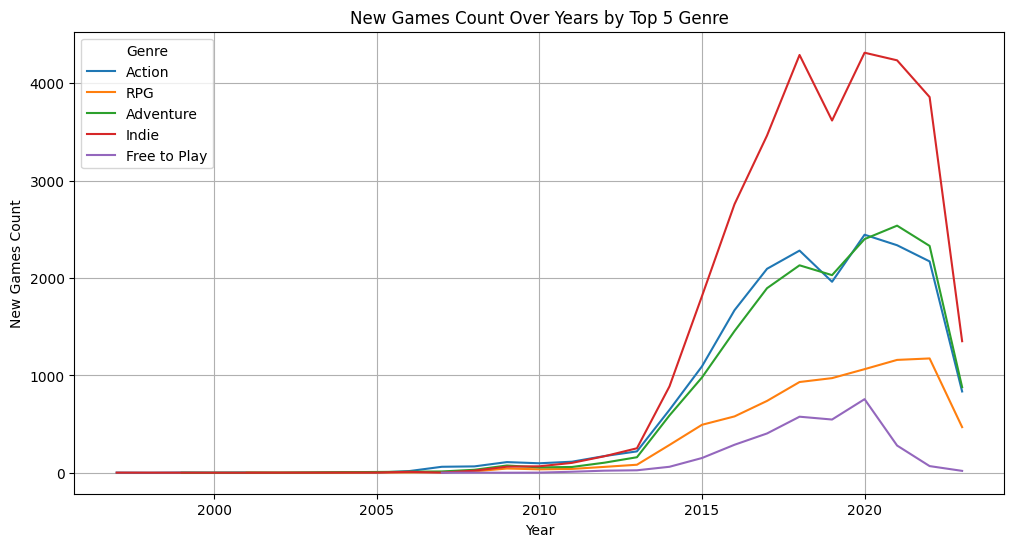

In [ ]:
# Let's visualize the outcome above for clearer insight
client = bigquery.Client(project="ba775-team-b01")
query = """
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year, genre
)

SELECT *
FROM yearly_genre_counts
WHERE genre IN ('Action', 'RPG','Adventure','Indie','Free to Play')
ORDER BY year, genre;
"""
df = client.query(query).to_dataframe()
plt.figure(figsize=(12, 6))
selected_genres = ['Action', 'RPG','Adventure','Indie','Free to Play']
for genre in selected_genres:
    genre_data = df[df['genre'] == genre]
    plt.plot(genre_data['year'], genre_data['new_games_count'], label=genre)

plt.title("New Games Count Over Years by Top 5 Genre")
plt.xlabel("Year")
plt.ylabel("New Games Count")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

From the chart, we can observe significant changes in the number of new games released across different genres between 2000 and 2020. Since about 2008, the number of new games released grew quickly. The Indie genre, in particular, grew the most around 2015, surpassing other genres by a wide margin. Meanwhile, Action and Adventure games showed steady growth, reflecting their consistent demand in the market.

Since the growth of different genres varies a lot, directly comparing the numbers might hide some interesting trends. Therefore, we plan to analyze the growth rates of new games for each genre to better understand their relative trends. Before 2008, not many games were released, which makes the growth rates less reliable. To avoid this issue, we will focus on growth trends from 2008 onwards for better insights.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM ba775-team-b01.steam_analysis.master_sheet_popular,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year, genre
),

total_games_per_year AS (
    SELECT
        year,
        SUM(new_games_count) AS total_games,
        SUM(new_games_count) - LAG(SUM(new_games_count)) OVER (ORDER BY year) AS total_growth,
        (SUM(new_games_count) - LAG(SUM(new_games_count)) OVER (ORDER BY year)) /
        LAG(SUM(new_games_count)) OVER (ORDER BY year) AS total_growth_rate
    FROM yearly_genre_counts
    GROUP BY year
),

genre_growth_rates AS (
    SELECT
        year,
        genre,
        new_games_count,
        new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS genre_growth,
        (new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year)) /
        LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS genre_growth_rate
    FROM yearly_genre_counts
),

top_genres_filtered AS (
    SELECT *
    FROM genre_growth_rates
    WHERE genre IN ('Action', 'RPG', 'Adventure', 'Indie', 'Free to Play')
)

SELECT *
FROM (
    SELECT year, 'Total' AS type, NULL AS genre, total_growth_rate AS growth_rate
    FROM total_games_per_year
    UNION ALL
    SELECT year, 'Genre' AS type, genre, genre_growth_rate AS growth_rate
    FROM top_genres_filtered
)
WHERE year > 2008
ORDER BY year, type, genre;

Query is running:   0%|          |

Downloading:   0%|          |

year   type         genre  growth_rate
0   2009  Genre        Action     0.666667
1   2009  Genre     Adventure     1.419355
2   2009  Genre  Free to Play    -0.500000
3   2009  Genre         Indie     1.863636
4   2009  Genre           RPG     1.933333
..   ...    ...           ...          ...
85  2023  Genre     Adventure    -0.622585
86  2023  Genre  Free to Play    -0.710145
87  2023  Genre         Indie    -0.649728
88  2023  Genre           RPG    -0.600511
89  2023  Total          None    -0.633471

[90 rows x 4 columns]

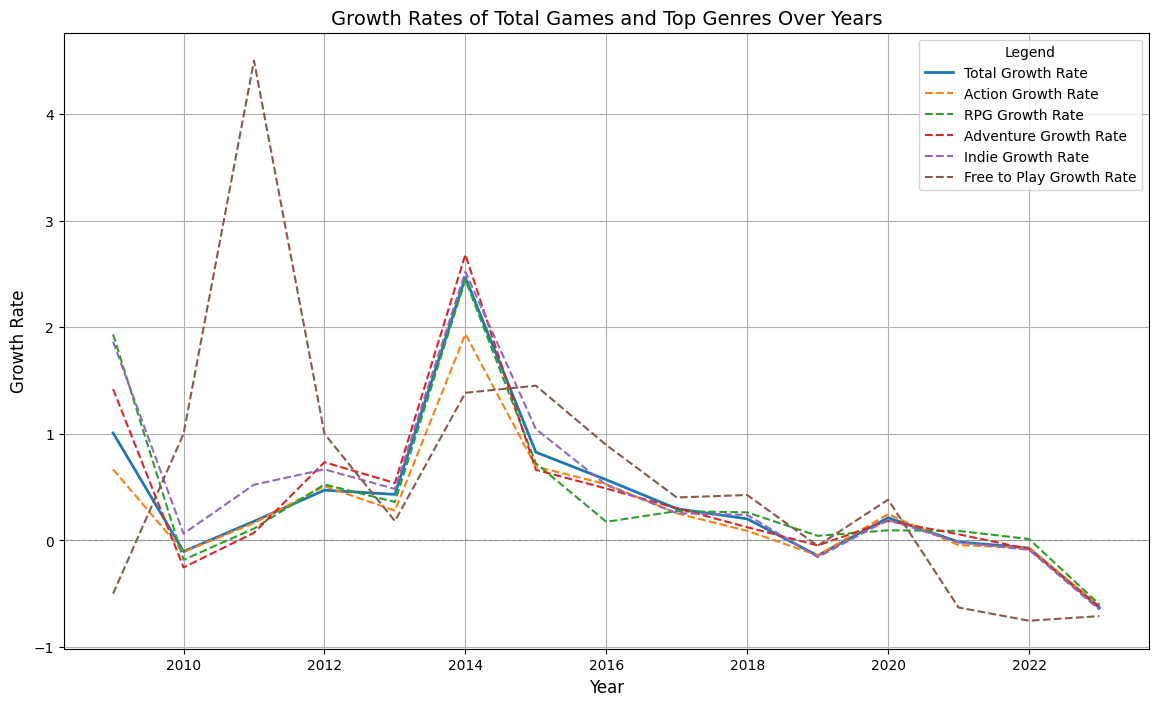

In [ ]:
client = bigquery.Client(project="ba775-team-b01")
query = """
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM ba775-team-b01.steam_analysis.master_sheet_popular,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year, genre
),

total_games_per_year AS (
    SELECT
        year,
        SUM(new_games_count) AS total_games,
        SUM(new_games_count) - LAG(SUM(new_games_count)) OVER (ORDER BY year) AS total_growth,
        (SUM(new_games_count) - LAG(SUM(new_games_count)) OVER (ORDER BY year)) /
        LAG(SUM(new_games_count)) OVER (ORDER BY year) AS total_growth_rate
    FROM yearly_genre_counts
    GROUP BY year
),

genre_growth_rates AS (
    SELECT
        year,
        genre,
        new_games_count,
        new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS genre_growth,
        (new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year)) /
        LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS genre_growth_rate
    FROM yearly_genre_counts
),

top_genres_filtered AS (
    SELECT *
    FROM genre_growth_rates
    WHERE genre IN ('Action', 'RPG', 'Adventure', 'Indie', 'Free to Play')
)

SELECT *
FROM (
    SELECT year, 'Total' AS type, NULL AS genre, total_growth_rate AS growth_rate
    FROM total_games_per_year
    UNION ALL
    SELECT year, 'Genre' AS type, genre, genre_growth_rate AS growth_rate
    FROM top_genres_filtered
)
WHERE year > 2008
ORDER BY year, type, genre;
"""

df = client.query(query).to_dataframe()


df = df[df['year'] > 2008]

total_games_per_year = df[df['type'] == 'Total'][['year', 'growth_rate']].rename(columns={'growth_rate': 'total_growth_rate'})

plt.figure(figsize=(14, 8))


plt.plot(total_games_per_year['year'], total_games_per_year['total_growth_rate'], label='Total Growth Rate', linewidth=2)


selected_genres = ['Action', 'RPG', 'Adventure', 'Indie', 'Free to Play']
for genre in selected_genres:
    genre_data = df[(df['type'] == 'Genre') & (df['genre'] == genre)]
    plt.plot(genre_data['year'], genre_data['growth_rate'], label=f"{genre} Growth Rate", linestyle='--')


plt.title("Growth Rates of Total Games and Top Genres Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate", fontsize=12)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--', alpha=0.7)
plt.legend(title="Legend", fontsize=10)
plt.grid(True)

plt.show()


Since the growth rates of each genre seem very similar, we decided to look at the historical accumulated growth rate to identify which genre has the fastest overall growth.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

filtered_genres AS (
    SELECT *
    FROM exploded_genres
    WHERE genre IN ('Action', 'RPG', 'Adventure', 'Indie', 'Free to Play')
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM filtered_genres
    GROUP BY year, genre
),

total_yearly_counts AS (
    SELECT
        year,
        'Total' AS genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year
),

combined_counts AS (
    SELECT * FROM yearly_genre_counts
    UNION ALL
    SELECT * FROM total_yearly_counts
),

genre_growth_rates AS (
    SELECT
        year,
        genre,
        new_games_count,
        LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS prev_new_games_count,
        SAFE_DIVIDE(new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year),
                    LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year)) AS growth_rate
    FROM combined_counts
),

genre_accumulated_growth AS (
    SELECT
        year,
        genre,
        new_games_count,
        growth_rate,
        SUM(growth_rate) OVER (PARTITION BY genre ORDER BY year) AS accumulated_growth
    FROM genre_growth_rates
)

SELECT *
FROM genre_accumulated_growth
ORDER BY genre, year;

Query is running:   0%|          |

Downloading:   0%|          |

year   genre  new_games_count  growth_rate  accumulated_growth
0    1997  Action                2          NaN                 NaN
1    1998  Action                1    -0.500000           -0.500000
2    1999  Action                3     2.000000            1.500000
3    2000  Action                2    -0.333333            1.166667
4    2001  Action                3     0.500000            1.666667
..    ...     ...              ...          ...                 ...
128  2019   Total            14188    -0.142874           20.563634
129  2020   Total            17198     0.212151           20.775785
130  2021   Total            16954    -0.014188           20.761597
131  2022   Total            15745    -0.071311           20.690287
132  2023   Total             5771    -0.633471           20.056816

[133 rows x 5 columns]

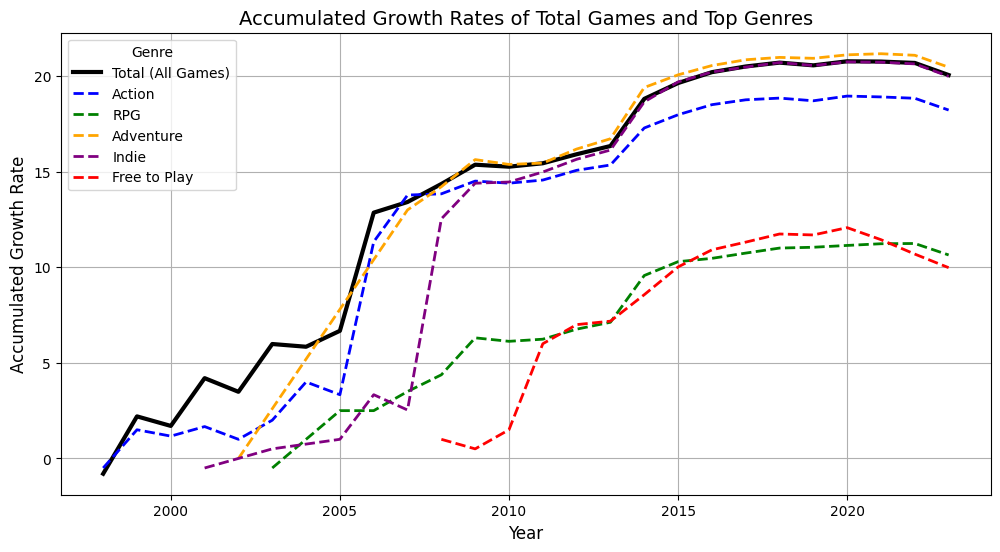

In [ ]:
# Visualization for better understanding
client = bigquery.Client(project="ba775-team-b01")
query = """
WITH exploded_genres AS (
    SELECT
        EXTRACT(YEAR FROM TIMESTAMP(release_date)) AS year,
        genre
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(genres, ',')) AS genre
    WHERE release_date IS NOT NULL AND genres IS NOT NULL
),

filtered_genres AS (
    SELECT *
    FROM exploded_genres
    WHERE genre IN ('Action', 'RPG', 'Adventure', 'Indie', 'Free to Play')
),

yearly_genre_counts AS (
    SELECT
        year,
        genre,
        COUNT(*) AS new_games_count
    FROM filtered_genres
    GROUP BY year, genre
),

total_yearly_counts AS (
    SELECT
        year,
        'Total' AS genre,
        COUNT(*) AS new_games_count
    FROM exploded_genres
    GROUP BY year
),

combined_counts AS (
    SELECT * FROM yearly_genre_counts
    UNION ALL
    SELECT * FROM total_yearly_counts
),

genre_growth_rates AS (
    SELECT
        year,
        genre,
        new_games_count,
        LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year) AS prev_new_games_count,
        SAFE_DIVIDE(new_games_count - LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year),
                    LAG(new_games_count) OVER (PARTITION BY genre ORDER BY year)) AS growth_rate
    FROM combined_counts
),

genre_accumulated_growth AS (
    SELECT
        year,
        genre,
        new_games_count,
        growth_rate,
        SUM(growth_rate) OVER (PARTITION BY genre ORDER BY year) AS accumulated_growth
    FROM genre_growth_rates
)

SELECT *
FROM genre_accumulated_growth
ORDER BY genre, year;
"""

df = client.query(query).to_dataframe()
plt.figure(figsize=(12, 6))
total_data = df[df['genre'] == 'Total']
plt.plot(
    total_data['year'],
    total_data['accumulated_growth'],
    label='Total (All Games)',
    color='black',
    linewidth=3,
    linestyle='-'
)

selected_genres = ['Action', 'RPG', 'Adventure', 'Indie', 'Free to Play']
linestyles = ['--', '--', '--', '--', '--']
colors = ['blue', 'green', 'orange', 'purple', 'red']
for genre, linestyle, color in zip(selected_genres, linestyles, colors):
    genre_data = df[df['genre'] == genre]
    plt.plot(
        genre_data['year'],
        genre_data['accumulated_growth'],
        label=f"{genre}",
        linestyle=linestyle,
        color=color,
        linewidth=2
    )

plt.title("Accumulated Growth Rates of Total Games and Top Genres", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Accumulated Growth Rate", fontsize=12)
plt.legend(title="Genre", fontsize=10)
plt.grid(True)
plt.show()

Genres like Action, RPG, and Adventure closely follow overall market trends, highlighting the significant contributions of these top genres to the growth of the gaming industry. Meanwhile, Indie games show a steeper growth trajectory than the overall market, indicating their rapid expansion and potential to become the leading genre in the future. In contrast, the Free-to-Play genre has been less stable than other genres. While it saw rapid growth at first, its growth rate has slowed in recent years, showing a downward trend.
It would be misleading to label Free-to-Play as the most inconsistent among the top five genres based solely on its volatility. This motivates our decision to further investigate how price influences popularity, providing deeper insights into these dynamics.

### **Part 3. Price of Game**

**Q5. Free vs. Paid: Which type of games are more popular?**

When it comes to this question, you might already have an intuitive answer. However, let's validate it with concrete data analysis and uncover the actual trends.

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
CASE WHEN Price = 0 THEN 'Free' ELSE 'Paid' END AS game_type,
COUNT(DISTINCT ID) AS Number_of_games,
CONCAT(ROUND(COUNT(DISTINCT ID) / SUM(COUNT(DISTINCT ID)) OVER () * 100, 2), '%') AS percentage_of_games,
AVG(Popularity) AS avg_popularity,
ROUND(AVG(Average_owners))AS avg_owners,
ROUND(AVG(Average_playtime_forever)) AS avg_playtime,
ROUND(AVG(Median_playtime_forever)) AS avg_median_playtime,
ROUND(AVG(Peak_CCU)) AS avg_peak_ccu
FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
GROUP BY game_type
ORDER BY game_type;

Query is running:   0%|          |

Downloading:   0%|          |

game_type  Number_of_games percentage_of_games  avg_popularity  avg_owners  \
0      Free             6040              13.94%        0.150679    356950.0   
1      Paid            37301              86.06%        0.059357    122424.0   

   avg_playtime  avg_median_playtime  avg_peak_ccu  
0         283.0                203.0         548.0  
1         168.0                149.0         189.0

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
CASE WHEN Price = 0 THEN 'Free' ELSE 'Paid' END AS game_type,
COUNT(DISTINCT ID) AS Number_of_games,
CONCAT(ROUND(COUNT(DISTINCT ID) / SUM(COUNT(DISTINCT ID)) OVER () * 100, 2), '%') AS percentage_of_games,
AVG(Popularity) AS avg_popularity,
ROUND(AVG(Average_owners))AS avg_owners,
ROUND(AVG(Average_playtime_forever)) AS avg_playtime,
ROUND(AVG(Median_playtime_forever)) AS avg_median_playtime,
ROUND(AVG(Peak_CCU)) AS avg_peak_ccu
FROM `ba775-team-b01.steam_analysis.top_popular_games`
GROUP BY game_type
ORDER BY game_type;

Query is running:   0%|          |

Downloading:   0%|          |

game_type  Number_of_games percentage_of_games  avg_popularity  avg_owners  \
0      Free              110              25.35%        5.410445  11910182.0   
1      Paid              324              74.65%        2.755627   5760170.0   

   avg_playtime  avg_median_playtime  avg_peak_ccu  
0        8357.0               6495.0       27992.0  
1        4503.0               3085.0       15229.0

Comparing both tables above, we can have following insights:

* **Free Games Drive Popularity in the Gaming Market:** In the overall dataset, free games make up approximately 14% of the games, as 6,040 free vs. 37,301 paid. However, within the Popular Games pool, the proportion of free games rises to about 25%, as 110 free vs. 324 paid. This suggests that free games are more likely to be popular, indicating a potential advantage in boosting popularity.

* **Free Games Dominate Popularity, Even Among popular Games**: When comparing industry averages and the averages within Popular Games, we found that across various metrics, such as user count, average playtime, and peak concurrent users, free games consistently outperformed paid games. This supports the influence of “free game” users and demonstrates how a free game strategy can be highly effective in attracting players and enhancing a game's popularity.

Since the majority of the market is paid games, we wanted to look further into whether the pricing range would also have an impact on games popularity.

**Q6. Does different price range affect the game's popularity?**


In order to study the price range, we need to have a reasonable price breakdown, so we can look at the price range of existing games on the market firstly.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH game_data AS (
  SELECT
    ROUND(Price, -1) AS Price,
    COUNT(DISTINCT ID) AS Number_of_games
  FROM
    ba775-team-b01.steam_analysis.master_sheet_popular
  WHERE
    Release_date IS NOT NULL
    AND Price > 0
  GROUP BY
    ROUND(Price, -1)
),
totals AS (
  SELECT
    Price,
    Number_of_games,
    SUM(Number_of_games) OVER () AS Total_games
  FROM
    game_data
),
percentages AS (
  SELECT
    Price,
    Number_of_games,
    Total_games,
    Number_of_games * 1.0 / Total_games AS percentage,
    SUM(Number_of_games * 1.0 / Total_games) OVER (ORDER BY Price ASC) AS cumulative_percentage
  FROM
    totals
)
SELECT
  Price,
  Number_of_games,
  ROUND(percentage * 100, 2) AS percentage,
  ROUND(cumulative_percentage * 100, 2) AS cumulative_percentage
FROM
  percentages
ORDER BY
  Price ASC;

Query is running:   0%|          |

Downloading:   0%|          |

Price  Number_of_games  percentage  cumulative_percentage
0     0.0            16413       44.00                  44.00
1    10.0            14435       38.70                  82.70
2    20.0             4485       12.02                  94.72
3    30.0             1049        2.81                  97.54
4    40.0              483        1.29                  98.83
5    50.0              182        0.49                  99.32
6    60.0              210        0.56                  99.88
7    70.0               22        0.06                  99.94
8    80.0                9        0.02                  99.97
9    90.0                2        0.01                  99.97
10  100.0                2        0.01                  99.98
11  120.0                3        0.01                  99.98
12  130.0                1        0.00                  99.99
13  200.0                4        0.01                 100.00
14  270.0                1        0.00                 100.00

It is important to note that the prices in this table have been rounded to the nearest 10 using ROUND(-1). For example, in the table 0 represents the range of 0–5 dollars, and 10 represents 5–15 dollars. This ensures clarity in our categorization and avoids misinterpretation of the data segmentation.

Based on the table above, we found that 44% of games are priced between 0-5 dollars while the majority (82.7%) games having their price below 15 dollars. There were some percentages that weren't very high, but the number of games were okay (like over 4-digit orders of magnitude), so we gave those games a segment anyway. We have referred to the true percentage in the table and adjusted it in the right proportion to become the following interval:

- Low Price (0–5 dollars)
- Mid-Low Price (5–15 dollars)
- Mid-High Price (15–35 dollars)
- High Price (35–75 dollars)
- Luxury Price (above 75 dollars).


In [ ]:
%%bigquery --project=ba775-team-b01
# We check the total games price range performance first
WITH price_segments AS (
  SELECT
    CASE
      WHEN Price > 0 AND Price <= 5 THEN 'Low Price'
      WHEN Price > 5 AND Price <= 15 THEN 'Mid-Low Price'
      WHEN Price > 15 AND Price <= 35 THEN 'Mid-High Price'
      WHEN Price > 35 AND Price <= 75 THEN 'High Price'
      ELSE 'Luxury Price'
    END AS price_range,
    COUNT(ID) AS total_games,
    AVG(Price) AS avg_price,
    FORMAT('%0.2f%%', COUNT(ID) * 100.0 / SUM(COUNT(ID)) OVER()) AS game_percentage,
    FORMAT('%0.2f', AVG(Popularity)) AS avg_popularity,
    SUM(Average_owners) / 1000000 AS total_millions_owners,
    FORMAT('%0.2f', AVG(Average_owners)) AS avg_owners,
    FORMAT('%0.2f', AVG(Peak_CCU)) AS avg_peak_ccu,
    FORMAT('%0.2f', AVG(Average_playtime_forever)) AS avg_playtime,
  FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`
  WHERE
    Price > 0
  GROUP BY
    price_range
  ORDER BY
    avg_price DESC
)
SELECT
  price_range,
  total_games,
  FORMAT('%0.2f', avg_price) AS avg_price,
  game_percentage,
  avg_popularity,
  total_millions_owners,
  avg_owners,
  avg_peak_ccu,
  avg_playtime,
FROM
  price_segments;

Query is running:   0%|          |

Downloading:   0%|          |

price_range  total_games avg_price game_percentage avg_popularity  \
0    Luxury Price           22    121.13           0.06%           0.05   
1      High Price          896     47.70           2.40%           0.44   
2  Mid-High Price         5529     22.28          14.82%           0.13   
3   Mid-Low Price        14435     10.31          38.70%           0.05   
4       Low Price        16419      2.87          44.02%           0.02   

   total_millions_owners avg_owners avg_peak_ccu avg_playtime  
0                  0.400   18181.82        18.68       363.73  
1                608.665  679313.62      3892.02      1122.55  
2               1465.435  265045.22       444.48       384.44  
3               1565.340  108440.60        58.52       139.31  
4                926.685   56439.80        15.62        68.74

In [ ]:
%%bigquery --project=ba775-team-b01
# Then we check the popular games price range performance
WITH price_segments AS (
  SELECT
    CASE
      WHEN Price > 0 AND Price <= 5 THEN 'Low Price'
      WHEN Price > 5 AND Price <= 15 THEN 'Mid-Low Price'
      WHEN Price > 15 AND Price <= 35 THEN 'Mid-High Price'
      WHEN Price > 35 AND Price <= 75 THEN 'High Price'
      ELSE 'Luxury Price'
    END AS price_range,
    COUNT(ID) AS total_games,
    AVG(Price) AS avg_price,
    FORMAT('%0.2f%%', COUNT(ID) * 100.0 / SUM(COUNT(ID)) OVER()) AS game_percentage,
    FORMAT('%0.2f', AVG(Popularity)) AS avg_popularity,
    SUM(Average_owners) / 1000000 AS total_millions_owners,
    FORMAT('%0.2f', AVG(Average_owners)) AS avg_owners,
    FORMAT('%0.2f', AVG(Peak_CCU)) AS avg_peak_ccu,
    FORMAT('%0.2f', AVG(Average_playtime_forever)) AS avg_playtime,
  FROM
    `ba775-team-b01.steam_analysis.top_popular_games`
  WHERE
    Price > 0
  GROUP BY
    price_range
  ORDER BY
    avg_price DESC
)
SELECT
  price_range,
  total_games,
  FORMAT('%0.2f', avg_price) AS avg_price,
  game_percentage,
  avg_popularity,
  total_millions_owners,
  avg_owners,
  avg_peak_ccu,
  avg_playtime,
FROM
  price_segments;

Query is running:   0%|          |

Downloading:   0%|          |

price_range  total_games avg_price game_percentage avg_popularity  \
0      High Price           82     51.43          25.31%           3.21   
1  Mid-High Price          133     24.11          41.05%           2.38   
2   Mid-Low Price           80     11.67          24.69%           2.89   
3       Low Price           29      4.16           8.95%           2.84   

   total_millions_owners  avg_owners avg_peak_ccu avg_playtime  
0                431.955  5267743.90     33636.04      5322.09  
1                673.505  5063947.37     11669.14      3696.51  
2                545.055  6813187.50      6020.38      4789.99  
3                215.780  7440689.66      4912.72      5090.83

By studying and comparing the two tables, we can draw the following conclusions:

**Luxury Price Games Are Absent in Popular Games:**

While luxury-priced games (over 75 dollars) exist in the overall dataset, they are entirely missing from the popular games category. This suggests that excessively high prices deter wide adoption, even for high-quality or engaging games.

**High-Price Games Dominate Both Categories:**

In both the overall and popular games datasets, high-price games (35-75 dollars) emerge as the most popular, surpassing low-price games in terms of average popularity and ownership. This observation contradicts the earlier trend of free games dominating the market, highlighting that within the realm of paid games, quality outweighs affordability. Once players commit to purchasing a game, they prioritize game quality or perceived value over price.

**Consistency in Engagement and Ownership Trends:**

High-price (35-75 dollars) and mid-high-price (15-35 dollars) games consistently perform well across both datasets, achieving higher average peak concurrent users (CCU) and ownership. This indicates a preference for higher-priced games that offer a better overall gaming experience, resulting in higher player engagement.

**Differences in Market Distribution:**

The overall dataset is dominated by low-price (44.02%) and mid-low-price games (38.7%), indicating that affordability drives the volume of games in the market. However, in the popular games category, mid-high-price (41.05%) and high-price games (25.31%) dominate, signaling that popular games tend to come from the higher-priced segments.

**Alignment in Other Metrics:**

Metrics like average owners and average CCU show similar trends in both datasets, with high-price (35-75 dollars) and mid-high-price (15-35 dollars) games consistently outperforming lower-priced categories. However, the overall dataset shows a broader representation of low-price games (0-5 dollars), suggesting they appeal more to the mass market rather than achieving the top-tier popularity of higher-priced games.

After analyzing the differences between free and paid games as well as pricing strategies, the final question is: which type of game is likely to dominate the market in the future?

**Q7. Free VS. Paid: Which type of games grow faster?**

In [ ]:
%%bigquery --project=ba775-team-b01
WITH yearly_data AS (
  SELECT
    EXTRACT(YEAR FROM Release_date) AS year,
    SUM(CASE WHEN Price = 0 THEN 1 ELSE 0 END) AS Free,
    SUM(CASE WHEN Price > 0 THEN 1 ELSE 0 END) AS Paid
  FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`
  WHERE
    Release_date IS NOT NULL
  GROUP BY
    year
),
growth_rate AS (
  SELECT
    year,
    Free,
    Paid,
    LAG(Free) OVER (ORDER BY year) AS prev_free,
    LAG(Paid) OVER (ORDER BY year) AS prev_paid
  FROM
    yearly_data
)
SELECT
  year,
  Free,
  CASE
    WHEN prev_free IS NULL THEN NULL
    ELSE CONCAT(ROUND(SAFE_DIVIDE(Free - prev_free, prev_free) * 100, 2), '%')
  END AS Free_growth_rate,
  Paid,
  CASE
    WHEN prev_paid IS NULL THEN NULL
    ELSE CONCAT(ROUND(SAFE_DIVIDE(Paid - prev_paid, prev_paid) * 100, 2), '%')
  END AS Paid_growth_rate
FROM
  growth_rate
ORDER BY
  year;

Query is running:   0%|          |

Downloading:   0%|          |

year  Free Free_growth_rate  Paid Paid_growth_rate
0   1997     1             None     1             None
1   1998     0            -100%     1               0%
2   1999     1             None     2             100%
3   2000     0            -100%     2               0%
4   2001     0             None     4             100%
5   2002     0             None     1             -75%
6   2003     0             None     3             200%
7   2004     0             None     6             100%
8   2005     1             None     6               0%
9   2006     5             400%    58          866.67%
10  2007    14             180%    84           44.83%
11  2008    20           42.86%   139           65.48%
12  2009    24              20%   286          105.76%
13  2010    25            4.17%   230          -19.58%
14  2011    25               0%   234            1.74%
15  2012    43              72%   287           22.65%
16  2013    52           20.93%   386           34.49%
17  2014   163          213.46%  1393          260.88%
18  2015   324           98.77%  2161           55.13%
19  2016   621           91.67%  3197           47.94%
20  2017   856           37.84%  3865           20.89%
21  2018  1171            36.8%  4403           13.92%
22  2019   933          -20.32%  3770          -14.38%
23  2020  1153           23.58%  4461           18.33%
24  2021   473          -58.98%  5260           17.91%
25  2022   115          -75.69%  5182           -1.48%
26  2023    20          -82.61%  1879          -63.74%

Before 2008, the minimal number of games caused significant fluctuations in growth rates, which greatly interfered with the analysis of overall trends.Therefore, we focus only on the growth trends after 2008.

Overall, the scale of growth in paid games has been substantially greater than that of free games. Both types of games experienced relatively steady growth before 2014, but 2014 marked a significant turning point with an explosion in game releases. During the subsequent period, the growth of free games outpaced that of paid games.

Since 2019, the growth rates of both free and paid games have started to show negative trends. However, compared to free games, paid games have experienced a smaller decline even during this period of negative growth. In recent years, it has become evident that paid games have surpassed free games in terms of growth, and based on this trend, it is reasonable to predict that paid games will continue to dominate the market in the future.

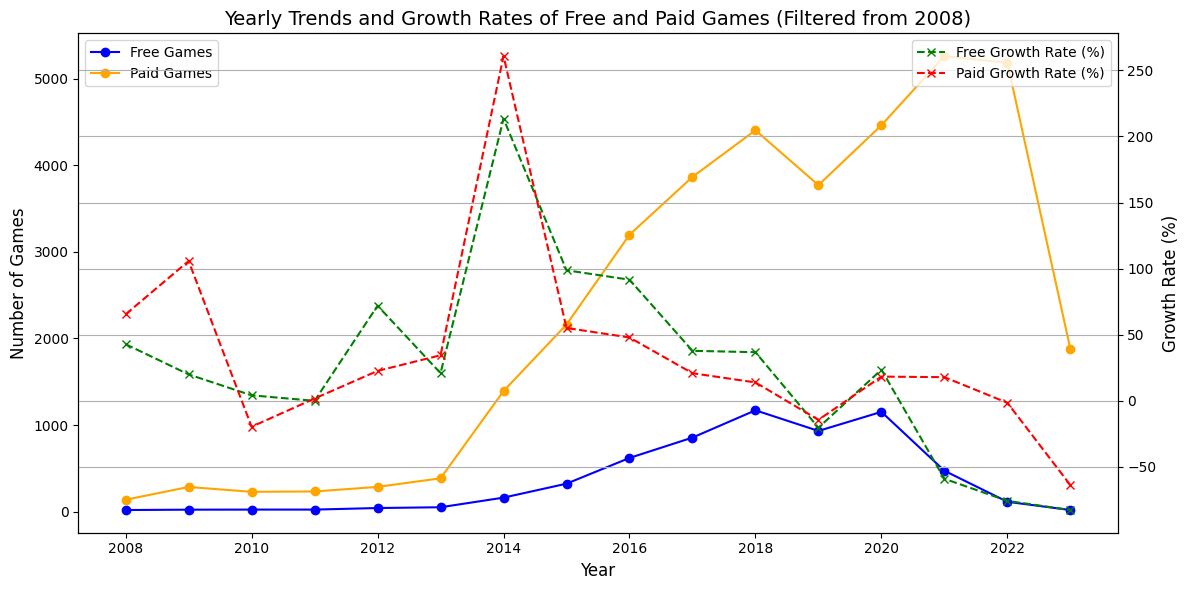

In [ ]:
# Visualization for better understanding
client = bigquery.Client(project="ba775-team-b01")
query = """
WITH yearly_data AS (
  SELECT
    EXTRACT(YEAR FROM Release_date) AS year,
    SUM(CASE WHEN Price = 0 THEN 1 ELSE 0 END) AS Free,
    SUM(CASE WHEN Price > 0 THEN 1 ELSE 0 END) AS Paid
  FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`
  WHERE
    Release_date IS NOT NULL -- Exclude records with missing release dates
  GROUP BY
    year
),
growth_rate AS (
  SELECT
    year,
    Free,
    Paid,
    LAG(Free) OVER (ORDER BY year) AS prev_free,
    LAG(Paid) OVER (ORDER BY year) AS prev_paid
  FROM
    yearly_data
)
SELECT
  year,
  Free,
  CASE
    WHEN prev_free IS NULL THEN NULL
    ELSE CONCAT(ROUND(SAFE_DIVIDE(Free - prev_free, prev_free) * 100, 2), '%')
  END AS Free_growth_rate,
  Paid,
  CASE
    WHEN prev_paid IS NULL THEN NULL
    ELSE CONCAT(ROUND(SAFE_DIVIDE(Paid - prev_paid, prev_paid) * 100, 2), '%')
  END AS Paid_growth_rate
FROM
  growth_rate
ORDER BY
  year;
"""

df = client.query(query).to_dataframe()
df_filtered = df[df['year'] >= 2008].copy()
df_filtered['Free_growth_rate'] = pd.to_numeric(
    df_filtered['Free_growth_rate'].str.replace('%', ''), errors='coerce')
df_filtered['Paid_growth_rate'] = pd.to_numeric(
    df_filtered['Paid_growth_rate'].str.replace('%', ''), errors='coerce')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_filtered['year'], df_filtered['Free'], marker='o', label='Free Games', color='blue')
ax1.plot(df_filtered['year'], df_filtered['Paid'], marker='o', label='Paid Games', color='orange')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Games', fontsize=12)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_filtered['year'], df_filtered['Free_growth_rate'], marker='x', linestyle='--', label='Free Growth Rate (%)', color='green')
ax2.plot(df_filtered['year'], df_filtered['Paid_growth_rate'], marker='x', linestyle='--', label='Paid Growth Rate (%)', color='red')
ax2.set_ylabel('Growth Rate (%)', fontsize=12)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Yearly Trends and Growth Rates of Free and Paid Games (Filtered from 2008)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### **Part 4. DLC (downloadable content) Quantity of Game**

Downloadable Content (DLC) refers to additional content that can be purchased and downloaded to enhance or extend the original game experience. DLCs often include new levels, characters, storylines, or features, and are typically offered at varying price points depending on the scope of the content, allowing developers to generate ongoing revenue while keeping players engaged beyond the base game.

**Q8. Is "DLC Quantity" related to game's popularity?**

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
(CASE WHEN DLC_count > 0 THEN 'With DLC' ELSE 'Without DLC' END) AS dlc_status,
COUNT(DISTINCT ID) AS number_of_games,
CONCAT(ROUND(COUNT(DISTINCT ID) / SUM(COUNT(DISTINCT ID)) OVER () * 100, 2), '%') AS percentage_of_games,
AVG(Popularity) AS avg_popularity,
ROUND(AVG(Average_owners)) AS avg_owners,
ROUND(AVG(Average_playtime_forever), 2) AS avg_playtime,
ROUND(AVG(Median_playtime_forever)) AS avg_median_playtime,
ROUND(AVG(Peak_CCU)) AS avg_peak_ccu
FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
WHERE ID IS NOT NULL
GROUP BY dlc_status
ORDER BY avg_popularity DESC;

Query is running:   0%|          |

Downloading:   0%|          |

dlc_status  number_of_games percentage_of_games  avg_popularity  \
0     With DLC             9042              20.86%        0.191335   
1  Without DLC            34299              79.14%        0.040647   

   avg_owners  avg_playtime  avg_median_playtime  avg_peak_ccu  
0    391109.0        452.67                358.0         819.0  
1     92892.0        113.54                103.0          86.0

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
(CASE WHEN DLC_count > 0 THEN 'With DLC' ELSE 'Without DLC' END) AS dlc_status,
COUNT(DISTINCT ID) AS number_of_games,
CONCAT(ROUND(COUNT(DISTINCT ID) / SUM(COUNT(DISTINCT ID)) OVER () * 100, 2), '%') AS percentage_of_games,
AVG(Popularity) AS avg_popularity,
ROUND(AVG(Average_owners)) AS avg_owners,
ROUND(AVG(Average_playtime_forever), 2) AS avg_playtime,
ROUND(AVG(Median_playtime_forever)) AS avg_median_playtime,
ROUND(AVG(Peak_CCU)) AS avg_peak_ccu
FROM `ba775-team-b01.steam_analysis.top_popular_games`
GROUP BY dlc_status
ORDER BY avg_popularity DESC;

Query is running:   0%|          |

Downloading:   0%|          |

dlc_status  number_of_games percentage_of_games  avg_popularity  \
0     With DLC              282              64.98%        3.660943   
1  Without DLC              152              35.02%        2.997278   

   avg_owners  avg_playtime  avg_median_playtime  avg_peak_ccu  
0   7543298.0       5458.30               3576.0       22199.0  
1   6902664.0       5518.92               4642.0       11534.0

Comparing both tables above, we can have the following insights:

**Proportion of Games with DLCs**: In the general dataset, there are 9,042 games with DLCs out of a total of 43,341 games, which makes up about 20.9% of the games. In the Popular Games category, however, 282 out of 434 games- 65% have DLCs. This significant increase in the proportion of games with DLCs among popular games suggests that having DLCs may positively correlate with higher popularity.

**DLC may help attract larger audiences**: we found that in terms of player base size and peak concurrent users (CCU), games with DLCs generally outperformed those without. This implies that DLC releases may help attract larger audiences and foster higher levels of engagement.

**Interesting divergence regarding playtime**: For the general industry benchmark, games with DLCs show significantly higher playtime than those without, indicating that DLC content typically adds longevity and replay value, a conclusion that aligns with common perceptions. Yet, in the Popular Games category, this trend reverses: games without DLCs exhibit higher average playtime. This unexpected result raises the question of why popular games without DLCs seem to engage players for longer periods.

**Why popular games without DLCs seem to engage players for longer periods**:
One possible explanation for why popular games without DLCs exhibit higher average playtime may be related to the nature of these games. Many popular games without DLCs are often competitive or multiplayer-focused, like esports or battle royale games, which are designed to have high replayability and intrinsic engagement. These games offer dynamic, unpredictable player interactions and frequently updated in-game events, which keep players engaged without the need for additional paid content.

In contrast, games with DLCs are often adventure or story-driven games, where DLCs serve as an extension to the core narrative or as additional levels. These games rely on new content to keep players interested, as the main storyline may not be as replayable. DLCs help maintain player interest by periodically introducing fresh experiences, but once players complete these, they may not return as frequently as they would to a competitive or multiplayer game. This might explain why, in the Popular Games category, games without DLCs achieve higher average playtime, suggesting that game design and replayability play a key role in player engagement, especially among top titles.

**Q9. Does different DLC quantity range affect the game's popularity?**

In order to study segmentation, we need to look at the distribution first.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH game_data AS (
  SELECT
    ROUND(DLC_count, -1) AS DLC_count,
    COUNT(DISTINCT ID) AS Number_of_games
  FROM
    ba775-team-b01.steam_analysis.master_sheet_popular
  WHERE
    Release_date IS NOT NULL
    AND DLC_count > 0
  GROUP BY
    ROUND(DLC_count, -1)
),
totals AS (
  SELECT
    DLC_count,
    Number_of_games,
    SUM(Number_of_games) OVER () AS Total_games
  FROM
    game_data
),
percentages AS (
  SELECT
    DLC_count,
    Number_of_games,
    Total_games,
    Number_of_games * 1.0 / Total_games AS percentage,
    SUM(Number_of_games * 1.0 / Total_games) OVER (ORDER BY DLC_count ASC) AS cumulative_percentage
  FROM
    totals
)
SELECT
  DLC_count,
  Number_of_games,
  ROUND(percentage * 100, 2) AS percentage,
  ROUND(cumulative_percentage * 100, 2) AS cumulative_percentage
FROM
  percentages
ORDER BY DLC_count ASC;

Query is running:   0%|          |

Downloading:   0%|          |

DLC_count  Number_of_games  percentage  cumulative_percentage
0         0.0             8014       88.63                  88.63
1        10.0              751        8.31                  96.94
2        20.0              138        1.53                  98.46
3        30.0               50        0.55                  99.02
4        40.0               30        0.33                  99.35
5        50.0               12        0.13                  99.48
6        60.0               11        0.12                  99.60
7        70.0                4        0.04                  99.65
8        80.0                5        0.06                  99.70
9        90.0                3        0.03                  99.73
10      100.0                5        0.06                  99.79
11      140.0                3        0.03                  99.82
12      150.0                1        0.01                  99.83
13      160.0                1        0.01                  99.85
14      170.0                2        0.02                  99.87
15      190.0                1        0.01                  99.88
16      200.0                1        0.01                  99.89
17      210.0                1        0.01                  99.90
18      260.0                1        0.01                  99.91
19      340.0                1        0.01                  99.92
20      390.0                1        0.01                  99.93
21      460.0                1        0.01                  99.94
22      580.0                1        0.01                  99.96
23      680.0                1        0.01                  99.97
24     1560.0                1        0.01                  99.98
25     1970.0                1        0.01                  99.99
26     2370.0                1        0.01                 100.00

It is important to note that the values in this table have been rounded to the nearest multiple of 10 using ROUND(-1). For example, a value of 0 represents the range 0–5, while a value of 10 represents 5–15. This rounding method ensures clarity in our categorization and helps avoid any misinterpretation of the data segmentation.

Based on the table above, we found that 88% of games DLC quantity is within the range of 0–5.

We referenced the actual percentages in the table and adjusted the segmentation to reflect appropriate proportions. Some segments with lower percentages but significant absolute numbers (e.g., in the three-digit range) were still included due to their relevant scale.

Therefore, we categorized the DLC count into the following intervals: No DLC, Small amount (0–5), Moderate amount (5–15), Large amount (15–35), and Extremely large amount (>35).

In [ ]:
%%bigquery --project=ba775-team-b01
# We look at the overall dataset DLC quantity firstly
WITH total_games_count AS (
  SELECT
    COUNT(ID) AS total_games_overall
  FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`
  WHERE
    DLC_count IS NOT NULL
),
dlc_segments AS (
  SELECT
    CASE
      WHEN DLC_count = 0 THEN 'No DLC'
      WHEN DLC_count > 0 AND DLC_count <= 5 THEN 'Small amount (0-5)'
      WHEN DLC_count > 5 AND DLC_count <= 15 THEN 'Moderate amount (5-15)'
      WHEN DLC_count > 15 AND DLC_count <= 35 THEN 'Large amount (15-35)'
      ELSE 'Extremely large amount (>35)'
    END AS dlc_segment,
    COUNT(ID) AS total_games,
    FORMAT('%0.2f', AVG(Popularity)) AS avg_popularity,
    COUNT(ID) / (SELECT total_games_overall FROM total_games_count) * 100 AS percentage_of_total_games,
    SUM(Average_owners) / 1000000 AS total_millions_owners,
    FORMAT('%0.2f', AVG(Average_owners)) AS avg_owners,
    FORMAT('%0.2f', AVG(Peak_CCU)) AS avg_peak_ccu,
    FORMAT('%0.2f', AVG(Average_playtime_forever)) AS avg_playtime,
  FROM
    `ba775-team-b01.steam_analysis.master_sheet_popular`
  WHERE
    DLC_count IS NOT NULL
  GROUP BY
    dlc_segment
  ORDER BY
    total_games DESC -- Order by total_games in descending order
)
SELECT
  dlc_segment,
  total_games,
  avg_popularity,
  FORMAT('%0.2f', percentage_of_total_games) || '%' AS percentage_of_total_games,
  total_millions_owners,
  avg_owners,
  avg_peak_ccu,
  avg_playtime,
FROM
  dlc_segments;

Query is running:   0%|          |

Downloading:   0%|          |

dlc_segment  total_games avg_popularity  \
0                        No DLC        34299           0.04   
1            Small amount (0-5)         8214           0.15   
2        Moderate amount (5-15)          571           0.48   
3          Large amount (15-35)          171           0.89   
4  Extremely large amount (>35)           86           0.83   

  percentage_of_total_games  total_millions_owners  avg_owners avg_peak_ccu  \
0                    79.14%               3186.095    92891.78        86.13   
1                    18.95%               2440.600   297126.86       697.94   
2                     1.32%                611.600  1071103.33      1594.39   
3                     0.39%                333.725  1951608.19      2565.22   
4                     0.20%                150.480  1749767.44      3715.13   

  avg_playtime  
0       113.54  
1       368.10  
2      1030.05  
3      1910.67  
4      1797.67

In [ ]:
%%bigquery --project=ba775-team-b01
# Then check the DLC situation among popular games
WITH total_games_count AS (
  SELECT
    COUNT(ID) AS total_games_overall
  FROM
    `ba775-team-b01.steam_analysis.top_popular_games`
  WHERE
    DLC_count IS NOT NULL
),
dlc_segments AS (
  SELECT
    CASE
      WHEN DLC_count = 0 THEN 'No DLC'
      WHEN DLC_count > 0 AND DLC_count <= 5 THEN 'Small amount (0-5)'
      WHEN DLC_count > 5 AND DLC_count <= 15 THEN 'Moderate amount (5-15)'
      WHEN DLC_count > 15 AND DLC_count <= 35 THEN 'Large amount (15-35)'
      ELSE 'Extremely large amount (>35)'
    END AS dlc_segment,
    COUNT(ID) AS total_games,
    FORMAT('%0.2f', AVG(Popularity)) AS avg_popularity,
    COUNT(ID) / (SELECT total_games_overall FROM total_games_count) * 100 AS percentage_of_total_games,
    SUM(Average_owners) / 1000000 AS total_millions_owners,
    FORMAT('%0.2f', AVG(Average_owners)) AS avg_owners,
    FORMAT('%0.2f', AVG(Peak_CCU)) AS avg_peak_ccu,
    FORMAT('%0.2f', AVG(Average_playtime_forever)) AS avg_playtime,
    CASE
      WHEN DLC_count = 0 THEN 1
      WHEN DLC_count > 0 AND DLC_count <= 5 THEN 2
      WHEN DLC_count > 5 AND DLC_count <= 15 THEN 3
      WHEN DLC_count > 15 AND DLC_count <= 35 THEN 4
      ELSE 5
    END AS sort_order
  FROM
    `ba775-team-b01.steam_analysis.top_popular_games`
  WHERE
    DLC_count IS NOT NULL
  GROUP BY
    dlc_segment, sort_order
)
SELECT
  dlc_segment,
  total_games,
  avg_popularity,
  FORMAT('%0.2f', percentage_of_total_games) || '%' AS percentage_of_total_games,
  total_millions_owners,
  avg_owners,
  avg_peak_ccu,
  avg_playtime
FROM
  dlc_segments
ORDER BY
  sort_order;

Query is running:   0%|          |

Downloading:   0%|          |

dlc_segment  total_games avg_popularity  \
0                        No DLC          152           3.00   
1            Small amount (0-5)          162           4.19   
2        Moderate amount (5-15)           70           2.58   
3          Large amount (15-35)           36           3.34   
4  Extremely large amount (>35)           14           3.75   

  percentage_of_total_games  total_millions_owners  avg_owners avg_peak_ccu  \
0                    35.02%               1049.205  6902664.47     11534.32   
1                    37.33%               1314.165  8112129.63     29530.70   
2                    16.13%                423.510  6050142.86     11260.00   
3                     8.29%                274.535  7625972.22     10908.58   
4                     3.23%                115.000  8214285.71     21091.00   

  avg_playtime  
0      5518.92  
1      6634.42  
2      3066.19  
3      5260.53  
4      4318.07

By studying and comparing the two tables, we can draw the following conclusions:

**Market Dominance by No DLC Games:**
Across both overall and popular game categories, No DLC games dominate in sheer number (79.14% overall, 35.02% in popular games). However, they consistently rank the lowest in terms of popularity and ownership, indicating that while these games are prevalent, they struggle to maintain player engagement compared to games with DLC.

**DLC Content Drives Engagement and Sales:**
Games with moderate to large amount DLC content (5–35 DLCs) consistently show higher popularity and ownership in both overall and popular games. This trend highlights the importance of DLC as a mechanism to drive player engagement and increase sales.

**Fewer DLC Games Lead in Popular Games:**
While small amount DLC games (0–5) rank second in overall numbers (18.95%), they dominate the popular games category (37.33%). This suggests that players value games with minimal but meaningful DLC additions, as these are more accessible and less overwhelming than large amount DLC bundles.

**Extremely Large Amount DLCs Show Diminishing Returns:**
Despite high popularity scores, extremely large amount DLC games (>35) have lower overall ownership. This trend is consistent across both tables, reflecting the challenges of maintaining player interest when DLC becomes overly extensive or fragmented.

**Divergence in Popularity and Ownership:**
While small amount DLC games dominate in popular games, large and extremely large amount DLC games achieve the highest average popularity and ownership metrics. This indicates that well-designed and substantial DLC content appeals strongly to core, high-engagement players, particularly for top-performing games.

**Balanced DLC Strategy Maximizes Impact:**
Across both overall and popular games, a balanced DLC strategy featuring moderate to large content emerges as the most effective approach to maximize market presence and player engagement. These games strike a balance between accessibility and depth, ensuring wide adoption without overwhelming players.

### **Part 5. Reputation of Game**

In this section, we examine the reputation of games, aiming to identify the key variables that influence it and provide actionable insights for industry practitioners. To quantify game reputation, we utilize the columns Reviewer_rating, Positive_reviews, Negative_reviews, and Total_reviews, along with a self-defined metric, Positive_ratio (calculated as the ratio of Positive_reviews to Total_reviews).

Before diving deeper, we first assess whether “Popularity” is strongly correlated with "Reputation".

**Q10. "Popularity" = "Reputation" ?**

In [ ]:
%%bigquery --project=ba775-team-b01
WITH AllGames AS (
    SELECT
        AVG(Positive_reviews) AS avg_positive_reviews,
        AVG(Negative_reviews) AS avg_negative_reviews,
        AVG(Total_reviews) AS avg_total_reviews,
        AVG(Reviewer_rating) AS avg_reviewer_rating,
        AVG(Positive_reviews * 1.0 / NULLIF(Total_reviews, 0)) AS avg_positive_percentage
    FROM ba775-team-b01.steam_analysis.master_sheet_popular
),
TopGames AS (
    SELECT
        AVG(Positive_reviews) AS avg_positive_reviews,
        AVG(Negative_reviews) AS avg_negative_reviews,
        AVG(Total_reviews) AS avg_total_reviews,
        AVG(Reviewer_rating) AS avg_reviewer_rating,
        AVG(Positive_reviews * 1.0 / NULLIF(Total_reviews, 0)) AS avg_positive_percentage
    FROM ba775-team-b01.steam_analysis.top_popular_games
)

SELECT
    'All Games' AS category,
    a.avg_positive_reviews,
    a.avg_negative_reviews,
    a.avg_total_reviews,
    a.avg_reviewer_rating,
    a.avg_positive_percentage
FROM AllGames AS a

UNION ALL

SELECT
    'Popular Games' AS category,
    t.avg_positive_reviews,
    t.avg_negative_reviews,
    t.avg_total_reviews,
    t.avg_reviewer_rating,
    t.avg_positive_percentage
FROM TopGames AS t;

Query is running:   0%|          |

Downloading:   0%|          |

category  avg_positive_reviews  avg_negative_reviews  \
0  Popular Games         113792.843318          16764.880184   
1      All Games           1786.802566            291.442929   

   avg_total_reviews  avg_reviewer_rating  avg_positive_percentage  
0      130557.723502             7.580645                 0.849028  
1        2078.245495             6.428624                 0.759725

From the output above, it is evident that popular games outperform the average in both engagement (more reviews) and reputation (higher ratings and positive review percentages). On average, popular games receive approximately 60 times more reviews than the overall game population. This analysis highlights that, in general, the most popular games not only attract significantly more attention but also uphold a higher standard of reputation, reflected in player satisfaction and overall reception.

**Q11. What's the distribution of reviewer ratings across all games and popular games?**

Next, we will analyze the distribution of games based on the integer values of Reviewer_rating, which range from the highest rating of 10 to the lowest rating of 1. This analysis will enable us to compare the overall patterns between all games and popular games, highlighting any differences or similarities between the two groups for further insights.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH AllGames AS (
    SELECT Reviewer_rating, COUNT(*) AS all_games_count,
    ROUND(COUNT(*) * 1.0 / (SELECT COUNT(*) FROM ba775-team-b01.steam_analysis.master_sheet_popular) * 100, 2) AS percent_of_all_games
    FROM ba775-team-b01.steam_analysis.master_sheet_popular
    GROUP BY Reviewer_rating
),
TopGames AS (
    SELECT Reviewer_rating, COUNT(*) AS top_games_count,
    ROUND(COUNT(*) * 1.0 / (SELECT COUNT(*) FROM ba775-team-b01.steam_analysis.top_popular_games) * 100, 2) AS percent_of_top_games
    FROM ba775-team-b01.steam_analysis.top_popular_games
    GROUP BY Reviewer_rating
)

SELECT
    COALESCE(a.Reviewer_rating, t.Reviewer_rating) AS Reviewer_rating,
    COALESCE(a.all_games_count, 0) AS all_games_count,
    COALESCE(a.percent_of_all_games, 0) AS percent_of_all_games,
    COALESCE(t.top_games_count, 0) AS top_games_count,
    COALESCE(t.percent_of_top_games, 0) AS percent_of_top_games
FROM AllGames AS a
FULL OUTER JOIN TopGames AS t
ON a.Reviewer_rating = t.Reviewer_rating
ORDER BY Reviewer_rating;

Query is running:   0%|          |

Downloading:   0%|          |

Reviewer_rating  all_games_count  percent_of_all_games  top_games_count  \
0                1               11                  0.03                0   
1                2               58                  0.13                0   
2                3              300                  0.69                0   
3                4             2028                  4.68                2   
4                5            11448                 26.41               43   
5                6             7799                 17.99               68   
6                7             9075                 20.94                0   
7                8            11673                 26.93              230   
8                9              949                  2.19               91   

   percent_of_top_games  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.46  
4                  9.91  
5                 15.67  
6                  0.00  
7                 53.00  
8                 20.97

From the output above, we can draw a few key observations:

* Popular games are heavily concentrated around higher ratings, particularly 8 and 9, which together account for 74% of top games, while ratings between 1 and 4 are exceedingly rare.
* In contrast, the overall dataset shows most games clustering around ratings 5 to 8, resulting in both the average and median ratings being lower compared to popular games.

So it's easy for us to draw the conclusion that popular games are relatively having better reputation than average.

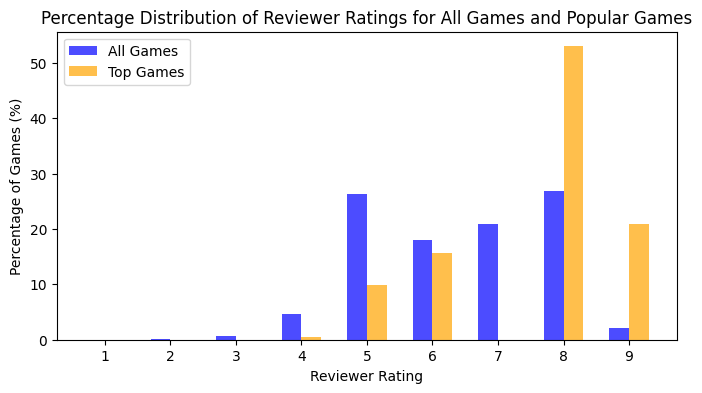

In [ ]:
# A graph giving a better illustration of the above distribution:
client = bigquery.Client(project="ba775-team-b01")

query_master_sheet = """SELECT ID, Reviewer_rating FROM `ba775-team-b01.steam_analysis.master_sheet_popular`"""
query_top_popular_games = """SELECT ID, Reviewer_rating FROM `ba775-team-b01.steam_analysis.top_popular_games`"""
df_master_sheet = client.query(query_master_sheet).to_dataframe()
df_top_popular_games = client.query(query_top_popular_games).to_dataframe()

all_games_distribution = df_master_sheet['Reviewer_rating'].value_counts(normalize=True).sort_index() * 100
top_games_distribution = df_top_popular_games['Reviewer_rating'].value_counts(normalize=True).sort_index() * 100

ratings = sorted(set(all_games_distribution.index).union(set(top_games_distribution.index)))
all_games_percentages = [all_games_distribution.get(rating, 0) for rating in ratings]
top_games_percentages = [top_games_distribution.get(rating, 0) for rating in ratings]

plt.figure(figsize=(8, 4))
plt.bar([r - 0.15 for r in ratings], all_games_percentages, width=0.3, label='All Games', color='blue', alpha=0.7)
plt.bar([r + 0.15 for r in ratings], top_games_percentages, width=0.3, label='Top Games', color='orange', alpha=0.7)
plt.xlabel('Reviewer Rating')
plt.ylabel('Percentage of Games (%)')
plt.title('Percentage Distribution of Reviewer Ratings for All Games and Popular Games')
plt.xticks(ratings)
plt.legend()
plt.show()

**Q12. "Higher Reputation" = "Better Performance" ?**

To better study the characteristics of games with distinct reviews, we decided to divide games into three groups:

1. High reputation: games with reviewer ratings of 8 or 9.
2. Medium reputation: games with reviewer ratings of 6 or 7.
3. Low reputation: games with reviewer ratings of 5 or less.

Based on the distribution graph shown above, this standard ensures each reputation group has sufficient samples for our study. This reduces the impact of outliers when calculating averages. First, we display the average owners, average playtime, and average peak CCU to illustrate the general trends of the three groups.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH ReputationGroups AS (
    SELECT
        Name,
        CASE
            WHEN Reviewer_rating IN (8, 9) THEN 'High Reputation'
            WHEN Reviewer_rating IN (6, 7) THEN 'Medium Reputation'
            WHEN Reviewer_rating <= 5 THEN 'Low Reputation'
        END AS reputation_group,
        `Average_playtime_forever`,
        `Average_owners`,
        `Median_playtime_forever`,
        `Peak_CCU`,
        `Reviewer_rating`
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
)

SELECT
    reputation_group,
    AVG(Average_playtime_forever) AS avg_playtime,
    FORMAT('%0.f', AVG(Average_owners)) AS avg_owners,
    AVG(Median_playtime_forever) AS avg_median_playtime,
    AVG(Peak_CCU) AS avg_peak_ccu,
    AVG(Reviewer_rating) AS avg_reviewer_rating,
    COUNT(*) AS game_count
FROM ReputationGroups
GROUP BY reputation_group
ORDER BY
    CASE
        WHEN reputation_group = 'High Reputation' THEN 1
        WHEN reputation_group = 'Medium Reputation' THEN 2
        WHEN reputation_group = 'Low Reputation' THEN 3
    END;

Query is running:   0%|          |

Downloading:   0%|          |

reputation_group  avg_playtime avg_owners  avg_median_playtime  \
0    High Reputation    356.600222     346819           274.742038   
1  Medium Reputation    105.880526      75543           101.708249   
2     Low Reputation    122.773203      77302           114.776092   

   avg_peak_ccu  avg_reviewer_rating  game_count  
0    616.449691             8.075186       12622  
1     67.838272             6.537810       16874  
2    103.295847             4.794438       13845

Observations:

1. **Outstanding performance of High Reputation group**: On average, high-reputation games are engaging, widely owned, and maintain a strong, active player base compared to other groups.
2. **Similar performance of Medium and Low Reputation groups**: The two groups' averages did not differ too much. Surprisingly, the Medium Reputation group represents the largest group, yet its average playtime, owners, and peak CCU are all less than the Low Reputation group. The Medium Reputation group might perform worse due to a lack of standout qualities, while Low Reputation games may attract niche audiences or benefit from curiosity-driven engagement despite their flaws.

And then, we can explore the average price, DLC count, achievements, etc., to see what patterns within each group may possibly explain our above observation.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH ReputationGroups AS (
    SELECT
        Name,
        CASE
            WHEN Reviewer_rating IN (8, 9) THEN 'High Reputation'
            WHEN Reviewer_rating IN (6, 7) THEN 'Medium Reputation'
            WHEN Reviewer_rating <= 5 THEN 'Low Reputation'
        END AS reputation_group,
        `Price`,
        `DLC_count`,
        `Achievements`,
        `Reviewer_rating`
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`
)

SELECT
    reputation_group,
    AVG(Price) AS avg_price,
    AVG(DLC_count) AS avg_dlc_count,
    AVG(Achievements) AS avg_achievements,
    AVG(Reviewer_rating) AS avg_reviewer_rating,
    COUNT(*) AS game_count
FROM ReputationGroups
GROUP BY reputation_group
ORDER BY
    CASE
        WHEN reputation_group = 'High Reputation' THEN 1
        WHEN reputation_group = 'Medium Reputation' THEN 2
        WHEN reputation_group = 'Low Reputation' THEN 3
    END;


Query is running:   0%|          |

Downloading:   0%|          |

reputation_group  avg_price  avg_dlc_count  avg_achievements  \
0    High Reputation  11.020370       1.674853         32.653938   
1  Medium Reputation   7.527646       0.446723         23.368022   
2     Low Reputation   7.110828       0.482196         39.637198   

   avg_reviewer_rating  game_count  
0             8.075186       12622  
1             6.537810       16874  
2             4.794438       13845

Observations:

1. **Distinct Number of High Reputation Games**: These games excel in every metric. Their higher DLC count and achievements suggest significant content depth, justifying their higher pricing.

2. **Medium Reputation Games**: Once again, this group shows the worst performance of all three groups. These games have a similar price to the low reputation group, yet their DLC count and achievement numbers are quite similar. They may receive higher ratings because their overall quality (e.g., music, visuals, etc.) is better than that of the low reputation group.

3. **Low Reputation Games**: Despite their poor ratings, these games contain the highest number of achievements and an average DLC count slightly higher than the medium-reputation group. One possible reason for their extremely high number of achievements is that these games may use achievements as incentives to attract gamers, setting the achievement standards relatively easier than those of high- and medium-reputation groups.

Next, we will use the same set of standards to study the top 1% games to see if the pattern persists in popular games.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH ReputationGroups AS (
    SELECT
        Name,
        CASE
            WHEN Reviewer_rating IN (8, 9) THEN 'High Reputation'
            WHEN Reviewer_rating IN (6, 7) THEN 'Medium Reputation'
            WHEN Reviewer_rating <= 5 THEN 'Low Reputation'
        END AS reputation_group,
        `Average_playtime_forever`,
        `Average_owners`,
        `Median_playtime_forever`,
        `Peak_CCU`,
        `Reviewer_rating`
        `Price`,
        `DLC_count`,
        `Achievements`,
        `Reviewer_rating`
    FROM `ba775-team-b01.steam_analysis.top_popular_games`
)

SELECT
    reputation_group,
    AVG(Average_playtime_forever) AS avg_playtime,
    FORMAT('%0.f', AVG(Average_owners)) AS avg_owners,
    AVG(Median_playtime_forever) AS avg_median_playtime,
    AVG(Peak_CCU) AS avg_peak_ccu,
    AVG(Price) AS avg_price,
    AVG(DLC_count) AS avg_dlc_count,
    AVG(Achievements) AS avg_achievements,
    AVG(Reviewer_rating) AS avg_reviewer_rating,
    COUNT(*) AS game_count
FROM ReputationGroups
GROUP BY reputation_group
ORDER BY
    CASE
        WHEN reputation_group = 'High Reputation' THEN 1
        WHEN reputation_group = 'Medium Reputation' THEN 2
        WHEN reputation_group = 'Low Reputation' THEN 3
    END;


Query is running:   0%|          |

Downloading:   0%|          |

reputation_group  avg_playtime avg_owners  avg_median_playtime  \
0    High Reputation   4147.429907    7574953          2314.342679   
1  Medium Reputation   8779.735294    7066912          8747.867647   
2     Low Reputation   9994.888889    5873444          8361.577778   

   avg_peak_ccu  avg_price  avg_dlc_count  avg_achievements  \
0  19603.769470   8.283489       8.224299         71.700935   
1  11055.720588   6.000000       4.573529         57.102941   
2  21528.333333   4.955556       3.155556         39.288889   

   avg_reviewer_rating  game_count  
0             8.283489         321  
1             6.000000          68  
2             4.955556          45

Observations:

1. **Overall Trend**: As reputation decreases, average playtime increases, while average price, DLC count, and achievements decrease. This indicates that higher-reputation games generally offer more extensive content, yet this content depth is not reflected in gamers' playtime. This could partially be due to the larger sample size of high-reputation popular games.

2. **Medium-Reputation Popular Games**: This group shows unexpectedly high engagement, surpassing even high-reputation games in playtime. However, they remain weaker in peak CCU, suggesting a less competitive multiplayer environment.

3. **Low-Reputation Popular Games**: These games display very high playtime and peak CCU, indicating a strong multiplayer or community-driven environment. The low ratings of this group could possibly be caused by unsatisfying collaboration or competition environments rather than the quality of the games themselves.

Next, we aim to test our hypothesis regarding the low reputation group: Is their popularity and low rating caused by an unsatisfying multiplayer experience? To investigate, we will query the number of occurrences of 'single-player' and 'multi-player' in game categories. A game can have both single-player and multi-player tags.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH LowReputationPopularGames AS (
    SELECT
        Name,
        ID,
        Categories
    FROM `ba775-team-b01.steam_analysis.top_popular_games`
    WHERE Reviewer_rating <= 5
)

SELECT
    COUNT(*) AS total_game_count, -- Total number of games
    SUM(CASE WHEN LOWER(Categories) LIKE '%single-player%' THEN 1 ELSE 0 END) AS single_player_count,
    SUM(CASE WHEN LOWER(Categories) LIKE '%multi-player%' THEN 1 ELSE 0 END) AS multi_player_count
FROM LowReputationPopularGames;


Query is running:   0%|          |

Downloading:   0%|          |

total_game_count  single_player_count  multi_player_count
0                45                   27                  35

From the above output, we can see that 35/45 (77.78%) popular yet low-reputation games have multiplayer elements. Therefore, our hypothesis can be partially testified. The ultimate reason for their low reputation and high popularity may be complex and not fully covered by our dataset, but our study serves as a good starting point for further investigation.

Overall, high-reputation games in both the total and popular game pools stand out for their strong player engagement, larger player bases, and more content like DLCs and achievements. However, their deeper content isn’t always reflected in playtime, which could be due to their larger sample size. Medium-reputation games in the popular pool show surprising results, with higher playtime but weaker multiplayer appeal, suggesting they attract players looking for solo experiences. Low-reputation games, despite poor ratings, perform well in playtime and peak CCU, likely due to strong community-driven or multiplayer environments.

**Suggestions**: Developers should focus on improving multiplayer experiences and addressing player frustrations in low-reputation games. For medium-reputation games, adding standout features and enhancing their competitive appeal could help. High-reputation games should better connect their rich content to player engagement by improving incentives for extended playtime, like deeper challenges or events. Publishers should promote high-reputation games as premium experiences while leveraging the niche appeal of low-reputation games to targeted audiences.

### **Part 6. Stakeholders of Game**

After the analysis of games related features and players review, finally, let's have a look at the game market's stakeholders, that is, Developers and Publishers.

Let's make a guess: some Developers and Publishers are better at creating popular games than others. To test this hypothesis, we'll identify stakeholders behind these successful games and analyze their performance.

**Q13. Who are the Top 10 Developer & Publishers in the gaming industry?**

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
    'All Games' AS Category,
    COUNT(DISTINCT Developers) AS Developers_quantity,
    COUNT(DISTINCT Publishers) AS Publishers_quantity
FROM `ba775-team-b01.steam_analysis.master_sheet_popular`

UNION ALL

SELECT
    'Top 1% Popular Games' AS Category,
    COUNT(DISTINCT Developers) AS Developers_quantity,
    COUNT(DISTINCT Publishers) AS Publishers_quantity
FROM `ba775-team-b01.steam_analysis.top_popular_games`;

Query is running:   0%|          |

Downloading:   0%|          |

Category  Developers_quantity  Publishers_quantity
0  Top 1% Popular Games                  323                  247
1             All Games                26307                21560

Based on the data, there're more than twenty thousand of developers and publishers in the industry, but only about 1.2% of developers (323 out of 26,307) and 1.1% of publishers (247 out of 21,560) are owning the industry's top 1% games. This indicates that achieving popularity is highly challenging and competitive in the gaming market. The fact that such a small proportion of developers and publishers contribute to the most popular titles is worth studying. Understanding what sets these top performers apart could provide valuable insights into how others can enhance their competitiveness in this industry.

In [ ]:
%%bigquery --project=ba775-team-b01
# Checking the Top Developers from the overall industry, including popularity
WITH master_data AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS master_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_master
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|LTD|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Developer
),

popular_data AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS popular_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popular
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|LTD|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Developer
)

SELECT
    master_data.Developer,
    master_data.total_popularity,
    master_data.master_num_games,
    master_data.total_owners,
    master_data.rank_in_master,
    popular_data.rank_in_popular,
FROM master_data
LEFT JOIN popular_data
ON master_data.Developer = popular_data.Developer
ORDER BY master_data.total_popularity DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

Developer  total_popularity  master_num_games  \
0                      Valve        243.673153                29   
1  Hidden Path Entertainment         73.619219                 4   
2                    KRAFTON         37.477082                 3   
3           Ubisoft Montreal         32.535467                31   
4                 CAPCOM Co.         30.657378                30   
5          Facepunch Studios         30.608098                 5   
6         Avalanche Software         27.581901                 9   
7             Rockstar North         22.573833                 5   
8       KOEI TECMO GAMES CO.         22.181198                96   
9               Amazon Games         21.878703                 1   

   total_owners  rank_in_master  rank_in_popular  
0   557000000.0               1                1  
1    83600000.0               2                2  
2    75825000.0               3                3  
3    75820000.0               4                6  
4    51260000.0               5                7  
5    70120000.0               6                4  
6     8435000.0               7                5  
7    40350000.0               8                8  
8    16765000.0               9               46  
9    75000000.0              10                9

In [ ]:
%%bigquery --project=ba775-team-b01
# Checking the Top Developers from the popular games pool
WITH popular_data AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS popular_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popular
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|LTD|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Developer
),

master_data AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS master_num_games,
        SUM(`Average_owners`) AS total_owners,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_master
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|LTD|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Developer
)

SELECT
    popular_data.Developer,
    popular_data.total_popularity,
    popular_data.popular_num_games,
    popular_data.total_owners,
    popular_data.rank_in_popular,
    master_data.rank_in_master
FROM popular_data
LEFT JOIN master_data
ON popular_data.Developer = master_data.Developer
ORDER BY popular_data.total_popularity DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Developer  total_popularity  popular_num_games  \
0                      Valve        238.896920                 23   
1  Hidden Path Entertainment         73.193782                  2   
2                    KRAFTON         37.219643                  1   
3          Facepunch Studios         30.544445                  2   
4         Avalanche Software         27.190883                  1   
5           Ubisoft Montreal         27.174870                  9   
6                 CAPCOM Co.         23.862673                  8   
7             Rockstar North         22.044646                  2   
8               Amazon Games         21.878703                  1   
9      Respawn Entertainment         19.895532                  2   

   total_owners  rank_in_popular  rank_in_master  
0   542000000.0                1               1  
1    82500000.0                2               2  
2    75000000.0                3               3  
3    70000000.0                4               6  
4     7500000.0                5               7  
5    63000000.0                6               4  
6    34860000.0                7               5  
7    38500000.0                8               8  
8    75000000.0                9              10  
9    38500000.0               10              11

Here're our key findings:

* **Stable Positions of Valve, Hidden Path Entertainment, and KRAFTON:**
Valve, Hidden Path Entertainment, and KRAFTON consistently rank in the top three across both all games and the popular games lists, showcasing their strong influence and competitiveness in the gaming industry. For example, titles like "Dota 2" and "PUBG" have helped these companies remain at the top, receiving widespread acclaim from players.

* **Challenges of KOEI TECMO GAMES CO. in Balancing Quantity and Quality:**
KOEI TECMO GAMES CO. ranks 9th in the overall game list (master_num_games), but drops significantly to 46th in the popular games ranking (rank_in_popular). This indicates that while KOEI TECMO GAMES CO. has developed numerous titles, many have not achieved significant market popularity.

* **Amazon Games' "Few but Quality" Strategy:**
Amazon Games has managed to maintain a high position in the rankings with just one game -- 'New World', reflecting the success of their strategy of focusing on a single high-quality title.

* **Facepunch Studios and Amazon Games' "Small but Refined" Strategy:** Both Facepunch Studios and Amazon Games have shown somewhat improvement in their popular game rankings compared to their overall game production ranks. Facepunch Studios ranks 6th in the overall list but climbs to 4th in the popular games ranking, while Amazon Games moves from 10th to 9th. This indicates a successful "small but refined" approach where they focus on creating fewer games, but each with a strong appeal and high quality. Games like "Rust" (Facepunch Studios) and "New World" (Amazon Games) exemplify their strategy of focusing on quality over quantity.

In [ ]:
%%bigquery --project=ba775-team-b01
# Checking the Top Publishers from the overall industry and popular games pool
WITH master_data AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS master_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_master
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Publisher
),

popular_data AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS popular_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popular
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Publisher
)

SELECT
    master_data.Publisher,
    master_data.total_popularity,
    master_data.master_num_games,
    master_data.total_owners,
    master_data.rank_in_master,
    popular_data.rank_in_popular
FROM master_data
LEFT JOIN popular_data
ON master_data.Publisher = popular_data.Publisher
ORDER BY master_data.total_popularity DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Publisher  total_popularity  master_num_games  total_owners  \
0               Valve        264.223789                33   614850000.0   
1     Electronic Arts         86.577201               130   170985000.0   
2             Ubisoft         68.883578               127   164540000.0   
3                SEGA         67.254547               155   136835000.0   
4                  2K         59.840871                87   144125000.0   
5         Square Enix         48.480895               160   109235000.0   
6  Bethesda Softworks         43.694194                54   105710000.0   
7   Xbox Game Studios         41.489117                50   105675000.0   
8        Amazon Games         40.312967                 2   110000000.0   
9             KRAFTON         38.103965                 5    76585000.0   

   rank_in_master  rank_in_popular  
0               1                1  
1               2                2  
2               3                3  
3               4                7  
4               5                4  
5               6               16  
6               7                8  
7               8                9  
8               9                5  
9              10                6

In [ ]:
%%bigquery --project=ba775-team-b01
# Checking the Top Publishers from the popular games pool, including popularity metrics
WITH popular_data AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS popular_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popular
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Publisher
),

master_data AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS master_num_games,
        SUM(`Average_owners`) AS total_owners,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_master
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive)\b')
    GROUP BY Publisher
)

SELECT
    popular_data.Publisher,
    popular_data.total_popularity,
    popular_data.popular_num_games,
    popular_data.total_owners,
    popular_data.rank_in_popular,
    master_data.rank_in_master
FROM popular_data
LEFT JOIN master_data
ON popular_data.Publisher = master_data.Publisher
ORDER BY popular_data.total_popularity DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Publisher  total_popularity  popular_num_games  total_owners  \
0               Valve        259.347708                 26   599500000.0   
1     Electronic Arts         48.972550                 17    95520000.0   
2             Ubisoft         45.354344                 15   115500000.0   
3                  2K         40.397776                 18    97350000.0   
4        Amazon Games         40.312967                  2   110000000.0   
5             KRAFTON         37.219643                  1    75000000.0   
6                SEGA         31.981559                 15    59750000.0   
7  Bethesda Softworks         30.664763                 14    69000000.0   
8   Xbox Game Studios         30.344823                 11    82000000.0   
9  Warner Bros. Games         30.213117                  3    11750000.0   

   rank_in_popular  rank_in_master  
0                1               1  
1                2               2  
2                3               3  
3                4               5  
4                5               9  
5                6              10  
6                7               4  
7                8               7  
8                9               8  
9               10              13

And here're the main conclusions:

* **Valve's Leadership:**  Valve maintains the top spot across both the entire dataset and the popular games subset, demonstrating its stronghold in the gaming industry. Ubisoft also remains consistently in the top three, showcasing their continued success with franchises like "Assassin’s Creed" and "Far Cry" that have strong player bases.

* **Rank Fluctuations for Popularity:**  Both SEGA and Square Enix have seen their rankings drop significantly in the popular games list. Notably, Square Enix has even fallen out of the top ten, indicating that while they have many games, not all of them enjoy wide popularity. Titles like "Final Fantasy" have a niche audience, but some of their newer releases may not have gained the same traction among broader player groups.

* **Ascending Trends for KRAFTON and Amazon Games	:**  The rankings for KRAFTON and Amazon Games have improved significantly in the popular games subset compared to the entire dataset, reflecting their ability to release well-received titles. KRAFTON's flagship title, "PUBG: BATTLEGROUNDS", remains a fan favorite.

* **Slight Improvement for 2K:** 2K's rank improved in the popular games subset, moving from 5th in the overall dataset to 4th among popular games. This suggests that while 2K may not have released as many games as other publishers, a significant number of its games are resonating well with players. This could be attributed to successful titles like the "NBA 2K" series that continue to attract a dedicated player base.

* **Minor Decline for Bethesda Softworks and Xbox Game Studios:** Bethesda Softworks and Xbox Game Studios saw slight declines in their popularity ranks compared to their ranks in the master list. Bethesda dropped from 7th to 8th, and Xbox Game Studios from 6th to 9th. This suggests that while they have notable franchises, some of their newer releases may not be maintaining the momentum needed to stay ahead in the popular games category, pointing to a potential need for refreshed content or new releases to boost their standing.

**Overall Conclusion:**
- **Valve's Unshakeable Dominance:** Valve continues to dominate both the overall game list and the popular games subset, demonstrating their substantial influence and long-term impact on the gaming industry.

- **"Small but Refined" Approach Benefits:** Companies like Amazon Games and Facepunch Studios that focus on producing fewer but higher-quality games tend to maintain or even improve their ranks in popular games lists. Their strategy of focusing on high-impact titles allows them to secure strong market recognition despite a smaller portfolio, showcasing that quality can outweigh sheer volume.

- **Challenges in Maintaining Popularity:** The drop in rankings for companies like KOEI TECMO GAMES CO., Bethesda Softworks, and Xbox Game Studios highlights the challenges faced by companies that produce many games, but fail to maintain consistent quality across their releases. This indicates that while these companies have strong franchises, their broader portfolio may include games that do not achieve similar success, impacting their overall popularity and industry positioning.

**Q14: Which Developer and Publisher has gained the most revenue?**

**Important Note:** Due to dataset limitations, our revenue estimates are based on the average number of game owners and current prices, as we lack detailed data on specific sales volumes and in-game purchases.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH RevenueData AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        ROUND(SUM(Average_owners * Price), 2) AS revenue,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popularity
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Developer
)

SELECT Developer,
FORMAT("%.2f", revenue) AS total_revenue,
total_popularity,
rank_in_popularity
FROM RevenueData
ORDER BY revenue DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

Developer  total_revenue  total_popularity  rank_in_popularity
0         Amazon Games  2999250000.00         21.878703                  11
1                Valve  1990935000.00        243.673153                   1
2     Ubisoft Montreal  1937769050.00         32.535467                   4
3    CREATIVE ASSEMBLY  1753386750.00         17.310115                  18
4    Facepunch Studios  1749824650.00         30.608098                   6
5       CD PROJEKT RED  1621870250.00         17.458828                  17
6           CAPCOM Co.  1392440900.00         30.657378                   5
7     Gearbox Software  1173110850.00         19.727485                  13
8         FromSoftware  1101674250.00         10.987280                  39
9  Relic Entertainment  1023262900.00         13.881433                  27

In [ ]:
%%bigquery --project=ba775-team-b01
WITH RevenueData AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        ROUND(SUM(Average_owners * Price), 2) AS revenue,
        SUM(Popularity) AS total_popularity,
        ROW_NUMBER() OVER (ORDER BY SUM(Popularity) DESC) AS rank_in_popularity
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Publisher
)

SELECT Publisher,
FORMAT("%.2f", revenue) AS total_revenue,
total_popularity,
rank_in_popularity
FROM RevenueData
ORDER BY revenue DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

Publisher  total_revenue  total_popularity  \
0                        SEGA  3730505700.00         67.254547   
1                     Ubisoft  3281757900.00         68.883578   
2  Bandai Namco Entertainment  3047143300.00         24.023479   
3                Amazon Games  2999250000.00         40.312967   
4                          2K  2894283750.00         59.840871   
5             Electronic Arts  2747422150.00         86.577201   
6                       Valve  2452860000.00        264.223789   
7           Xbox Game Studios  2188390750.00         41.489117   
8          Bethesda Softworks  2140203000.00         43.694194   
9         Paradox Interactive  1675611350.00         35.379414   

   rank_in_popularity  
0                   4  
1                   3  
2                  16  
3                   9  
4                   5  
5                   2  
6                   1  
7                   8  
8                   7  
9                  12

*   **Amazon Games' Strong Performance:** Among developers, Amazon Games ranks first with the highest total revenue (close to $3 billion), showcasing its significant market capability in game development. Amazon Games also ranks high among publishers, securing the fourth position, which further demonstrates its comprehensive influence in the gaming industry.
*   **Stability of Valve and Ubisoft:** Valve ranks second as a developer, highlighting its high revenue and popularity in game development. Additionally, Valve also ranks among the top publishers, indicating strong capabilities not only in development but also in publishing and business operations. Similarly, Ubisoft ranks highly as both a publisher and developer, showing stable market presence across multiple areas.
*  **Comparison Between Publisher and Developer Revenues:** Some companies show different performances in publishing and development. For instance, SEGA ranks first in publisher revenue but does not appear in the top ten for developers. This may indicate that SEGA generates more revenue through publishing third-party games rather than developing its own titles.
*   **Independent Developers vs. Major Companies:** Studios like CREATIVE ASSEMBLY and Facepunch Studios also rank in the top ten in terms of developer revenue, demonstrating that even smaller studios can achieve significant success in the market by developing high-quality games. On the other hand, the list of publishers is dominated by major industry players, indicating that larger companies have advantages in game distribution and commercialization.





**Q15: Who has better chance of producing/promoting popular games?**

We want to check which companies can consistently produce popular games by analyzing the popularity_ratio. The popularity_ratio is defined as the proportion of games developed by each developer that are categorized as popular games.

In [ ]:
%%bigquery --project=ba775-team-b01

WITH AllGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    GROUP BY Developer
),

PopularGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    GROUP BY Developer
)

SELECT
    AllGames.Developer,
    AllGames.total_games,
    PopularGames.popular_games,
    FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
FROM AllGames
LEFT JOIN PopularGames
ON AllGames.Developer = PopularGames.Developer
WHERE FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) = '1.00'
ORDER BY popularity_ratio DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Developer  total_games  popular_games popularity_ratio
0             Ant.Karlov            1              1             1.00
1           Axolot Games            1              1             1.00
2           RobTop Games            1              1             1.00
3             Triternion            1              1             1.00
4    Santa Monica Studio            1              1             1.00
..                   ...          ...            ...              ...
128     Warhorse Studios            1              1             1.00
129           KW Studios            1              1             1.00
130     Rockstar Toronto            1              1             1.00
131          Kitka Games            1              1             1.00
132          Motion Twin            1              1             1.00

[133 rows x 4 columns]

Initially, we aimed to identify developers with a popularity ratio of 1.0. The popularity ratio of 1.0 means that every game released by these developers has become popular, indicating strong success in game development. In the chart , we see 133 rows of data where developers have a popularity ratio of 1.0.



In [ ]:
%%bigquery --project=ba775-team-b01

WITH AllGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    GROUP BY Developer
),

PopularGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    GROUP BY Developer
),

PopularDevelopers AS (
    SELECT
        AllGames.Developer,
        AllGames.total_games,
        PopularGames.popular_games,
        FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
    FROM AllGames
    LEFT JOIN PopularGames
    ON AllGames.Developer = PopularGames.Developer
    WHERE FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) = '1.00'
)

SELECT
    total_games,
    COUNT(Developer) AS num_developers
FROM PopularDevelopers
GROUP BY total_games
ORDER BY total_games;


Query is running:   0%|          |

Downloading:   0%|          |

total_games  num_developers
0            1             126
1            2               6
2            3               1

However, we noticed that 126 of these developers only released a single game. While this is an impressive achievement, given the limited number of games, it is challenging to determine if the success was purely based on the game’s inherent quality or due to other factors like timing or chance.

In [ ]:
%%bigquery --project=ba775-team-b01

WITH AllGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Developer
),

PopularGames AS (
    SELECT
        TRIM(DeveloperSplit) AS Developer,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Developers, ',')) AS DeveloperSplit
    WHERE NOT REGEXP_CONTAINS(DeveloperSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Developer
)

SELECT
    AllGames.Developer,
    AllGames.total_games,
    PopularGames.popular_games,
    FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
FROM AllGames
LEFT JOIN PopularGames
ON AllGames.Developer = PopularGames.Developer
WHERE AllGames.total_games >= 10
ORDER BY popularity_ratio DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Developer  total_games  popular_games popularity_ratio
0                       Valve           29             23             0.79
1       Bethesda Game Studios           11              6             0.55
2           CREATIVE ASSEMBLY           16              8             0.50
3          Sports Interactive           11              5             0.45
4           Avalanche Studios           10              4             0.40
5  Paradox Development Studio           17              6             0.35
6             Visual Concepts           15              5             0.33
7                        DICE           12              4             0.33
8            Gearbox Software           20              6             0.30
9            Ubisoft Montreal           31              9             0.29

To obtain a more objective evaluation of a developer's capabilities, we filtered for those who released at least 10 games to identify more mature gaming companies with consistent success records. By applying a threshold of 10 games, we focused on identifying developers that demonstrate stability in their game production capabilities. This approach aims to differentiate between developers who consistently achieve success and those who might have achieved success with only one or two games due to chance.

- When we consider developers with a threshold of games, we see that companies like Valve perform very well in the market. Valve released 29 games, of which 23 became popular, giving it a popularity_ratio of 0.79, demonstrating a very high success rate.

- Other top-performing developers include Bethesda Game Studios, CREATIVE ASSEMBLY, and Sports Interactive, with success rates of 0.55, 0.50, and 0.45, respectively. These companies have released multiple games and achieved success repeatedly, indicating stability in creating popular games.


In [ ]:
%%bigquery --project=ba775-team-b01

WITH AllGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    GROUP BY Publisher
),

PopularGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    GROUP BY Publisher
)

SELECT
    AllGames.Publisher,
    AllGames.total_games,
    PopularGames.popular_games,
    FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
FROM AllGames
LEFT JOIN PopularGames
ON AllGames.Publisher = PopularGames.Publisher
WHERE FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) = '1.00'
ORDER BY popularity_ratio DESC;

Query is running:   0%|          |

Downloading:   0%|          |

Publisher  total_games  popular_games popularity_ratio
0                    Ant.Karlov            1              1             1.00
1                  Axolot Games            2              2             1.00
2                  RobTop Games            1              1             1.00
3                    Triternion            1              1             1.00
4   Kakao Games Europe B.V. (EU            1              1             1.00
..                          ...          ...            ...              ...
89                  VRChat Inc.            1              1             1.00
90             Warhorse Studios            1              1             1.00
91                   KW Studios            1              1             1.00
92                  Kitka Games            1              1             1.00
93                  Motion Twin            1              1             1.00

[94 rows x 4 columns]

First, we identified publishers with a popularity ratio of 1.0, indicating that every game they released became popular. This serves as a starting point to evaluate which publishers have had exceptional success. 94 publishers show such ratio.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH AllGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    GROUP BY Publisher
),

PopularGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    GROUP BY Publisher
),

PopularPublishers AS (
    SELECT
        AllGames.Publisher,
        AllGames.total_games,
        PopularGames.popular_games,
        FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
    FROM AllGames
    LEFT JOIN PopularGames
    ON AllGames.Publisher = PopularGames.Publisher
    WHERE FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) = '1.00'
)

SELECT
    total_games,
    COUNT(Publisher) AS num_publishers
FROM PopularPublishers
GROUP BY total_games
ORDER BY total_games;

Query is running:   0%|          |

Downloading:   0%|          |

total_games  num_publishers
0            1              92
1            2               2

Similarly to developers, we observed that most publishers initially had a popularity ratio of 1.0. This indicates strong success, but to evaluate the publishers' abilities objectively, we need to further refine our analysis by including publishers with a larger portfolio of games.

In [ ]:
%%bigquery --project=ba775-team-b01

WITH AllGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS total_games
    FROM `ba775-team-b01.steam_analysis.master_sheet_popular`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Publisher
),

PopularGames AS (
    SELECT
        TRIM(PublisherSplit) AS Publisher,
        COUNT(DISTINCT ID) AS popular_games
    FROM `ba775-team-b01.steam_analysis.top_popular_games`,
    UNNEST(SPLIT(Publishers, ',')) AS PublisherSplit
    WHERE NOT REGEXP_CONTAINS(PublisherSplit, r'\b(Inc|Ltd|LLC|Limited|Feral Interactive|Aspyr)\b')
    GROUP BY Publisher
)

SELECT
    AllGames.Publisher,
    AllGames.total_games,
    PopularGames.popular_games,
    FORMAT("%.2f", IFNULL(PopularGames.popular_games / AllGames.total_games, 0)) AS popularity_ratio
FROM AllGames
LEFT JOIN PopularGames
ON AllGames.Publisher = PopularGames.Publisher
WHERE AllGames.total_games >= 10
ORDER BY popularity_ratio DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

Publisher  total_games  popular_games popularity_ratio
0                       Valve           33             26             0.79
1     Coffee Stain Publishing           12              5             0.42
2                  CAPCOM Co.           28              8             0.29
3  Bandai Namco Entertainment           18              5             0.28
4          Bethesda Softworks           54             14             0.26
5        Tripwire Interactive           13              3             0.23
6           Xbox Game Studios           50             11             0.22
7                          2K           87             18             0.21
8                    MY.GAMES           10              2             0.20
9              Rockstar Games           21              4             0.19

To better evaluate the capabilities of publishers and identify mature players, we applied a threshold of 10 games. This ensures that we are focusing on publishers with a history of releasing multiple games, rather than basing conclusions on limited releases. By applying this minimum threshold of 10 games, we narrowed down our analysis to identify publishers with consistent success.

- When we considered only publishers that have released at least 10 games, we found that Valve performed particularly well in the market. Valve released 33 games, of which 26 became popular, achieving a popularity_ratio of 0.79, demonstrating an extremely high success rate.
- Other well-performing publishers include Coffee Stain Publishing, CAPCOM Co., and Bandai Namco Entertainment, with success rates of 0.42, 0.29, and 0.28, respectively. These publishers released multiple games and achieved repeated success, indicating a high level of stability in releasing popular games.

### **Part 7. The Emerging Trends**

Finally, after analyzing games and stakeholders from various perspectives, let's shift our focus to a time-series analysis. We aim to examine the performance trends of the gaming industry and popular games over time.

**Q16. Five years later, is it better or worse?**

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
  '2019' AS Year,
  SUM(`2019_owners`)/1000000 AS total_millions_owners,
  FORMAT('%0.2f', SUM(ccu_2019) / COUNT(DISTINCT ID)) AS avg_ccu,
  FORMAT('%0.2f', SUM(Average_playtime_forever_2019) / COUNT(DISTINCT ID)) AS avg_playtime,
  FORMAT('%0.2f', SUM(Median_playtime_forever_2019) / COUNT(DISTINCT ID)) AS median_playtime,
  FORMAT('%0.2f', SUM(`2019_price`) / COUNT(DISTINCT ID)) AS avg_price,
  FORMAT('%0.2f', SUM(Positive_reviews_2019) / (SUM(Positive_reviews_2019) + SUM(Negative_reviews_2019))) AS positive_ratio
FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`
UNION ALL
SELECT
  '2024' AS Year,
  SUM(`2024_owners`)/1000000 AS total_millions_owners,
  FORMAT('%0.2f', SUM(ccu_2024) / COUNT(DISTINCT ID)) AS avg_ccu,
  FORMAT('%0.2f', SUM(Average_playtime_forever_2024) / COUNT(DISTINCT ID)) AS avg_playtime,
  FORMAT('%0.2f', SUM(Median_playtime_forever_2024) / COUNT(DISTINCT ID)) AS median_playtime,
  FORMAT('%0.2f', SUM(`2024_price`) / COUNT(DISTINCT ID)) AS avg_price,
  FORMAT('%0.2f', SUM(Positive_reviews_2024) / (SUM(Positive_reviews_2024) + SUM(Negative_reviews_2024))) AS positive_ratio
FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`;

Query is running:   0%|          |

Downloading:   0%|          |

Year  total_millions_owners avg_ccu avg_playtime median_playtime avg_price  \
0  2024               5230.735  204.72       260.60          211.23      7.41   
1  2019               3630.745  183.46       175.61          171.21      8.20   

  positive_ratio  
0           0.86  
1           0.83

We compared the steamspy data from 2024 and 2019, and we can find out the following insights.

**Thriving Growth in the Gaming Industry:**

- **Significant Player Base Expansion**: The number of players grew from 3.63 billion in 2019 to 5.23 billion in 2024. This remarkable growth highlights an increased market penetration and a broader audience for gaming, indicating that more individuals are becoming engaged with gaming experiences.

- **Increased Player Engagement**: Average playtime saw a notable rise from 175.61 hours in 2019 to 260.60 hours in 2024. This surge in playtime points to players not only being more numerous but also increasingly committed to spending time on games, showing deeper engagement with gaming content.

**Driving Factors Behind Growth:**

- **Price Reduction and Accessibility**: One of the primary reasons behind this positive trend is the average price drop of games, from 8.20 USD in 2019 to 7.41 USD in 2024. This price reduction made games more affordable to a larger audience, thus encouraging new players to join and increasing overall market coverage.

- **Enhanced Player Satisfaction**: Alongside price accessibility, the quality of the gaming experience has also improved. The positive review ratio increased from 0.83 in 2019 to 0.86 in 2024, indicating growing satisfaction with game content. Improved satisfaction has likely contributed to longer playtimes, as players derive more value and enjoyment from the games they play.



The gaming industry is getting better, but are those popular games also getting better? Let's have a look.

**Q17. For those Popular games, are they becoming more popular compared to 5 years ago?**


In [ ]:
%%bigquery --project=ba775-team-b01
WITH PopularGames AS (
  SELECT DISTINCT ID
  FROM `ba775-team-b01.steam_analysis.top_popular_games`
),
RangeCalculations AS (
  SELECT
    (MAX(`2024_owners`) - MIN(`2019_owners`)) AS Owners_range,
    MIN(`2019_owners`) AS Owners_min,
    (MAX(Total_reviews_2024) - MIN(Total_reviews_2019)) AS Total_reviews_range,
    MIN(Total_reviews_2019) AS Total_reviews_min,
    (MAX(ccu_2024) - MIN(ccu_2019)) AS Peak_CCU_range,
    MIN(ccu_2019) AS Peak_CCU_min,
    (MAX(Average_playtime_forever_2024) - MIN(Average_playtime_forever_2019)) AS Average_playtime_range,
    MIN(Average_playtime_forever_2019) AS Average_playtime_min,
    (MAX(Median_playtime_forever_2024) - MIN(Median_playtime_forever_2019)) AS Median_playtime_range,
    MIN(Median_playtime_forever_2019) AS Median_playtime_min
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`
),
GameTrends2019 AS (
  SELECT
    s.ID,
    0.40 * (s.`2019_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2019 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2019 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2019 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2019 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2019
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GameTrends2024 AS (
  SELECT
    s.ID,
    0.40 * (s.`2024_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2024 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2024 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2024 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2024 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2024
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GamePerformance AS (
  SELECT
    t2019.ID,
    t2019.popularity_2019,
    t2024.popularity_2024,
    CASE
      WHEN t2024.popularity_2024 > t2019.popularity_2019 THEN 'Improving'
      WHEN t2024.popularity_2024 < t2019.popularity_2019 THEN 'Declining'
      ELSE 'Stable'
    END AS performance_trend
  FROM GameTrends2019 AS t2019
  JOIN GameTrends2024 AS t2024 ON t2019.ID = t2024.ID
),
TotalGames AS (
  SELECT COUNT(*) AS total_count FROM GamePerformance
)

SELECT
  performance_trend,
  COUNT(*) AS game_count,
  ROUND(COUNT(*) * 100.0 / (SELECT total_count FROM TotalGames), 2) AS percentage
FROM GamePerformance
GROUP BY performance_trend
ORDER BY game_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

performance_trend  game_count  percentage
0         Improving         310       92.54
1         Declining          25        7.46

**Overall Trends**: Between 2019 and 2024, the majority of these popular games experienced significant performance improvements, which means, they are gaining more popularity.

Data shows that 310 games (92.54%) saw growth in popularity, reviews, and player activity. This indicates a positive overall trend in the gaming industry over the past five years.

However, 25 games (7.46%) experienced declines in performance, reflecting challenges in maintaining player interest in an increasingly competitive market.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH PopularGames AS (
  SELECT DISTINCT ID
  FROM `ba775-team-b01.steam_analysis.top_popular_games`
),
RangeCalculations AS (
  SELECT
    (MAX(`2024_owners`) - MIN(`2019_owners`)) AS Owners_range,
    MIN(`2019_owners`) AS Owners_min,
    (MAX(Total_reviews_2024) - MIN(Total_reviews_2019)) AS Total_reviews_range,
    MIN(Total_reviews_2019) AS Total_reviews_min,
    (MAX(ccu_2024) - MIN(ccu_2019)) AS Peak_CCU_range,
    MIN(ccu_2019) AS Peak_CCU_min,
    (MAX(Average_playtime_forever_2024) - MIN(Average_playtime_forever_2019)) AS Average_playtime_range,
    MIN(Average_playtime_forever_2019) AS Average_playtime_min,
    (MAX(Median_playtime_forever_2024) - MIN(Median_playtime_forever_2019)) AS Median_playtime_range,
    MIN(Median_playtime_forever_2019) AS Median_playtime_min
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`
),
GameTrends2019 AS (
  SELECT
    s.ID,
    s.Name,
    0.40 * (s.`2019_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2019 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2019 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2019 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2019 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2019
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GameTrends2024 AS (
  SELECT
    s.ID,
    s.Name,
    0.40 * (s.`2024_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2024 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2024 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2024 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2024 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2024
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GamePerformance AS (
  SELECT
    t2019.Name,
    t2019.popularity_2019,
    t2024.popularity_2024,
    ROUND(
      CASE
        WHEN t2019.popularity_2019 = 0 THEN NULL
        ELSE (t2024.popularity_2024 - t2019.popularity_2019) * 100 / t2019.popularity_2019
      END,
      2
    ) AS percentage_change,
    CASE
      WHEN t2024.popularity_2024 > t2019.popularity_2019 THEN 'Improving'
      WHEN t2024.popularity_2024 < t2019.popularity_2019 THEN 'Declining'
      ELSE 'Stable'
    END AS performance_trend
  FROM GameTrends2019 AS t2019
  JOIN GameTrends2024 AS t2024 ON t2019.ID = t2024.ID
)
SELECT
  Name,
  popularity_2024,
  popularity_2019,
  percentage_change
FROM GamePerformance
WHERE performance_trend = 'Improving'
ORDER BY percentage_change DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Name  popularity_2024  popularity_2019  \
0                   When In Rome         0.013555     1.913920e-07   
1                       Among Us         0.121158     2.717767e-06   
2                Defense Clicker         0.077910     3.023994e-06   
3   Brigade E5: New Jagged Union         0.043773     3.017442e-06   
4  Rugby Union Team Manager 2017         0.021929     3.330222e-06   
5             WARRIORS ALL-STARS         0.071358     1.856400e-05   
6          时之回廊/Corridor of time         0.034205     2.091760e-05   
7                        Revhead         0.015078     1.012085e-05   
8                Sisyphus Reborn         0.094886     9.572115e-05   
9                         Relive         0.095111     1.862775e-04   

   percentage_change  
0         7082080.26  
1         4457892.72  
2         2576293.25  
3         1450554.03  
4          658394.35  
5          384287.80  
6          163424.49  
7          148882.35  
8           99027.08  
9           50958.61

**Top 10 Popular Games with Biggest Improved Performance:**

These games may not be the hottest right now, but their popularity has changed dramatically compared to five years ago.
**Among Us** is one of the most notable success stories. The game became a global sensation during the pandemic, thanks to its unique social gameplay and widespread promotion through live streaming. Similarly, **When In Rome** demonstrated impressive growth, driven by consistent content updates and effective marketing. Other games, such as **Defense Clicker** and **Brigade E5: New Jagged Union**, also achieved significant improvements through innovative gameplay and strategic market efforts.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH PopularGames AS (
  SELECT DISTINCT ID
  FROM `ba775-team-b01.steam_analysis.top_popular_games`
),
RangeCalculations AS (
  SELECT
    (MAX(`2024_owners`) - MIN(`2019_owners`)) AS Owners_range,
    MIN(`2019_owners`) AS Owners_min,
    (MAX(Total_reviews_2024) - MIN(Total_reviews_2019)) AS Total_reviews_range,
    MIN(Total_reviews_2019) AS Total_reviews_min,
    (MAX(ccu_2024) - MIN(ccu_2019)) AS Peak_CCU_range,
    MIN(ccu_2019) AS Peak_CCU_min,
    (MAX(Average_playtime_forever_2024) - MIN(Average_playtime_forever_2019)) AS Average_playtime_range,
    MIN(Average_playtime_forever_2019) AS Average_playtime_min,
    (MAX(Median_playtime_forever_2024) - MIN(Median_playtime_forever_2019)) AS Median_playtime_range,
    MIN(Median_playtime_forever_2019) AS Median_playtime_min
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`
),
GameTrends2019 AS (
  SELECT
    s.ID,
    s.Name,
    0.40 * (s.`2019_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2019 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2019 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2019 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2019 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2019
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GameTrends2024 AS (
  SELECT
    s.ID,
    s.Name,
    0.40 * (s.`2024_owners` - r.Owners_min) / r.Owners_range +
    0.25 * (s.Total_reviews_2024 - r.Total_reviews_min) / r.Total_reviews_range +
    0.25 * (s.ccu_2024 - r.Peak_CCU_min) / r.Peak_CCU_range +
    0.05 * (s.Average_playtime_forever_2024 - r.Average_playtime_min) / r.Average_playtime_range +
    0.05 * (s.Median_playtime_forever_2024 - r.Median_playtime_min) / r.Median_playtime_range AS popularity_2024
  FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS s
  CROSS JOIN RangeCalculations AS r
  WHERE s.ID IN (SELECT ID FROM PopularGames)
),
GamePerformance AS (
  SELECT
    t2019.Name,
    t2019.popularity_2019,
    t2024.popularity_2024,
    ROUND(
      CASE
        WHEN t2019.popularity_2019 = 0 THEN NULL
        ELSE (t2024.popularity_2024 - t2019.popularity_2019) * 100 / t2019.popularity_2019
      END,
      2
    ) AS percentage_change,
    CASE
      WHEN t2024.popularity_2024 > t2019.popularity_2019 THEN 'Improving'
      WHEN t2024.popularity_2024 < t2019.popularity_2019 THEN 'Declining'
      ELSE 'Stable'
    END AS performance_trend
  FROM GameTrends2019 AS t2019
  JOIN GameTrends2024 AS t2024 ON t2019.ID = t2024.ID
)
SELECT
  Name,
  popularity_2024,
  popularity_2019,
  percentage_change
FROM GamePerformance
WHERE performance_trend = 'Declining'
ORDER BY percentage_change
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Name  popularity_2024  popularity_2019  \
0   Z1 Battle Royale: Test Server         0.020497         0.040457   
1                  Clicker Heroes         0.015387         0.029358   
2  Counter-Strike: Condition Zero         0.021929         0.040981   
3                     Left 4 Dead         0.012084         0.021508   
4                    APB Reloaded         0.013838         0.024047   
5     The Elder Scrolls V: Skyrim         0.038522         0.059090   
6             PUBG: BATTLEGROUNDS         0.378954         0.479518   
7     Arma 2: Operation Arrowhead         0.013225         0.016308   
8                       Survarium         0.011902         0.014543   
9                     The Sims™ 3         0.013182         0.014518   

   percentage_change  
0             -49.34  
1             -47.59  
2             -46.49  
3             -43.82  
4             -42.46  
5             -34.81  
6             -20.97  
7             -18.91  
8             -18.16  
9              -9.20

**Top 10 Popular Games with Biggest Declined Performance:**

Not all games will become more famous as time goes by, and even once popular games may experience notable declines over the same period. For example, **Z1 Battle Royale: Test Server** saw a 49.34% drop in popularity, likely due to delayed content updates and stiff competition from games like Fortnite. **Counter-Strike: Condition Zero** experienced a 46.49% decline, primarily due to outdated technology and a lack of innovation, which failed to attract newer generations of players. Other games, such as **Clicker Heroes** and **Left 4 Dead**, also showed similar downward trends, reflecting the challenges faced by older titles in retaining player interest.

**Q18. For those Popular games, are they gaining better reputation compared to 5 years ago?**

In this section, we will compare the reputation of the same games in 2019 and 2024, with a specific focus on popular games.

**Important Note**: Due to limitations that we do not have reviewer rating data for both years to compare directly, we will use the positive review ratio, calculated as (number of positive reviews) / (number of total reviews), as our key comparison metric.


Before diving into popular games, we want to have better understanding of the overall change in games reviews firstly.

In [ ]:
%%bigquery --project=ba775-team-b01
WITH Metrics AS (
    SELECT
        'Total Reviews' AS metric,
        AVG(`Total_reviews_2019`) AS avg_2019,
        AVG(`Total_reviews_2024`) AS avg_2024,
        ((AVG(`Total_reviews_2024`) - AVG(`Total_reviews_2019`)) * 100.0 / AVG(`Total_reviews_2019`)) AS percent_change_avg,
        1 AS sort_order
    FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`

    UNION ALL

    SELECT
        'Positive Reviews' AS metric,
        AVG(`Positive_reviews_2019`) AS avg_2019,
        AVG(`Positive_reviews_2024`) AS avg_2024,
        ((AVG(`Positive_reviews_2024`) - AVG(`Positive_reviews_2019`)) * 100.0 / AVG(`Positive_reviews_2019`)) AS percent_change_avg,
        2 AS sort_order
    FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`

    UNION ALL

    SELECT
        'Negative Reviews' AS metric,
        AVG(`Negative_reviews_2019`) AS avg_2019,
        AVG(`Negative_reviews_2024`) AS avg_2024,
        ((AVG(`Negative_reviews_2024`) - AVG(`Negative_reviews_2019`)) * 100.0 / AVG(`Negative_reviews_2019`)) AS percent_change_avg,
        3 AS sort_order
    FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`

    UNION ALL

    SELECT
        'Positive Review Ratio' AS metric,
        AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS avg_2019,
        AVG(`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) AS avg_2024,
        ((AVG(`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) -
          AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) * 100.0 /
          AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) AS percent_change_avg,
        4 AS sort_order
    FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019`
)

SELECT metric, avg_2019, avg_2024, percent_change_avg
FROM Metrics
ORDER BY sort_order;


Query is running:   0%|          |

Downloading:   0%|          |

metric     avg_2019     avg_2024  percent_change_avg
0          Total Reviews  1494.833730  3200.417831          114.098583
1       Positive Reviews  1236.164158  2763.437604          123.549404
2       Negative Reviews   258.669573   436.980227           68.933757
3  Positive Review Ratio     0.730426     0.718215           -1.671809

Observations:
- **Growth in Player Engagement**: Total reviews has grown significantly in 2024, suggesting a growth in active game player base.

- **Marginal Decline in Positive Review Ratio**: While the overall positive review ratio has improved in numbers, the average decline (-1.67%) suggests the underperformance of some individual games may have draged down the average.

Next, we will take a look of the change within popular games.


In [ ]:
#Create a new table of all top games with 2019 and 2024's review data
%%bigquery --project=ba775-team-b01
CREATE OR REPLACE TABLE `ba775-team-b01.steam_analysis.popular_games_comparison` AS
SELECT
    a.*
FROM `ba775-team-b01.steam_analysis.steamspy_2024_VS_2019` AS a
INNER JOIN `ba775-team-b01.steam_analysis.top_popular_games` AS b
ON a.ID = b.ID;


Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery --project=ba775-team-b01
WITH Metrics AS (
    SELECT
        'Total Reviews' AS metric,
        AVG(`Total_reviews_2019`) AS avg_2019,
        AVG(`Total_reviews_2024`) AS avg_2024,
        ((AVG(`Total_reviews_2024`) - AVG(`Total_reviews_2019`)) * 100.0 / AVG(`Total_reviews_2019`)) AS percent_change_avg,
        1 AS sort_order
    FROM `ba775-team-b01.steam_analysis.popular_games_comparison`

    UNION ALL

    SELECT
        'Positive Reviews' AS metric,
        AVG(`Positive_reviews_2019`) AS avg_2019,
        AVG(`Positive_reviews_2024`) AS avg_2024,
        ((AVG(`Positive_reviews_2024`) - AVG(`Positive_reviews_2019`)) * 100.0 / AVG(`Positive_reviews_2019`)) AS percent_change_avg,
        2 AS sort_order
    FROM `ba775-team-b01.steam_analysis.popular_games_comparison`

    UNION ALL

    SELECT
        'Negative Reviews' AS metric,
        AVG(`Negative_reviews_2019`) AS avg_2019,
        AVG(`Negative_reviews_2024`) AS avg_2024,
        ((AVG(`Negative_reviews_2024`) - AVG(`Negative_reviews_2019`)) * 100.0 / AVG(`Negative_reviews_2019`)) AS percent_change_avg,
        3 AS sort_order
    FROM `ba775-team-b01.steam_analysis.popular_games_comparison`

    UNION ALL

    SELECT
        'Positive Review Ratio' AS metric,
        AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS avg_2019,
        AVG(`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) AS avg_2024,
        ((AVG(`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) -
          AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) * 100.0 /
          AVG(`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) AS percent_change_avg,
        4 AS sort_order
    FROM `ba775-team-b01.steam_analysis.popular_games_comparison`
)

SELECT metric, avg_2019, avg_2024, percent_change_avg
FROM Metrics
ORDER BY sort_order;


Query is running:   0%|          |

Downloading:   0%|          |

metric      avg_2019       avg_2024  percent_change_avg
0          Total Reviews  61171.546269  142808.722388          133.456126
1       Positive Reviews  51411.719403  125212.000000          143.547583
2       Negative Reviews   9759.826866   17596.722388           80.297485
3  Positive Review Ratio      0.826568       0.857581            3.752076

Observation:

1. **Steady Growth in Ratings**: Popular games experienced an average growth of 133% in total reviews, with positive reviews growing even more impressively by 144%, indicating that players were highly satisfied with these games over the years. Negative reviews also increased by 80%, but the growth rate is much lower. Overall, the positive review ratio increased slightly by 3.75%, reflecting steady improvement in player satisfaction, even as the number of reviews grew significantly. This shows that popular games not only maintained their reputation but also significantly expanded their appeal.

2. **Popular Games Outperform Total Games**: Popular games showed a higher growth rate across all metrics, including negative reviews. While the total games' positive review ratio decreased slightly, popular games experienced steady growth, indicating their ability to consistently engage and satisfy players.

Next, let's take a closer look at popular games. How many are improving their reputation over time? Are there any that have seen their reputation decline after five years?

In [ ]:
%%bigquery --project=ba775-team-b01
WITH PositiveReviewChange AS (
    SELECT
        Name,
        ID,
        (Positive_reviews_2019 * 1.0 / NULLIF(Total_reviews_2019, 0)) AS positive_ratio_2019,
        (Positive_reviews_2024 * 1.0 / NULLIF(Total_reviews_2024, 0)) AS positive_ratio_2024,
        ((Positive_reviews_2024 * 1.0 / NULLIF(Total_reviews_2024, 0)) -
         (Positive_reviews_2019 * 1.0 / NULLIF(Total_reviews_2019, 0))) AS positive_ratio_change
    FROM `ba775-team-b01.steam_analysis.popular_games_comparison`
)

SELECT
    CASE
        WHEN positive_ratio_change > 0 THEN 'Improving'
        WHEN positive_ratio_change < 0 THEN 'Declining'
        ELSE 'No Change'
    END AS change_type,
    COUNT(*) AS game_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM PositiveReviewChange), 2) AS percentage
FROM PositiveReviewChange
GROUP BY change_type
ORDER BY game_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

change_type  game_count  percentage
0   Improving         261       77.91
1   Declining          72       21.49
2   No Change           2        0.60

From this we can see that, most popular games (77.91%) saw increases in their positive reviews. Next, we will look at the specific games that earned the most positive change.

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
    Name,
    (`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) AS positive_ratio_2024,
    (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS positive_ratio_2019,
    ((`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) -
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) * 100.0 /
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS positive_ratio_percent_change
FROM `ba775-team-b01.steam_analysis.popular_games_comparison`
ORDER BY positive_ratio_percent_change DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Name  positive_ratio_2024  positive_ratio_2019  \
0                   The Crew™ 2             0.806061             0.507173   
1                   Bloons TD 6             0.975190             0.672751   
2             Conqueror's Blade             0.754763             0.524291   
3                  No Man's Sky             0.761010             0.529000   
4                 Albion Online             0.797790             0.559006   
5                      NBA 2K19             0.390908             0.276828   
6  Call of Duty®: Black Ops III             0.803486             0.610230   
7              Street Fighter V             0.649603             0.494106   
8             theHunter Classic             0.546375             0.426182   
9          BioShock™ Remastered             0.803121             0.628186   

   positive_ratio_percent_change  
0                      58.932087  
1                      44.955571  
2                      43.958574  
3                      43.858282  
4                      42.715693  
5                      41.209776  
6                      31.669346  
7                      31.470337  
8                      28.202361  
9                      27.847782

The following are popular games that perform the worst in terms of reviews in 2024 than they were in 2019:

In [ ]:
%%bigquery --project=ba775-team-b01
SELECT
    Name,
    (`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) AS positive_ratio_2024,
    (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS positive_ratio_2019,
    ((`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) -
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) * 100.0 /
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) AS positive_ratio_percent_change
FROM `ba775-team-b01.steam_analysis.popular_games_comparison`
WHERE
    (`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) IS NOT NULL AND
    (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) IS NOT NULL AND
    ((`Positive_reviews_2024` * 1.0 / NULLIF(`Total_reviews_2024`, 0)) -
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0))) * 100.0 /
     (`Positive_reviews_2019` * 1.0 / NULLIF(`Total_reviews_2019`, 0)) IS NOT NULL
ORDER BY positive_ratio_percent_change
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

Name  positive_ratio_2024  positive_ratio_2019  \
0                 Hold your houses             0.279070             0.416667   
1          Wolcen: Lords of Mayhem             0.561908             0.680919   
2                 Clicker Heroes 2             0.587510             0.682645   
3         太吾绘卷 The Scroll Of Taiwu             0.766075             0.887536   
4            时之回廊/Corridor of time             0.640684             0.727723   
5  Jagged Alliance 1: Gold Edition             0.787356             0.891566   
6                           VRChat             0.793172             0.885968   
7               WARRIORS ALL-STARS             0.737942             0.789744   
8                     When In Rome             0.750000             0.800000   
9                  Defense Clicker             0.692308             0.734177   

   positive_ratio_percent_change  
0                     -33.023256  
1                     -17.477894  
2                     -13.936240  
3                     -13.685270  
4                     -11.960374  
5                     -11.688413  
6                     -10.473995  
7                      -6.559277  
8                      -6.250000  
9                      -5.702918

The above two lists provide examples for stakeholders to examine more closely. They can analyze the reasons behind their successes and failures. It is especially important to focus on games that experienced significant decreases in their positive review ratio, stakeholders can gain insights into player demands by studying these games with large player bases.

##**Tableau Dashboards**

Link to Tableau Dashboard 1: https://public.tableau.com/app/profile/bei.su/viz/775dash/Dashboard2

Link to Tableau Dashboard 2: https://public.tableau.com/app/profile/zehui.wang6232/viz/BA775Graph-Grace-try/Dashboard2

>  **Tip**: Use the "Year" filter on the first dashboard to explore trends in genre growth rates over time. On the second dashboard, apply the "Popular Games" filter to uncover the differences between all games and popular games.

**Dashboard 1: Gaming Features and Popularity Analysis**

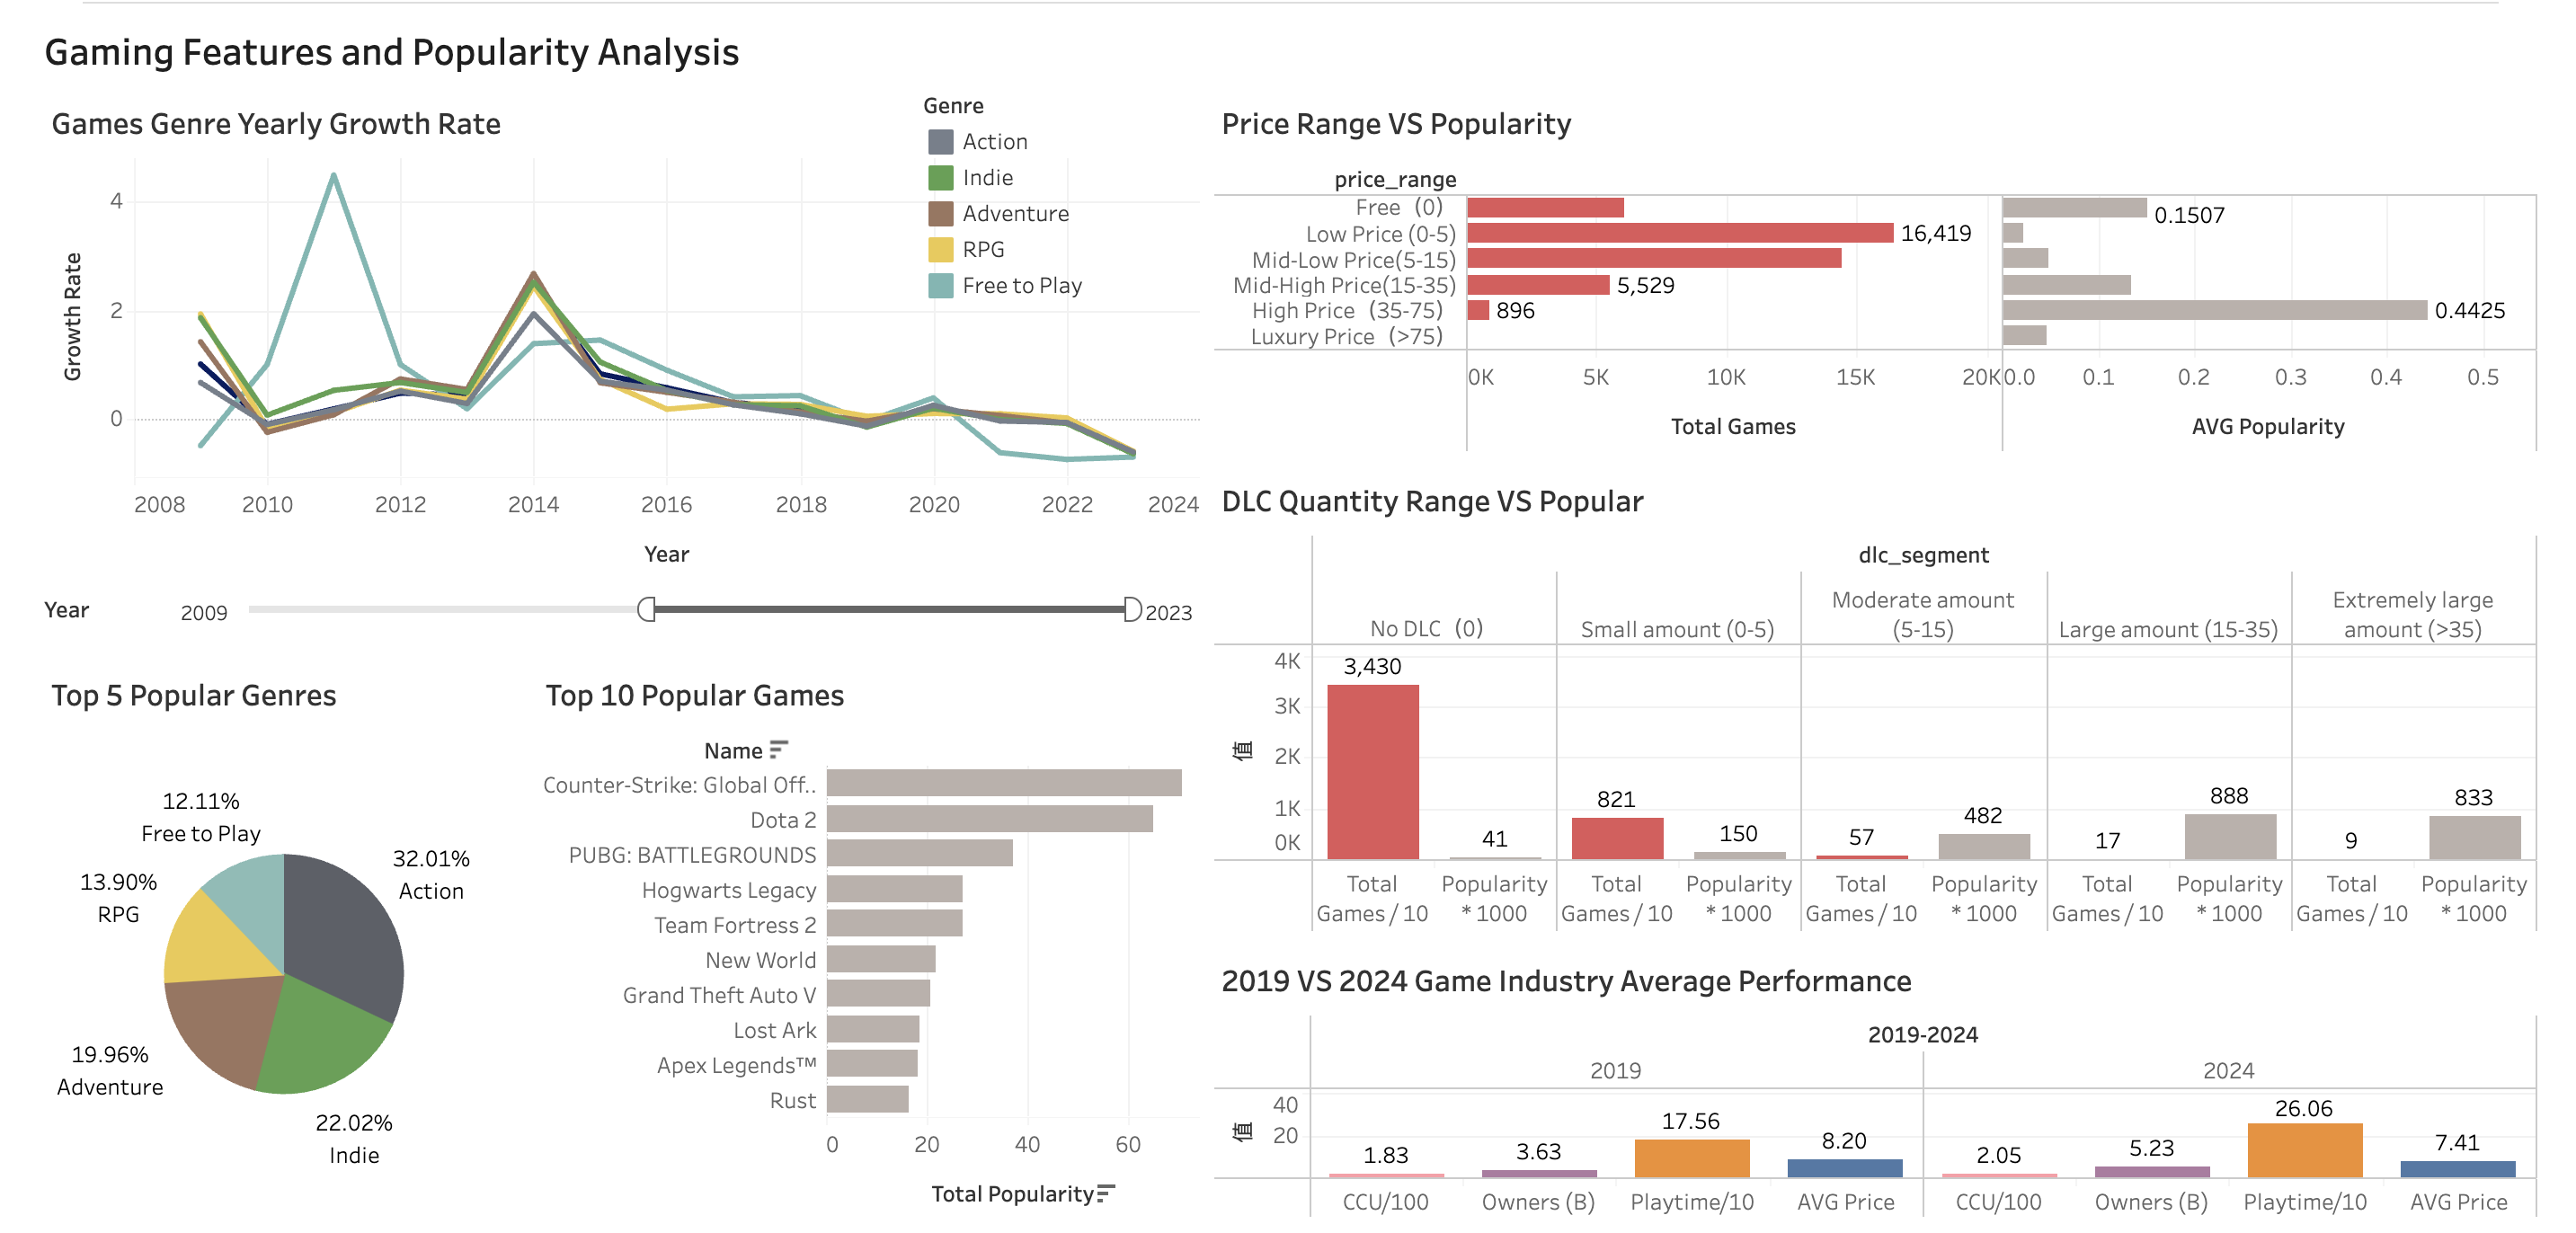

**Storyline 1**:

The "Gaming Features and Popularity Analysis" dashboard captures key insights into the gaming landscape, focusing on growth trends and player preferences. Free to Play games once peaked but have since declined, showing shifts in consumer interest. Indie and Action genres remain highly popular, with the top five genres being Action, Indie, Adventure, RPG, and Free to Play. Price analysis reveals that while lower-priced games dominate in terms of quantity, higher-priced games consistently show greater popularity, indicating players are willing to invest more for premium experiences. Over the past five years, despite decreasing average game prices, other metrics such as player engagement and content quality have improved, pointing towards a positive trajectory for the gaming market.

**Dashboard 2: Stakeholders, Games Reputation, and Popularity Analysis**

**Filter: All Games**

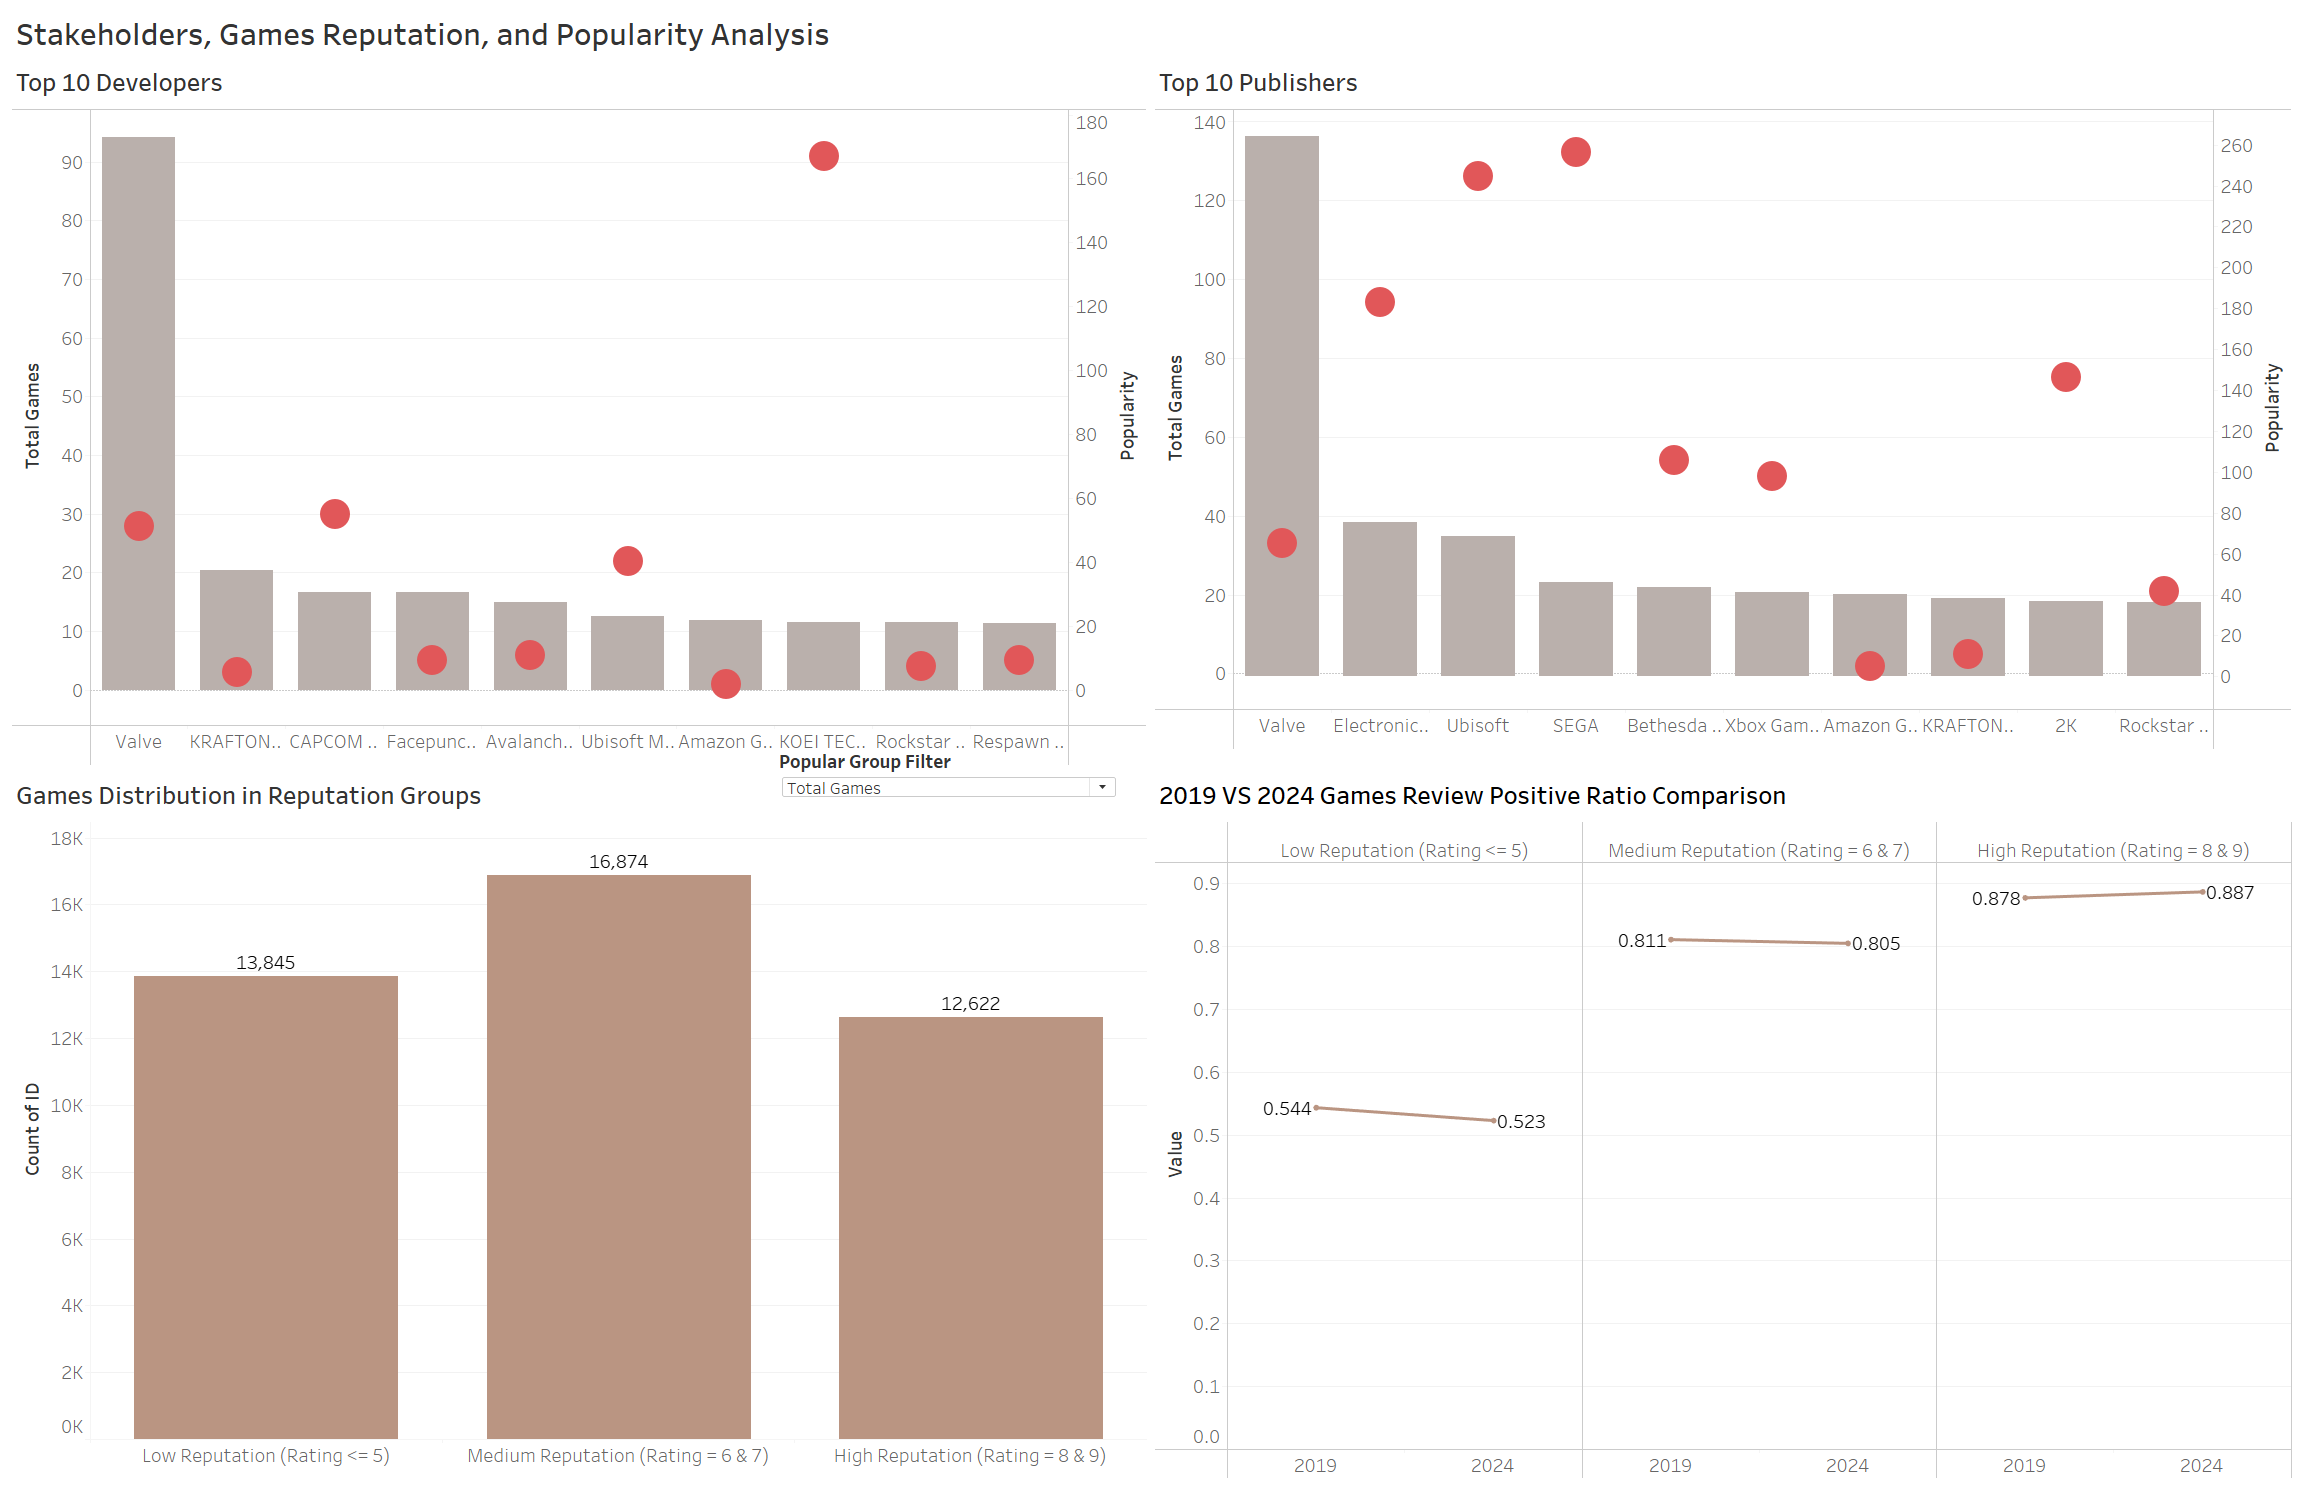

**Filter: Popular Games**

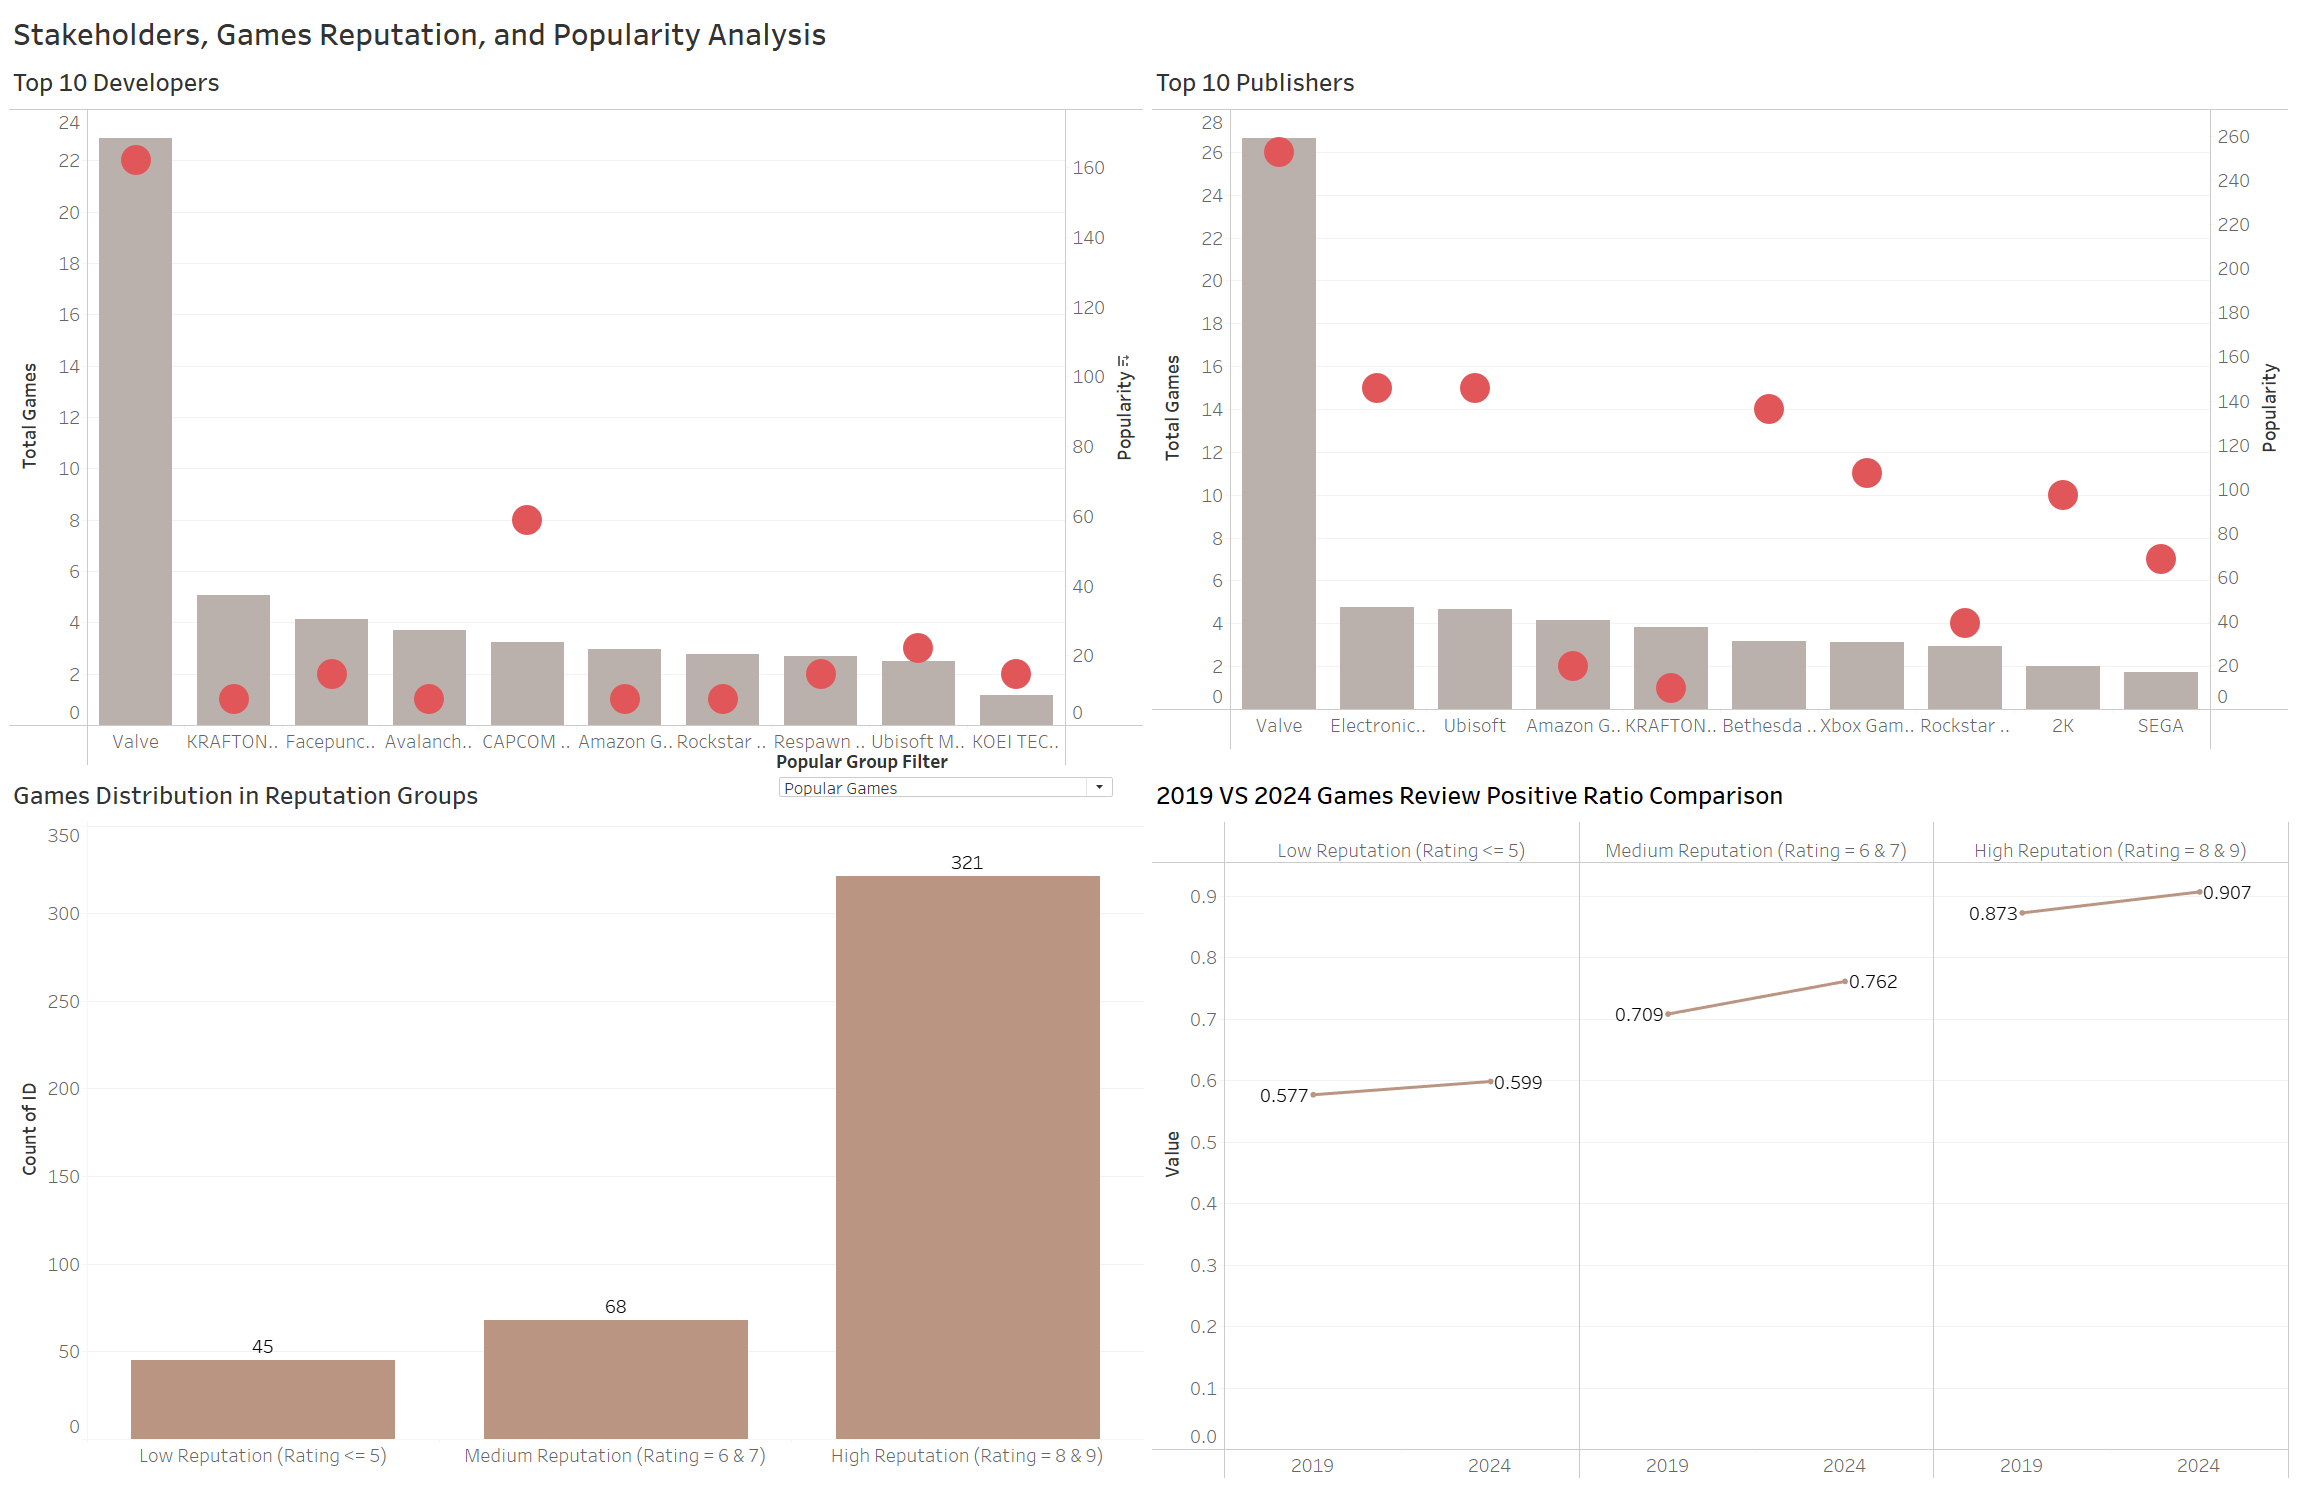

**Storyline 2**:

In this dashboard, we used a filter to separately display data for all games and for popular games. The first chart shows data for all games, including the performance of the top ten developers and publishers, the distribution of games across different reputation levels, and a comparison of positive review ratios between 2019 and 2024. The second chart presents the same metrics but only for popular games.

In both the overall and popular games data, we observed that **the number of games does not always correlate with popularity**. For example, Amazon Games has relatively few releases but maintains a high level of popularity, reflecting a "small but refined" strategy. In contrast, CAPCOM has developed many games, but only some of them are widely popular, highlighting that more quantity does not necessarily mean higher quality.

Regarding the distribution of reputation groups, we see that in the overall market, most games have a medium level of reputation, whereas **in popular games, the majority belong to the high-reputation group (ratings of 8 to 9)**, significantly exceeding medium and low-reputation groups. This indicates that popular games are generally highly recognized by players.

In terms of changes in positive review ratios, both the overall and popular games data show an increase in positive review ratios for high-reputation games, rising **from 0.878 in 2019 to 0.907 in 2024**, reflecting growing player satisfaction over time. By contrast, medium and low-reputation games showed only minor changes in positive review ratios, suggesting challenges in maintaining or improving player satisfaction for these games.

## **Conclusion**

**Overview of the Analysis**

Our study provides an exploratory analysis of Steam game popularity using data from the Steamspy platform. Beginning with the data cleaning and merging process for three primary datasets: steamspy_data_2024, steamspy_data_2019, and steam_reviewer_rating, we addressed the problems of missing values, wrong data type and inconsistent units of measurement for certain variables.

We then utilized SQL to explore the dataset and defined the "popularity" index, applying a weighted allocation to key variables as below to assess each game's popularity level:
- Owners - 40%
- Total Reviewers - 25%
- Concurrent User - 25%
- Average Playtime - 5%
- Median Playtime - 5%

With this solid foundation, we continued the analysis focusing on understanding the factors that potentially impact games popularity. We hypothesized that five main influencing factors would be examined: Popularity, Genres, Price, DLC, Reputation, Emerging Trends, and Stakeholders.


**Key Findings**


* **Part 1: Popularity of Games**
 - Popularity is gauged through metrics such as the number of owners, number of reviewers, concurrent users (CCU), and playtime metrics—all widely accepted indicators of a game's reach and engagement.
 - Inspired by established segmentation practices, we define "popular games" as those in the top 1% of our popularity index, aligning with industry standards for high-impact classification.
* **Part 2: Genres of Game**
 - Out of 28 genres available on Steam, only 17 appear in the top 1% of popular games. Genres like Education, Nudity, and Accounting are absent, suggesting their limited market share and niche appeal.
 - The top genres, including Action, Adventure, Indie, Free to Play, and RPG, maintain their dominance across both datasets, showcasing their universal appeal and stability in the gaming market.
 - Genres like Massively Multiplayer show high Average CCU but moderate ownership, reflecting high engagement with a smaller but active community. Free to Play games have high ownership and, in the top 1%, have much greater average playtime, showing strong long-term engagement from their audience.

* **Part 3: Price**
 - Although free games make up a higher percentage of the popular games dataset (25% in popular games versus 14% in the overall dataset), indicating that they attract more players, high-priced games consistently outperform in terms of engagement metrics. This suggests that while free games draw a larger audience, paid games, especially those in the higher price range, deliver experiences that lead to higher player loyalty and engagement.
 - Games priced in the luxury range (above $75) are entirely absent from the popular games list. This suggests that extremely high prices are a barrier to mass adoption, regardless of game quality or uniqueness, as players are less willing to pay premium prices unless the value is justified.
 - Post-2019 trends show a decline in the growth rate for both free and paid games, but the reduction is more significant for free games. Despite the earlier growth surge in free games, paid games are now exhibiting more stability, suggesting they are better positioned for long-term market dominance.







* **Part 4: DLC (downloadable content) in Gaming**
 - Games with moderate to large DLC content (5–35 DLCs) consistently show higher popularity and ownership, highlighting DLC's role in enhancing both player engagement and sales. Adding DLCs, especially in moderation, appears to significantly contribute to maintaining game popularity.
 - Games with a small amount of DLC (0–5 DLCs) dominate in the popular games category, accounting for 37.33% of these games. This suggests that players appreciate games with fewer, impactful DLCs—likely due to their ease of access and focused content, which makes the gaming experience more cohesive and less overwhelming.
 - Although extremely large DLC games show high popularity metrics, their lower ownership suggests that overly extensive DLC offerings may deter player investment. A balanced approach, focusing on moderate DLC, appears to maximize both adoption rates and player satisfaction, avoiding the diminishing returns seen with excessive DLC content.
* **Part 5: Reputation of Games**
 - High-reputation games consistently show stronger player engagement, larger player bases, and greater content depth (e.g., DLCs, achievements). However, this content depth does not always translate into higher average playtime, possibly due to their larger sample size or players reaching satisfaction sooner.
 - Medium-reputation games within the popular pool demonstrate unexpectedly high engagement, with higher average playtime compared to high-reputation games. However, their relatively weaker performance in peak concurrent users (CCU) suggests that they are preferred by players seeking solo experiences rather than multiplayer.
 - Low-reputation games have high playtime and peak CCU, suggesting a strong multiplayer or community-driven element. Despite the low ratings, these games maintain strong engagement, possibly due to their multiplayer appeal. Developers should consider improving collaboration and competitive dynamics to address dissatisfaction.

* **Part 6. Stakeholders**
 - Only about 1.2% of developers (323 out of 26,307) and 1.1% of publishers (247 out of 21,560) are responsible for the industry’s top 1% of popular games. This highlights the highly competitive nature of the gaming market, where only a small fraction of developers and publishers achieve widespread success.
 - Companies like Amazon Games and Facepunch Studios have adopted a "small but refined" strategy, focusing on releasing fewer games but ensuring each game is of high quality. Their efforts have been effective, allowing them to climb the ranks in popular games. Games like "Rust" and "New World" are prime examples of how this strategy can lead to strong market recognition.
 - Some developers and publishers, like KOEI TECMO GAMES CO., face challenges in maintaining quality across their portfolio. Despite ranking highly in the number of games released, their drop in the popularity rankings indicates that releasing many games does not always translate to maintaining market relevance.


 * **Part 7: The Emerging Trends**
  - The gaming industry has seen significant growth, with the number of players expanding from 3.63 billion in 2019 to 5.23 billion in 2024. Additionally, the average playtime has increased from 175.61 hours to 260.60 hours, indicating a deeper level of player commitment and engagement.
  - A decrease in average game prices (from 8.20 USD to 7.41 USD) has made gaming more accessible, leading to an expanded player base.
  - A rise in the positive review ratio (from 0.83 to 0.86) indicates enhanced player satisfaction, likely contributing to increased playtime and loyalty.
  - Popular games have shown exceptional growth, with a 133% increase in total reviews and a 144% increase in positive reviews, reflecting their ability to sustain high player satisfaction.
  - Some games, despite their past popularity, faced significant declines, highlighting the challenges of maintaining player interest amid evolving competition and market dynamics.

**Suggestions**

Based on the analysis, we have some strategic suggestions for future growth:


1. **Develop Games in High-Potential Genres**: Focus on creating games in popular genres like Action, Adventure, and RPG, which have shown consistently strong performance and broad player appeal.

2. **Adopt a "Few but High-Quality" Approach**: Companies should aim to produce fewer, high-quality titles rather than many low-impact games, following the example of Amazon Games and Facepunch Studios, which successfully improved their market rankings.

3. **Utilize Free-to-Play Models**: Consider implementing a Free-to-Play model or offering free trials to attract a broader audience and boost engagement, as free games have shown a significant impact on growing popularity.

4. **Develop a Comprehensive DLC Strategy**: Include well-crafted DLC content for games to drive continued player engagement and increase popularity, especially for single-player or narrative-driven titles.

5. **Enhance Community Experience in Multiplayer Games**: Improve multiplayer features for low-reputation games with high engagement to convert negative feedback into a better player experience and boost player satisfaction.

6. **Prioritize Consistency and Quality in Game Development**: Encourage developers to focus on consistent quality across multiple titles rather than volume alone, as seen with top-performing companies like Valve and Coffee Stain Publishing.

7. **Capitalize on Positive Market Trends**: Leverage factors that have driven recent growth, such as decreased average prices and higher player satisfaction, to maintain an upward trajectory in player base and engagement.

**Future Steps**

- **Utilize Additional Dataset Columns:** In our current analysis, we have yet to explore several interesting columns in the dataset, such as age restrictions, cross-platform compatibility, supported languages, and game content length. Moving forward, we plan to investigate how these factors might correlate with a game's popularity. This deeper exploration could reveal additional insights into what drives the success of popular games.

- **Incorporate Supplementary Datasets:** Steam offers numerous related datasets, including those providing more detailed game sales information and insights into stakeholder behaviors. In the future, gathering and analyzing supplementary data will allow us to expand our research and build a more comprehensive view of what impacts a game's popularity. This could also help in understanding the complete ecosystem, including economic factors, marketing strategies, and user feedback.

##**Challenges**

Throughout this project, we encountered several challenges that influenced our analysis:  

1. **Defining Game Popularity:**  The primary challenge was establishing a measure of each game's popularity. With no universally accepted criteria, we had to create a custom "popularity" index based on a logical, data-driven framework to ensure a solid foundation for our analysis.  
  
2. **Variation in Data Quality:** Not all game data was equally complete. For popular games, data on player ownership and engagement was often more comprehensive. However, for less popular games, data was either missing or inaccurate. So we adopted several data cleaning and imputation measures, such as using mean or median values to fill in missing data. For columns with significant data gaps, we chose to exclude those games from the analysis to ensure the fairness and reliability of the results.

## **References**

1.   Key columns definitions. Steam Spy. https://steamspy.com/api.php
2.   Reviewer rating. https://howlongtobeat.com
2.   How to measure success in gaming: 10 key gaming metrics you need to know. GEEIQ. (February 27, 2024). https://geeiq.com/how-to-measure-success-in-gaming-10-key-gaming-metrics-you-need-to-know/
3.   Key metrics in game analytics: measuring and optimizing game performance. ELVTR Magazine. https://elvtr.com/blog/key-metrics-in-game-analytics-measuring-and-optimizing-game-performance
4.   22 metrics all game developers should know by heart. Game Analytics. (February 13, 2024). https://gameanalytics.com/blog/metrics-all-game-developers-should-know/
5. Digital game downloads and their impact on popularity. Computers in Human Behavior. https://www.sciencedirect.com/journal/computers-in-human-behavior  

6. The role of user reviews in digital game adoption. Journal of Interactive Marketing. https://www.journals.elsevier.com/journal-of-interactive-marketing  

7. Analyzing concurrent user metrics in multiplayer games. Entertainment Computing. https://www.journals.elsevier.com/entertainment-computing  

8. Game duration as a measure of player engagement. Journal of Gaming Analytics. https://gwern.net/doc/dual-n-back/2013-smith.pdf  

9. Game market analytics 2023. Statista. https://www.statista.com/topics/868/video-games/
10. Academic Research and Development: Outputs of S&E Research Publications. National Science Board. https://www.nsf.gov/statistics/2018/nsb20181/report/sections/academic-research-and-development/outputs-of-s-e-research-publications

11. Ranking the top 1% of publications by discipline: Essential Science Indicators Help Guide, Web of Science. https://esi.help.clarivate.com/Content/home.htm



## **Generative AI disclosure statement**



In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:


*   Content Generation: We used ChatGPT to brainstorm ideas for evaluating the popularity of each game, including selecting relevant metrics and determining reasonable weight allocations for each. Additionally, we consulted ChatGPT to address challenges, such as trimming the Developer and Genre columns to separate values of different types.
*   Code Review and Debugging: We used ChatGPT to improve our SQL code as well as Tableau visualization, including optimizing algorithms for efficiency and resolving potential errors.
*   Proofreading and Grammar Checks: We used ChatGPT to refine our writing, improve readability, and ensure grammatical accuracy.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
